#### べき乗解析方法 図

In [1]:
import time
from datetime import datetime
import re
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy as sp
from scipy.optimize import leastsq
import scipy.optimize as optimize
from scipy.optimize import curve_fit  

import warnings
warnings.simplefilter('ignore')
# warnings.resetwarnings()
# warnings.simplefilter('ignore', FutureWarning)

from pfit import power_fit as powfit
from pfit import sim_func as simf

%load_ext autoreload
%autoreload 2

# plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.size'] = 12

#### 1/n Power plot Simulations

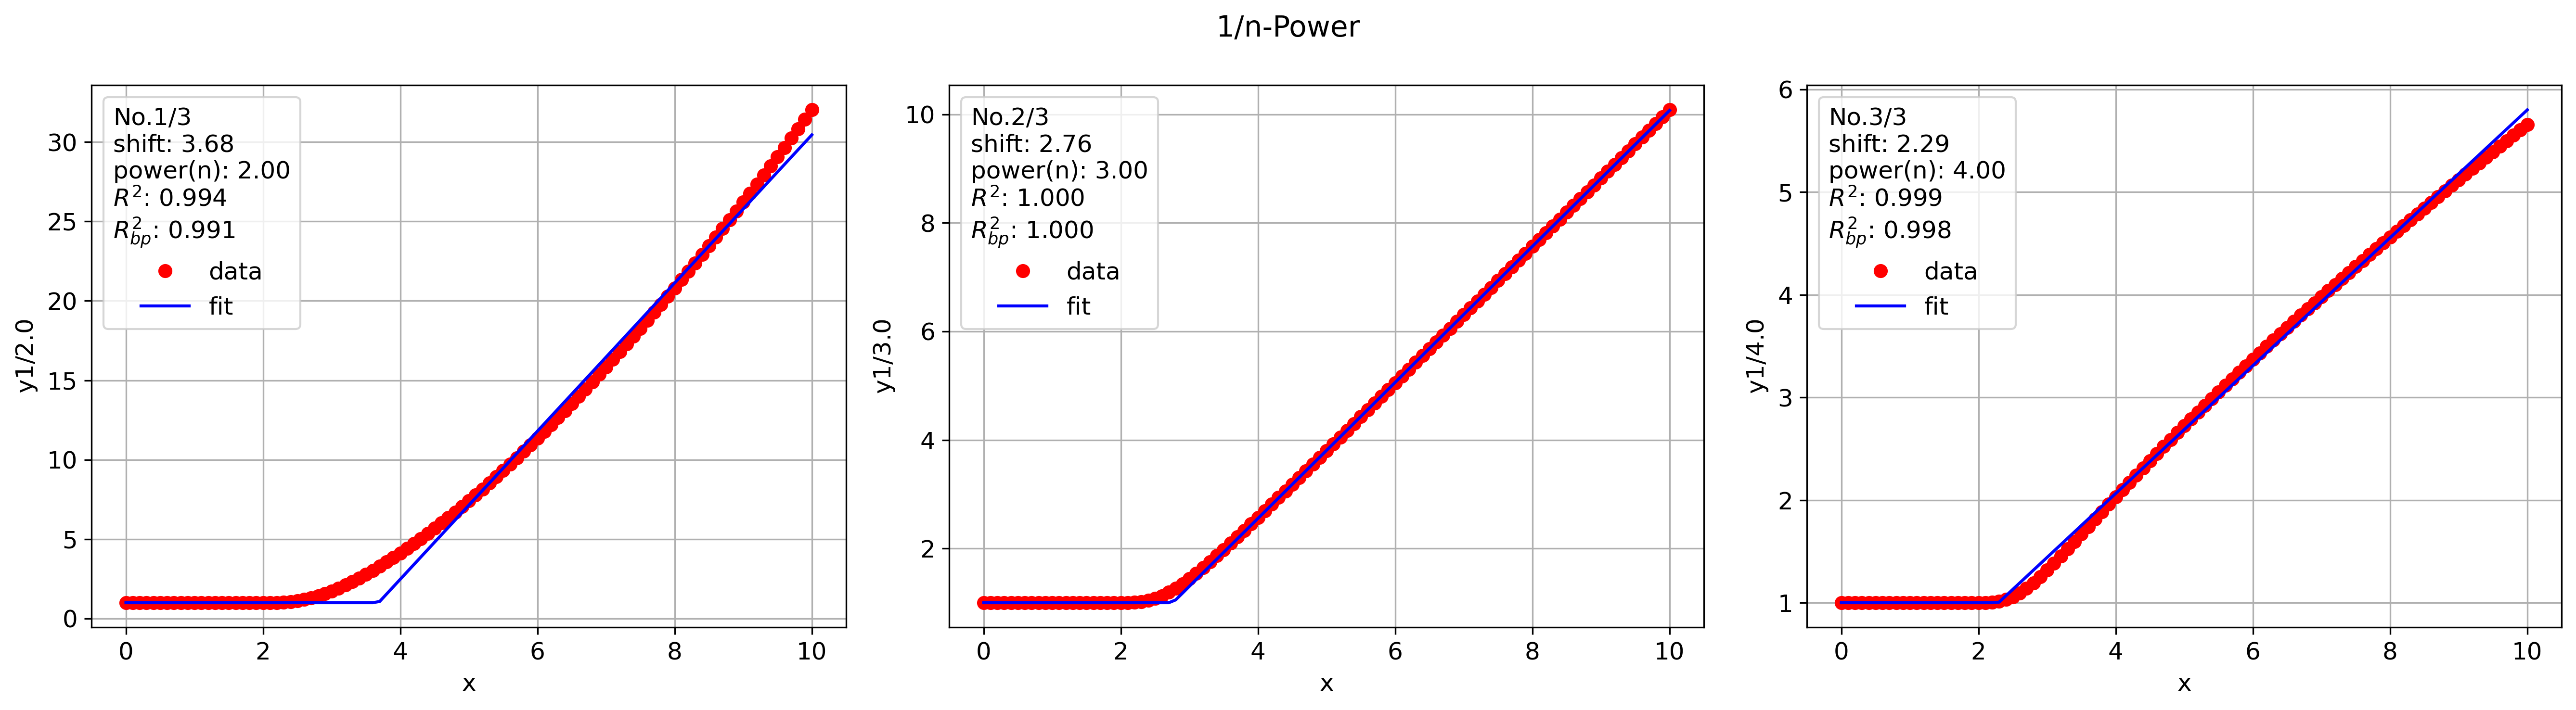

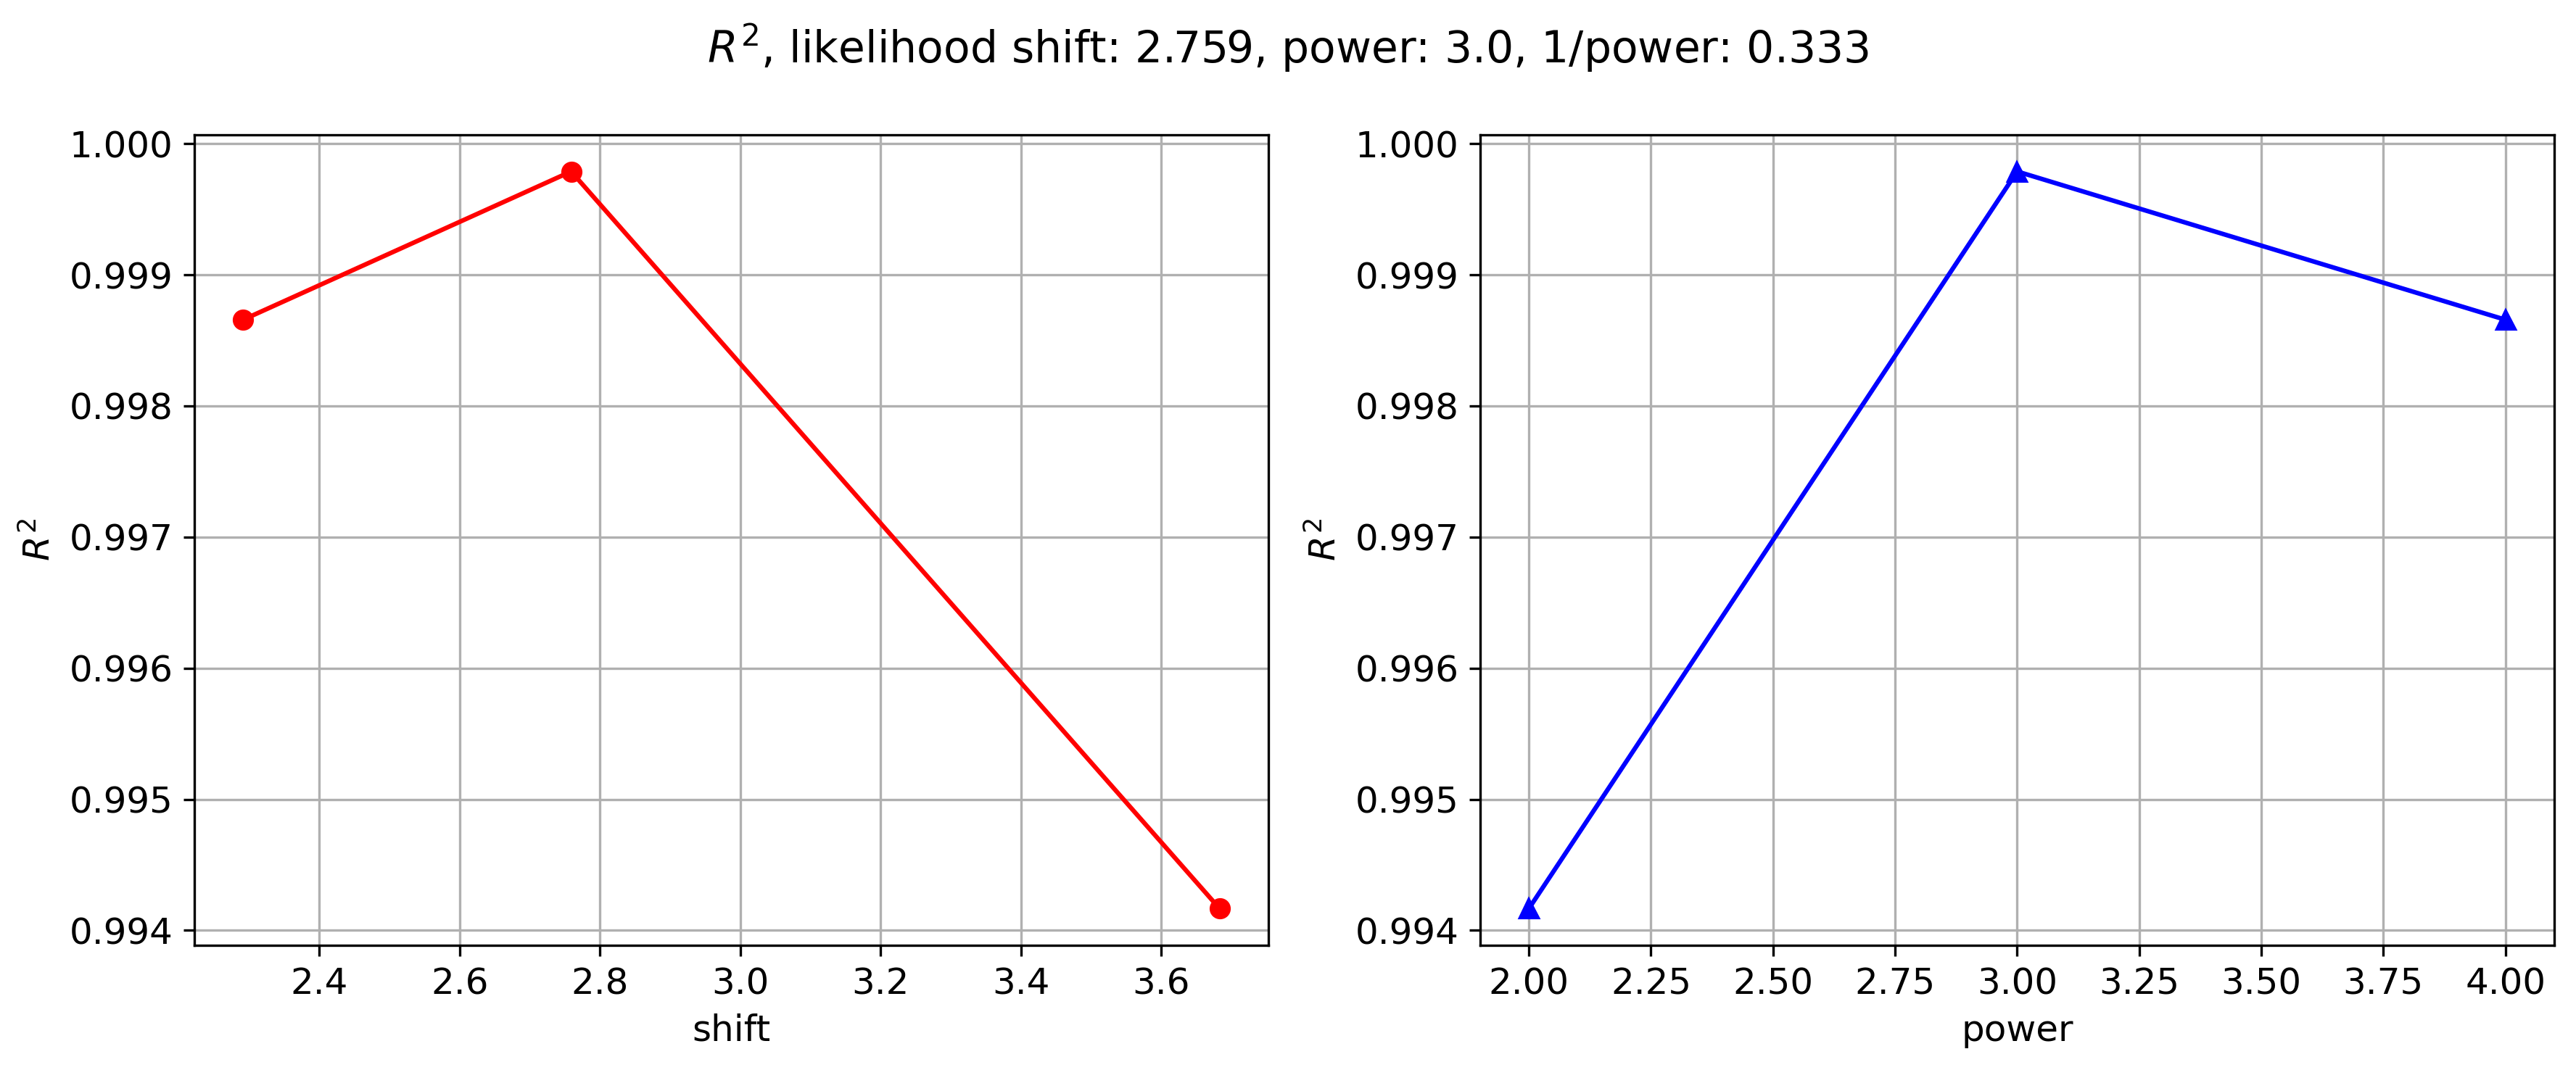

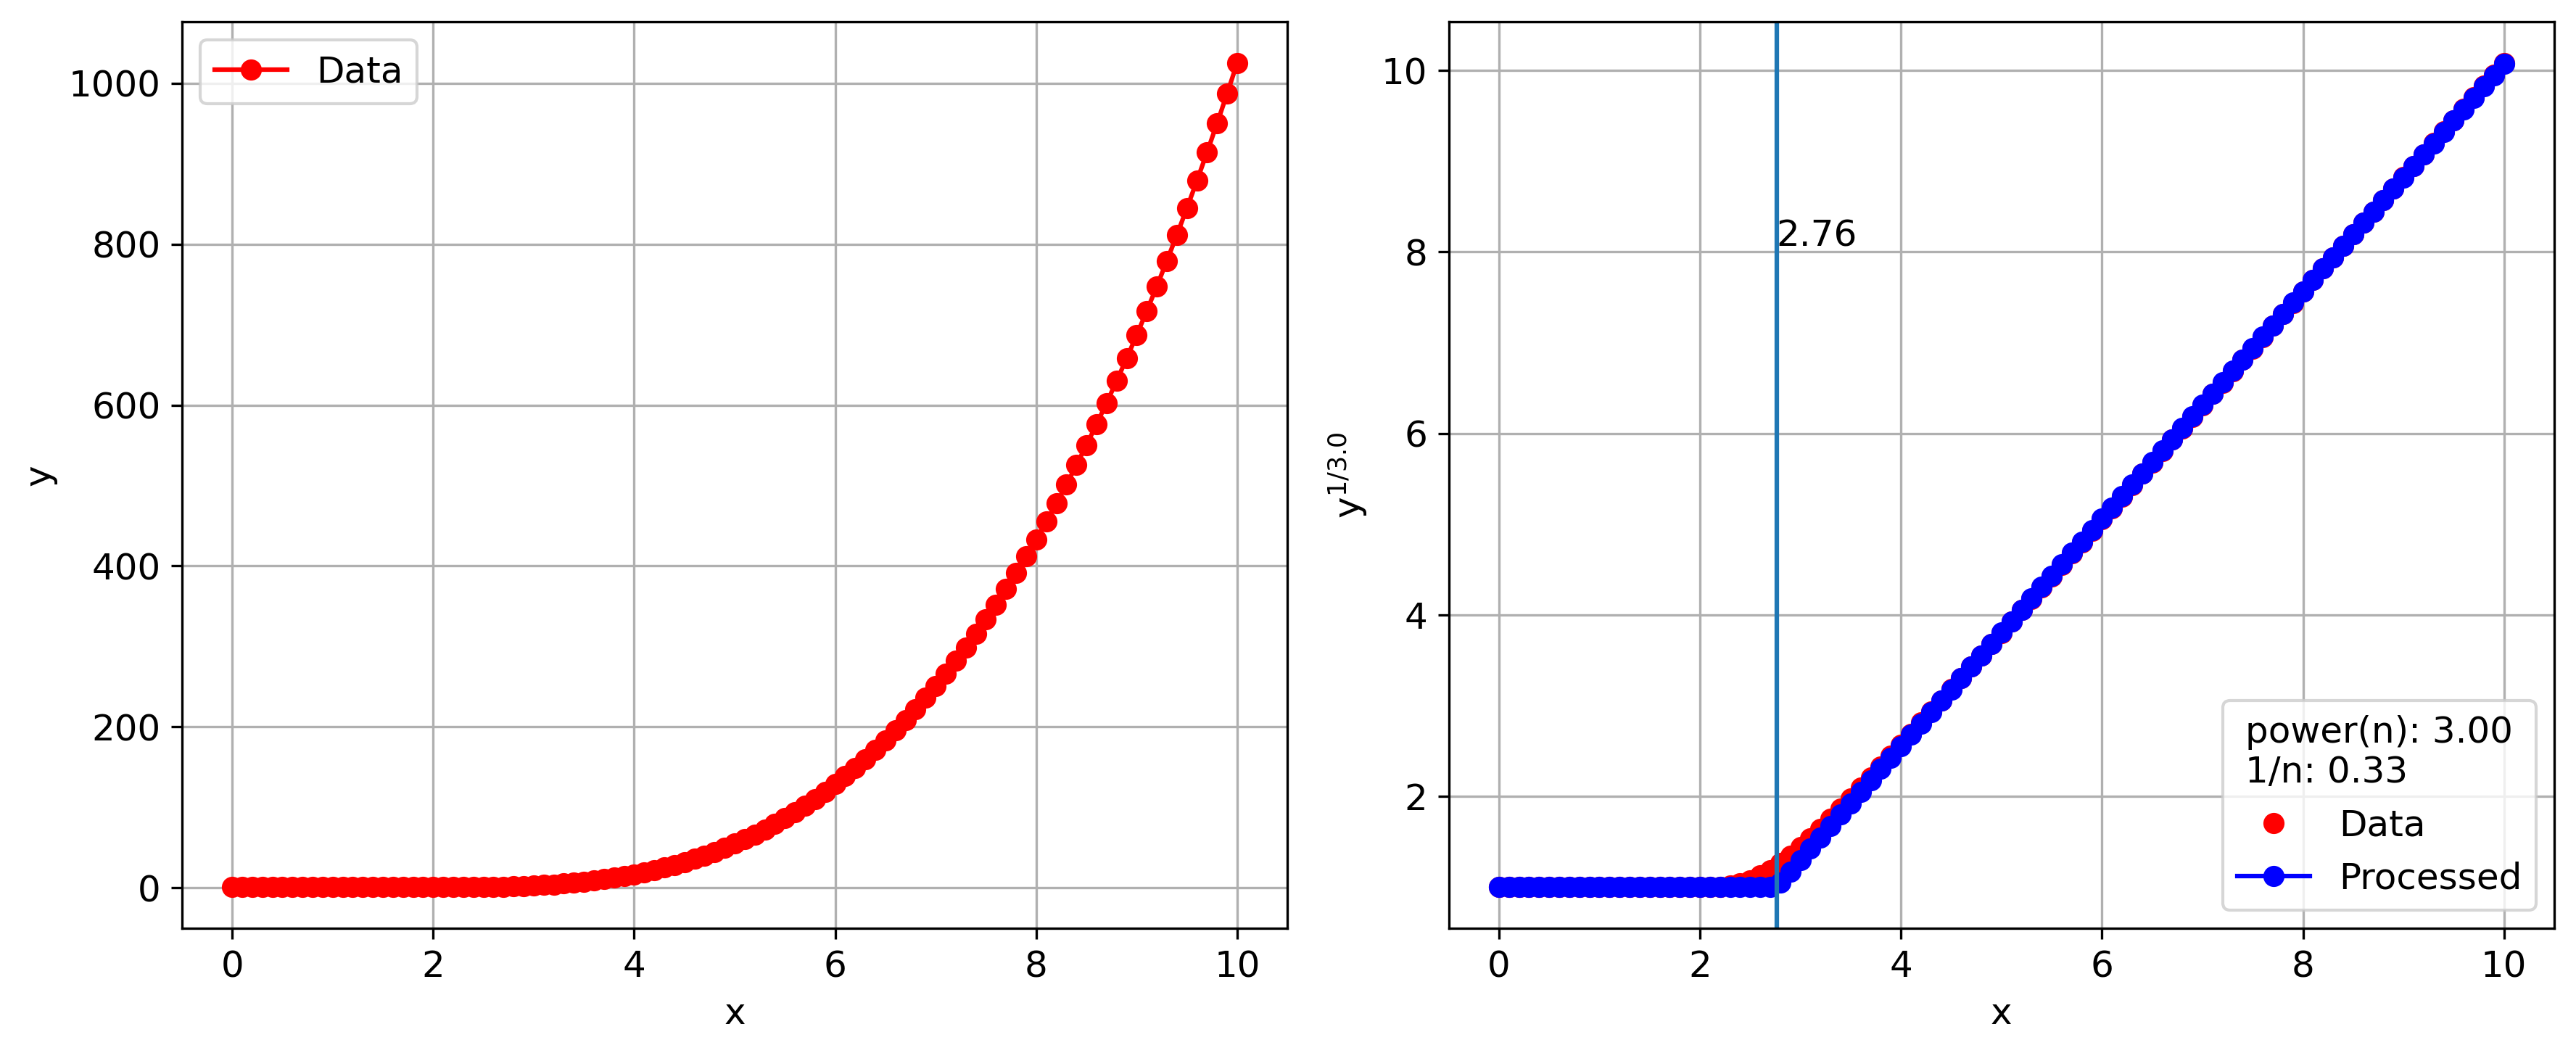

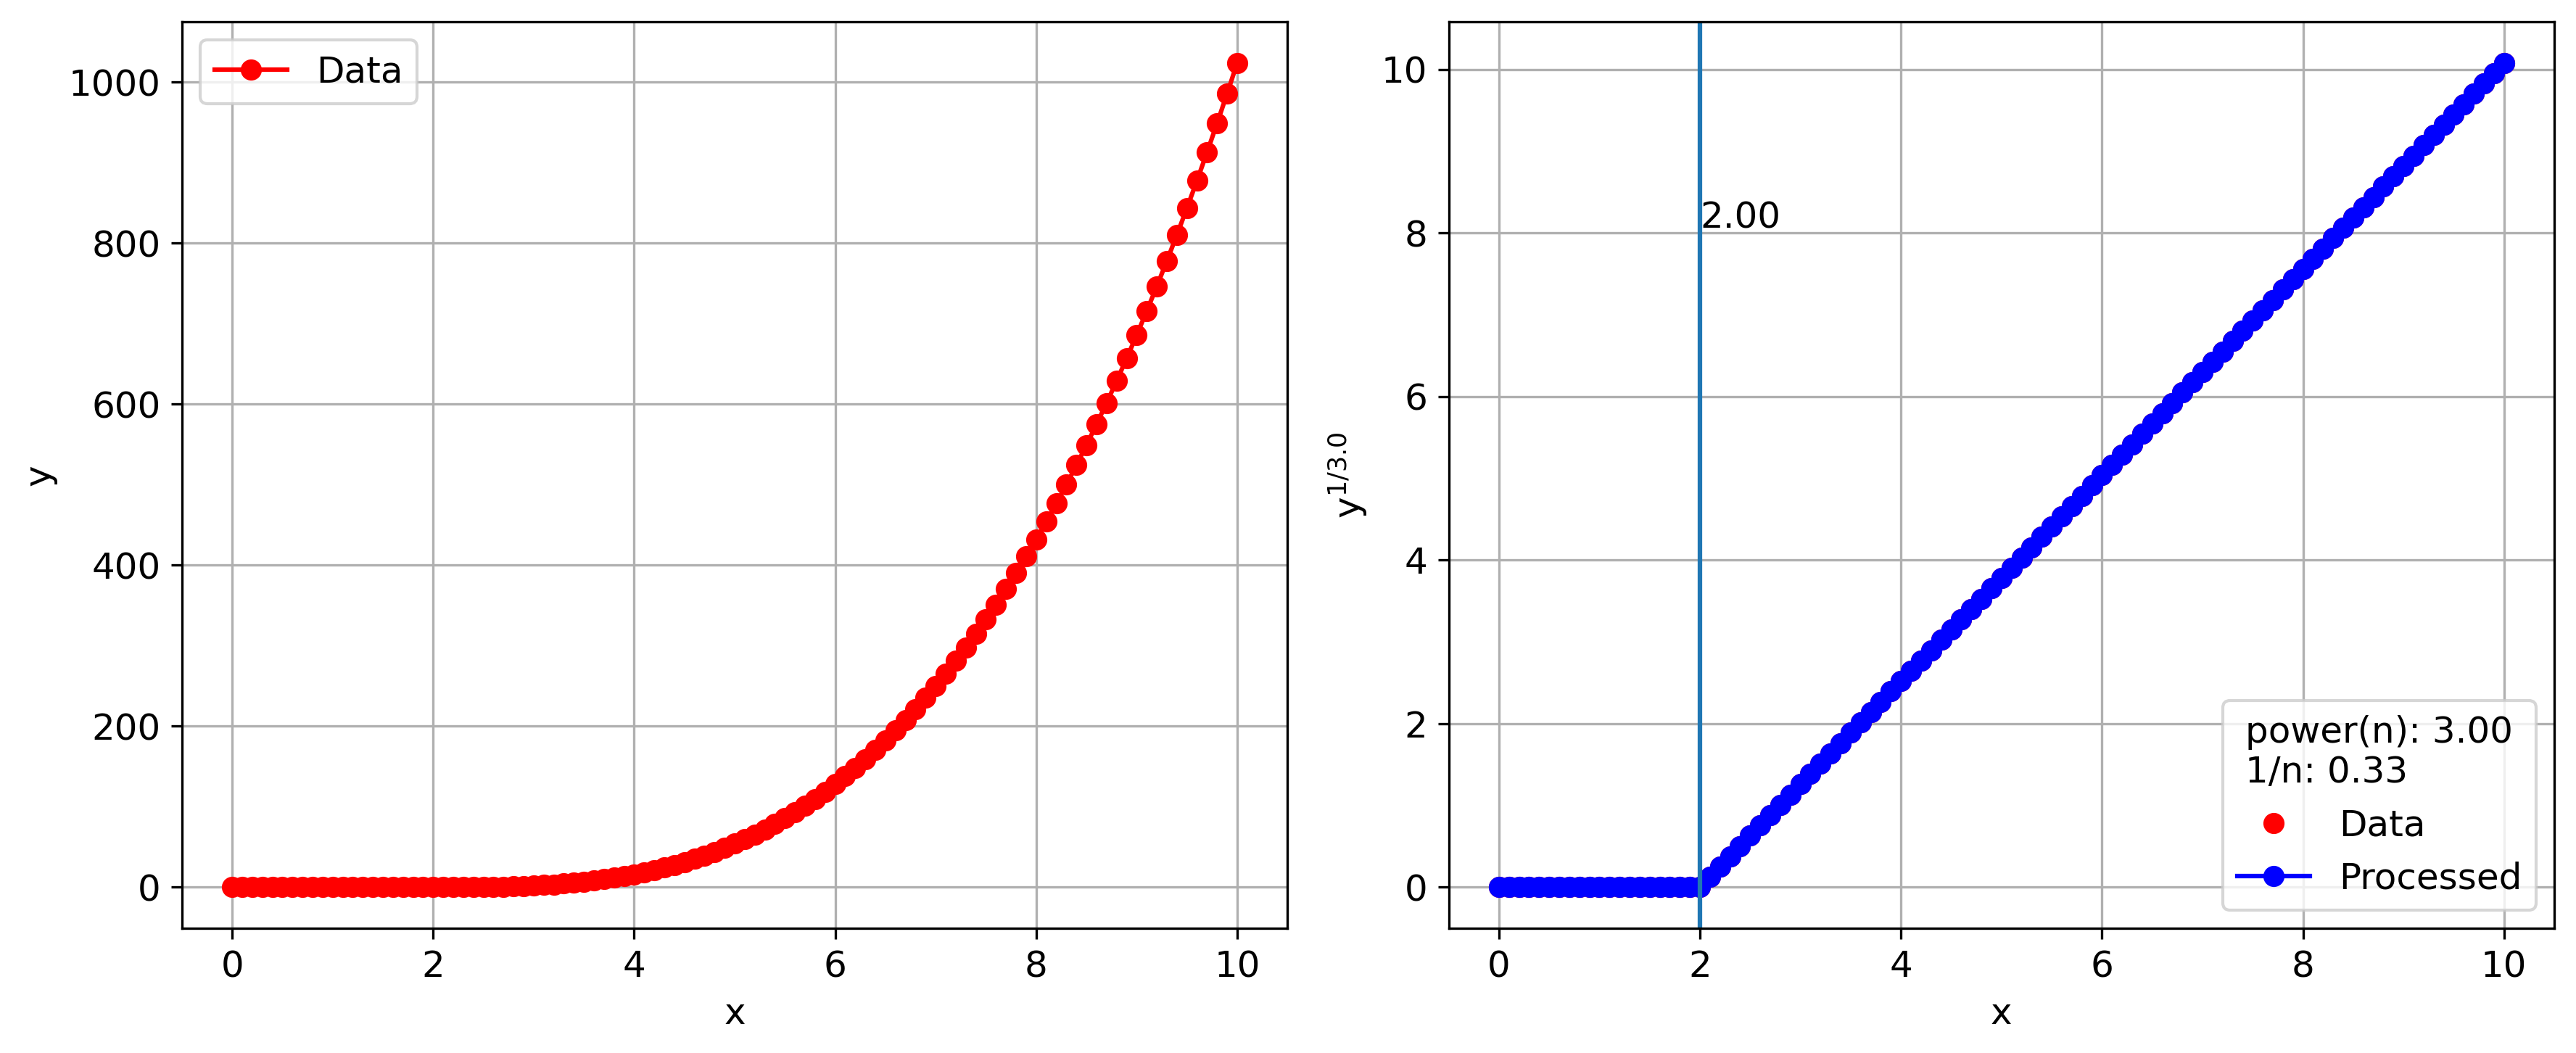

Const Power: shift: 2.76, power: 3.00


In [2]:
# noise なし
xx = np.arange(0,10.1,0.1)
p =  (2,2,3,1)
yy = simf.power_plus(xx,*p) 


temp = powfit.PfAnalysis(xx,yy)
# print('Constant Power')
temp.ydata = temp.ydata
temp.shift_estimate_by_power_scan(search_range=[2,3,4],
                                zero_replace=False,
                                likely_evaluation='r2',
                                info=False, 
                                plot=True)

print(f'Const Power: shift: {temp.shebypw["shift"]:.2f}, power: {temp.shebypw["power"]:.2f}')

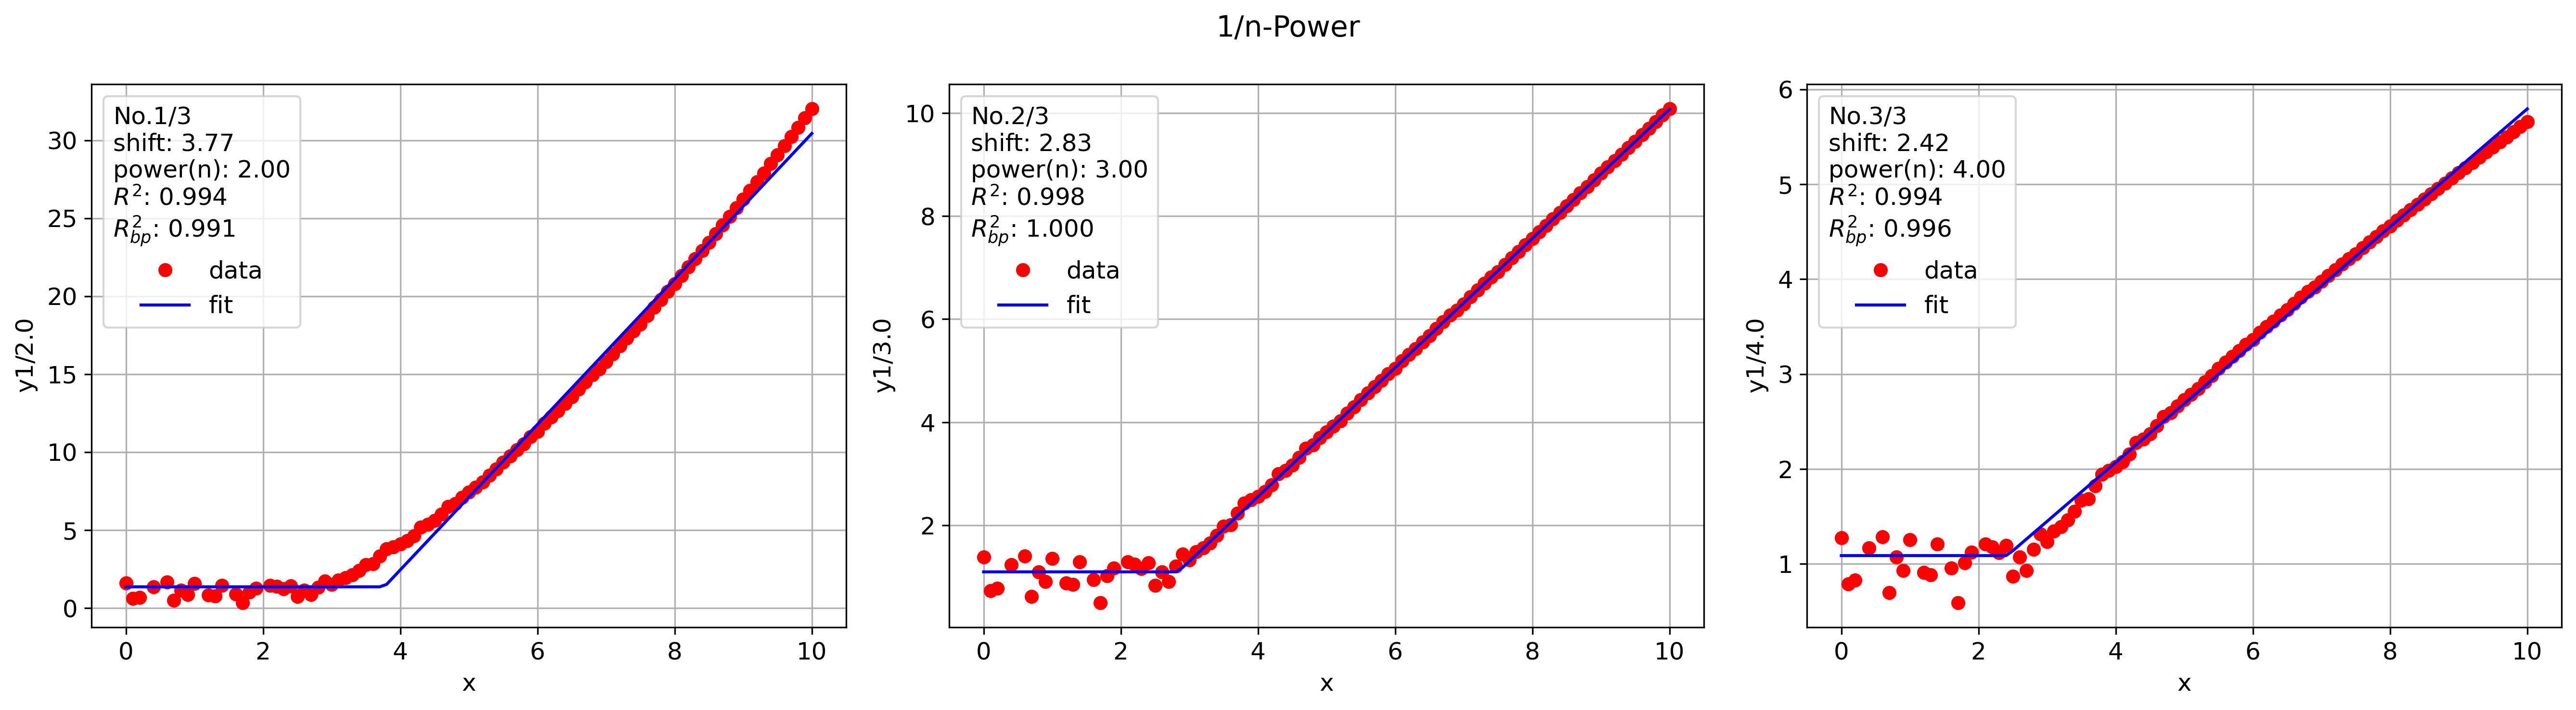

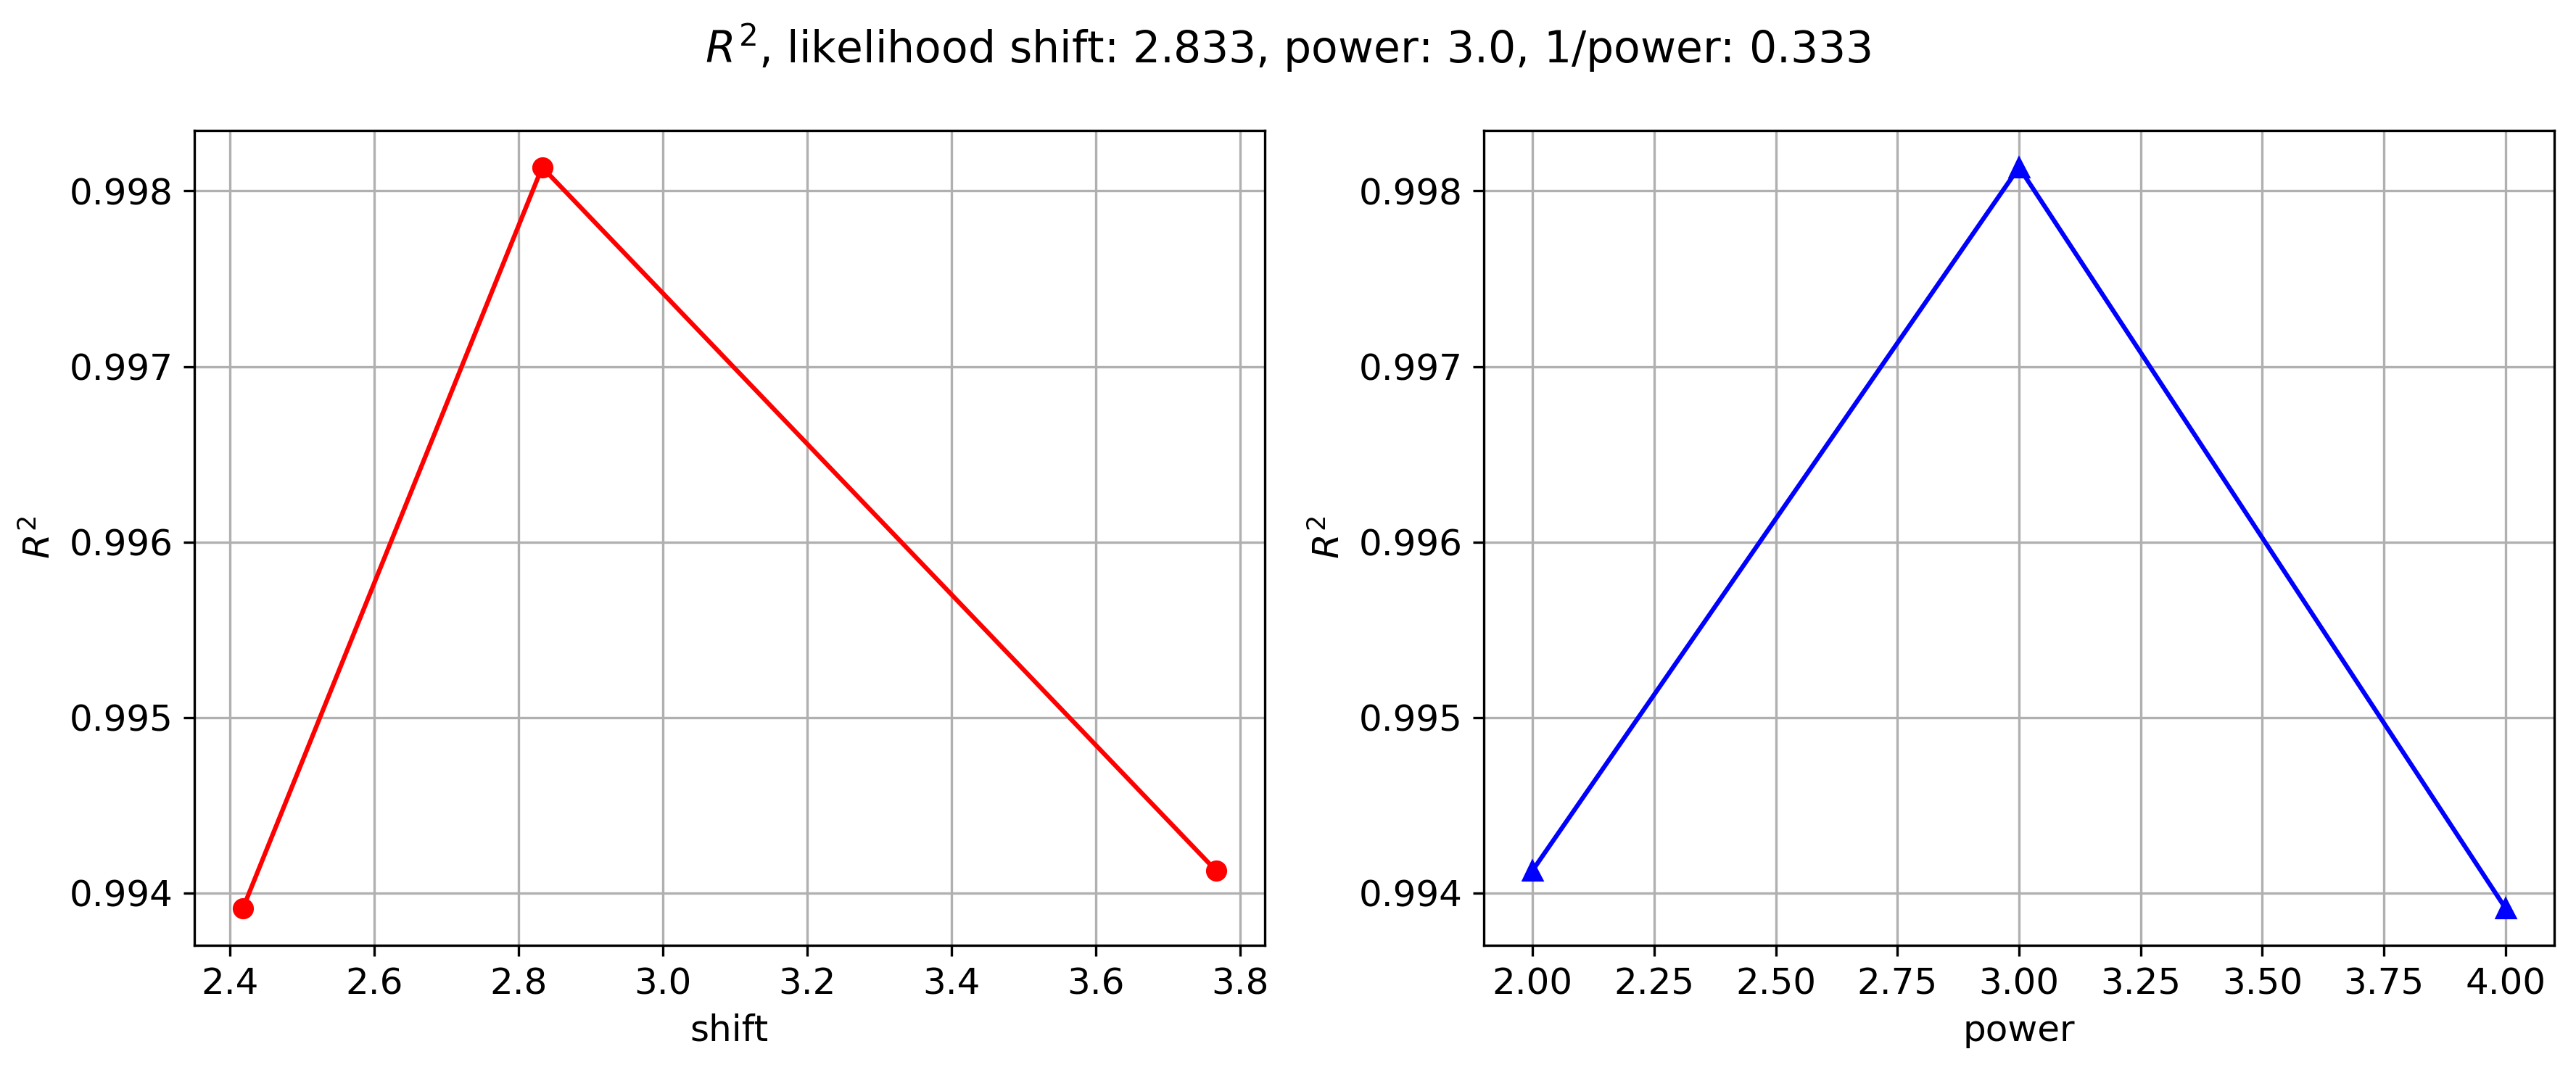

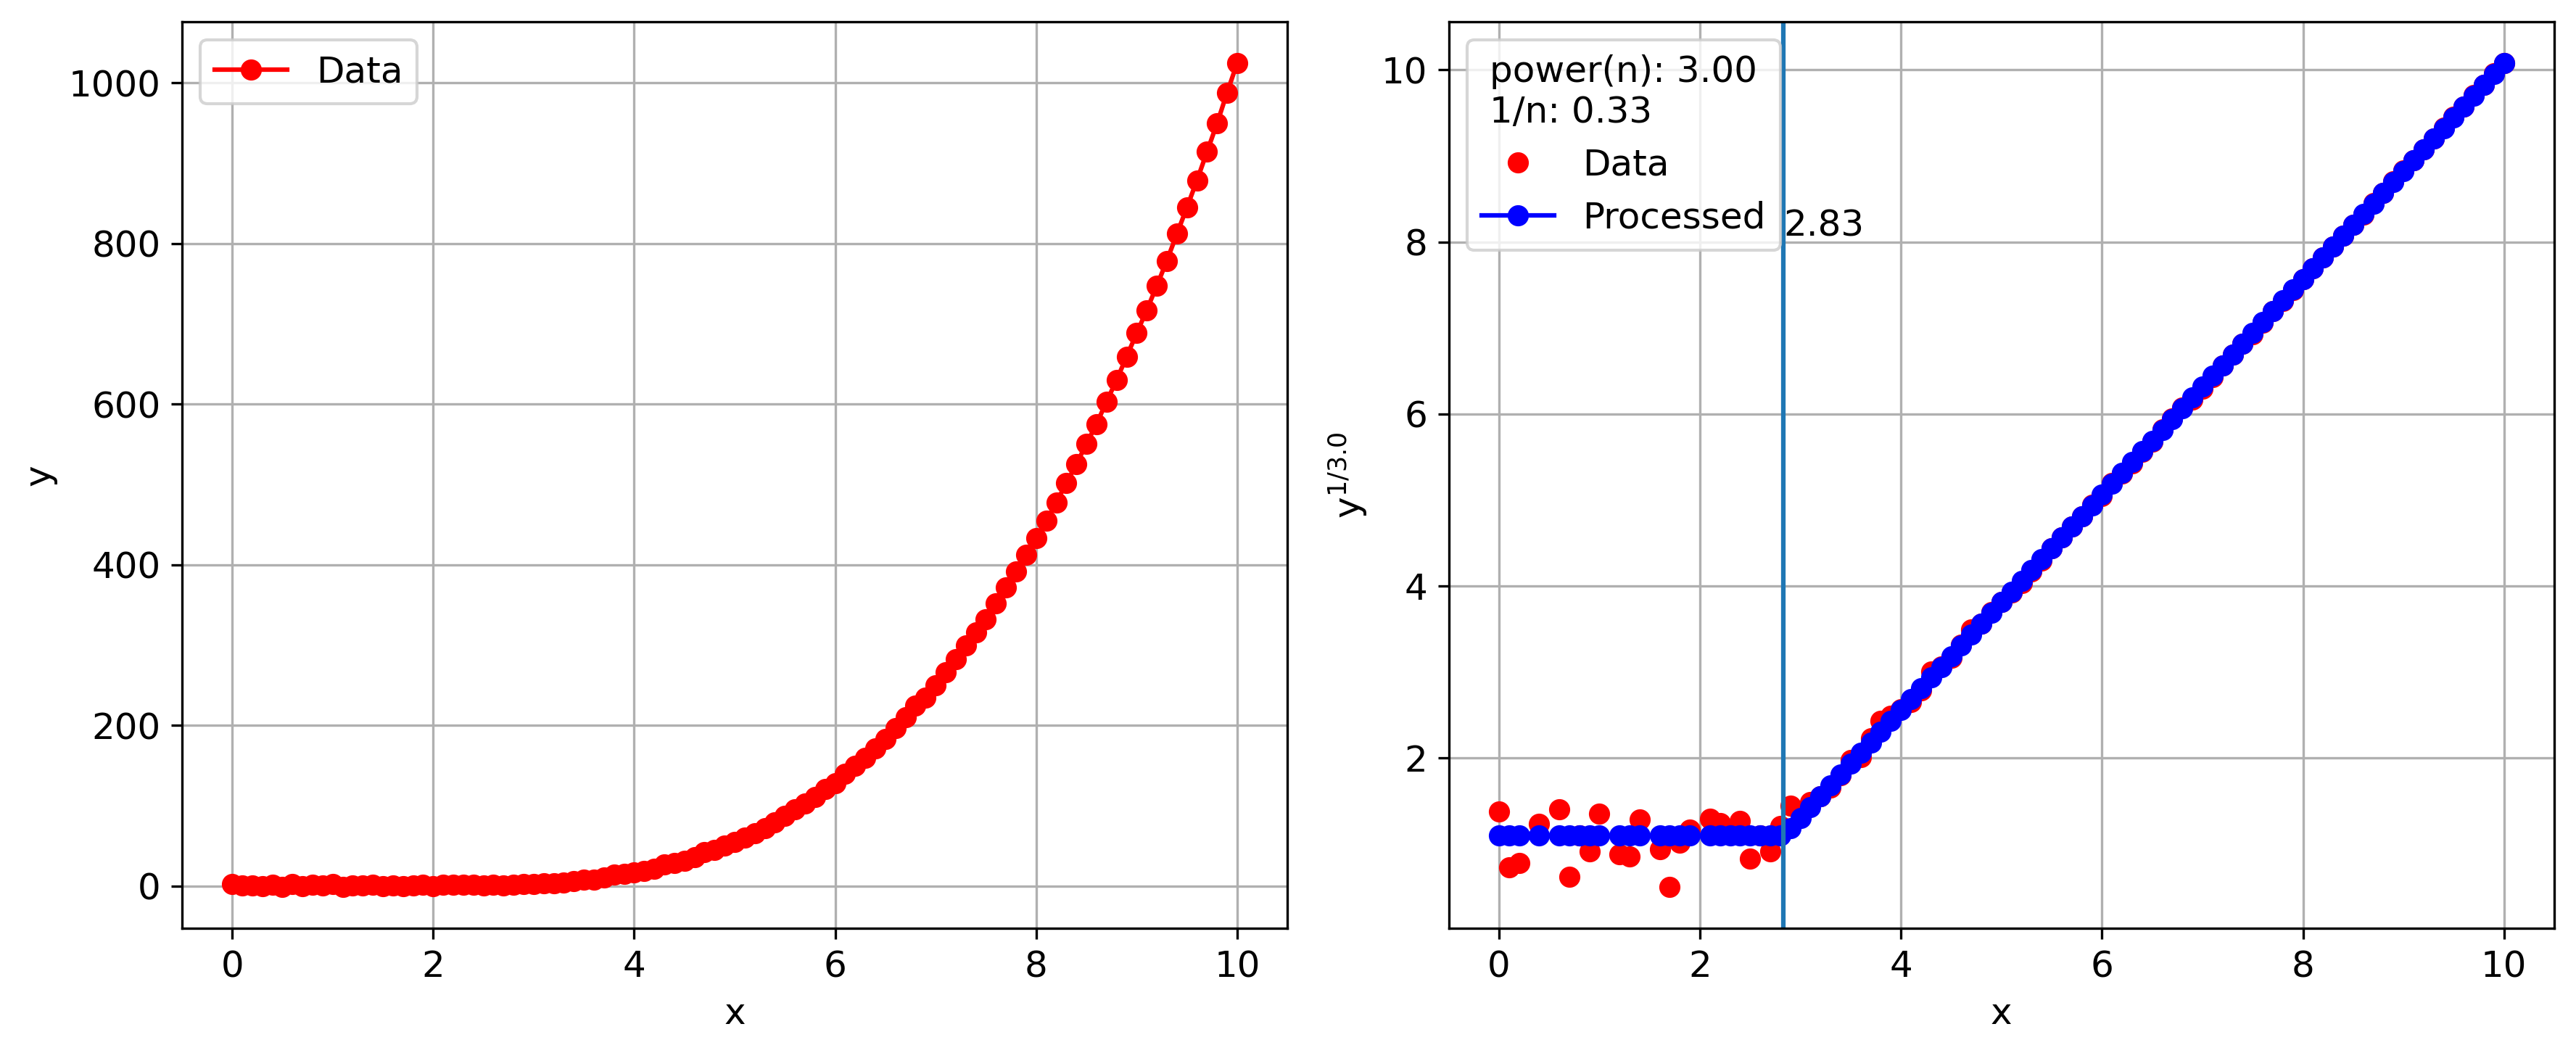

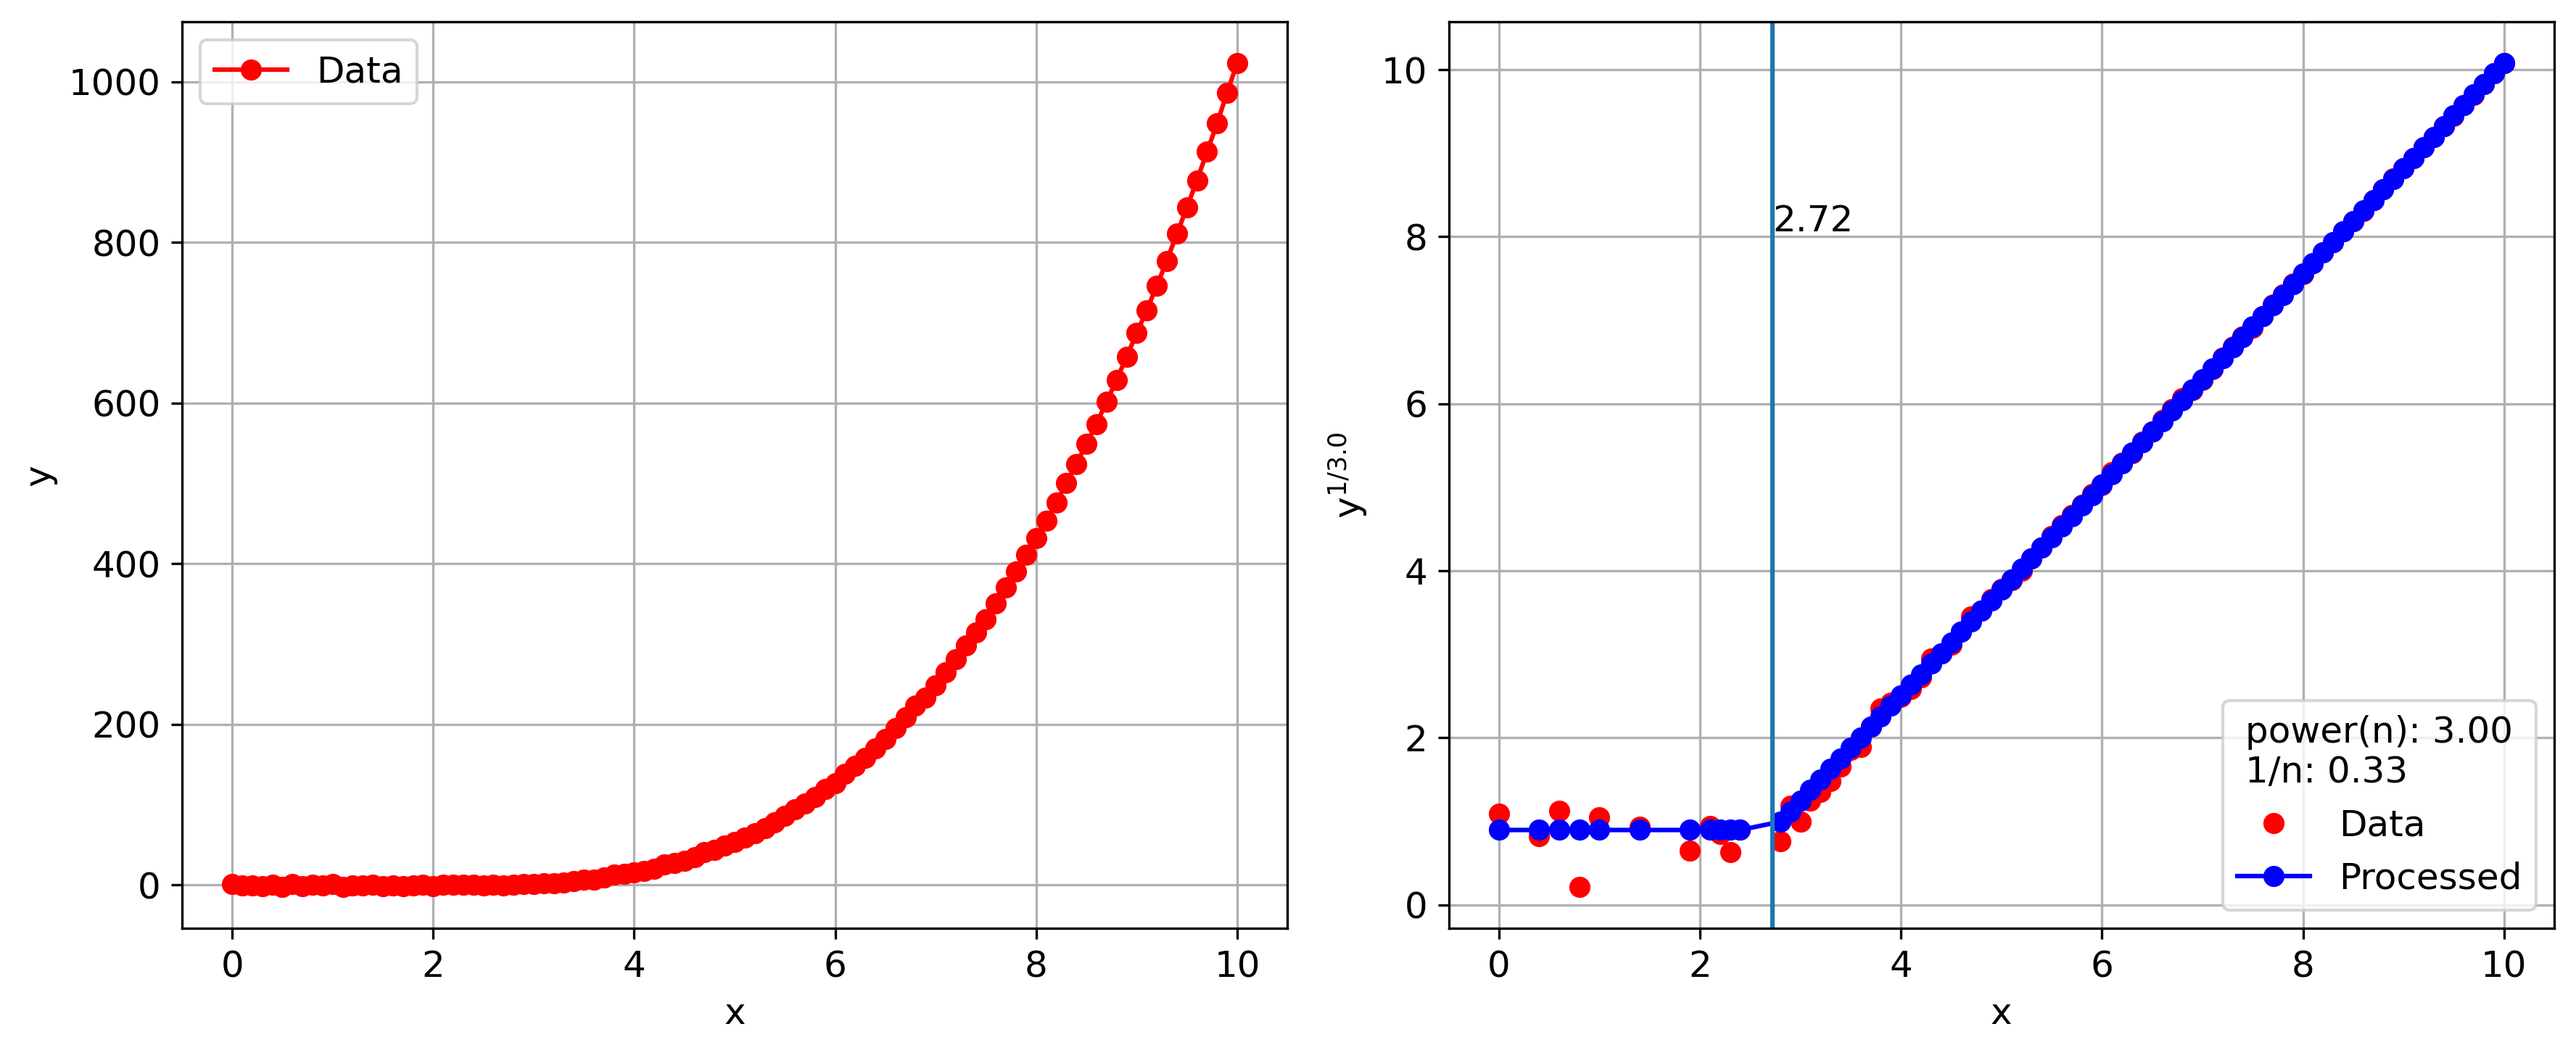

Const Power: shift: 2.83, power: 3.00


In [3]:
# noiseあり
np.random.seed(seed=1)
xx = np.arange(0,10.1,0.1)
p =  (2,2,3,1)
yy = simf.power_plus(xx,*p) + np.random.normal(loc=0.0, scale=1, size=len(xx))


temp = powfit.PfAnalysis(xx,yy)
# print('Constant Power')
temp.shift_estimate_by_power_scan(search_range=[2,3,4],
                                    zero_replace=False,
                                    # zero_replace=True,
                                    # likely_evaluation='r2_bp',
                                    likely_evaluation='r2',
                                    info=False, 
                                    plot=True)

print(f'Const Power: shift: {temp.shebypw["shift"]:.2f}, power: {temp.shebypw["power"]:.2f}')

ratio:0.00, Max:1024.00, Min:0.00


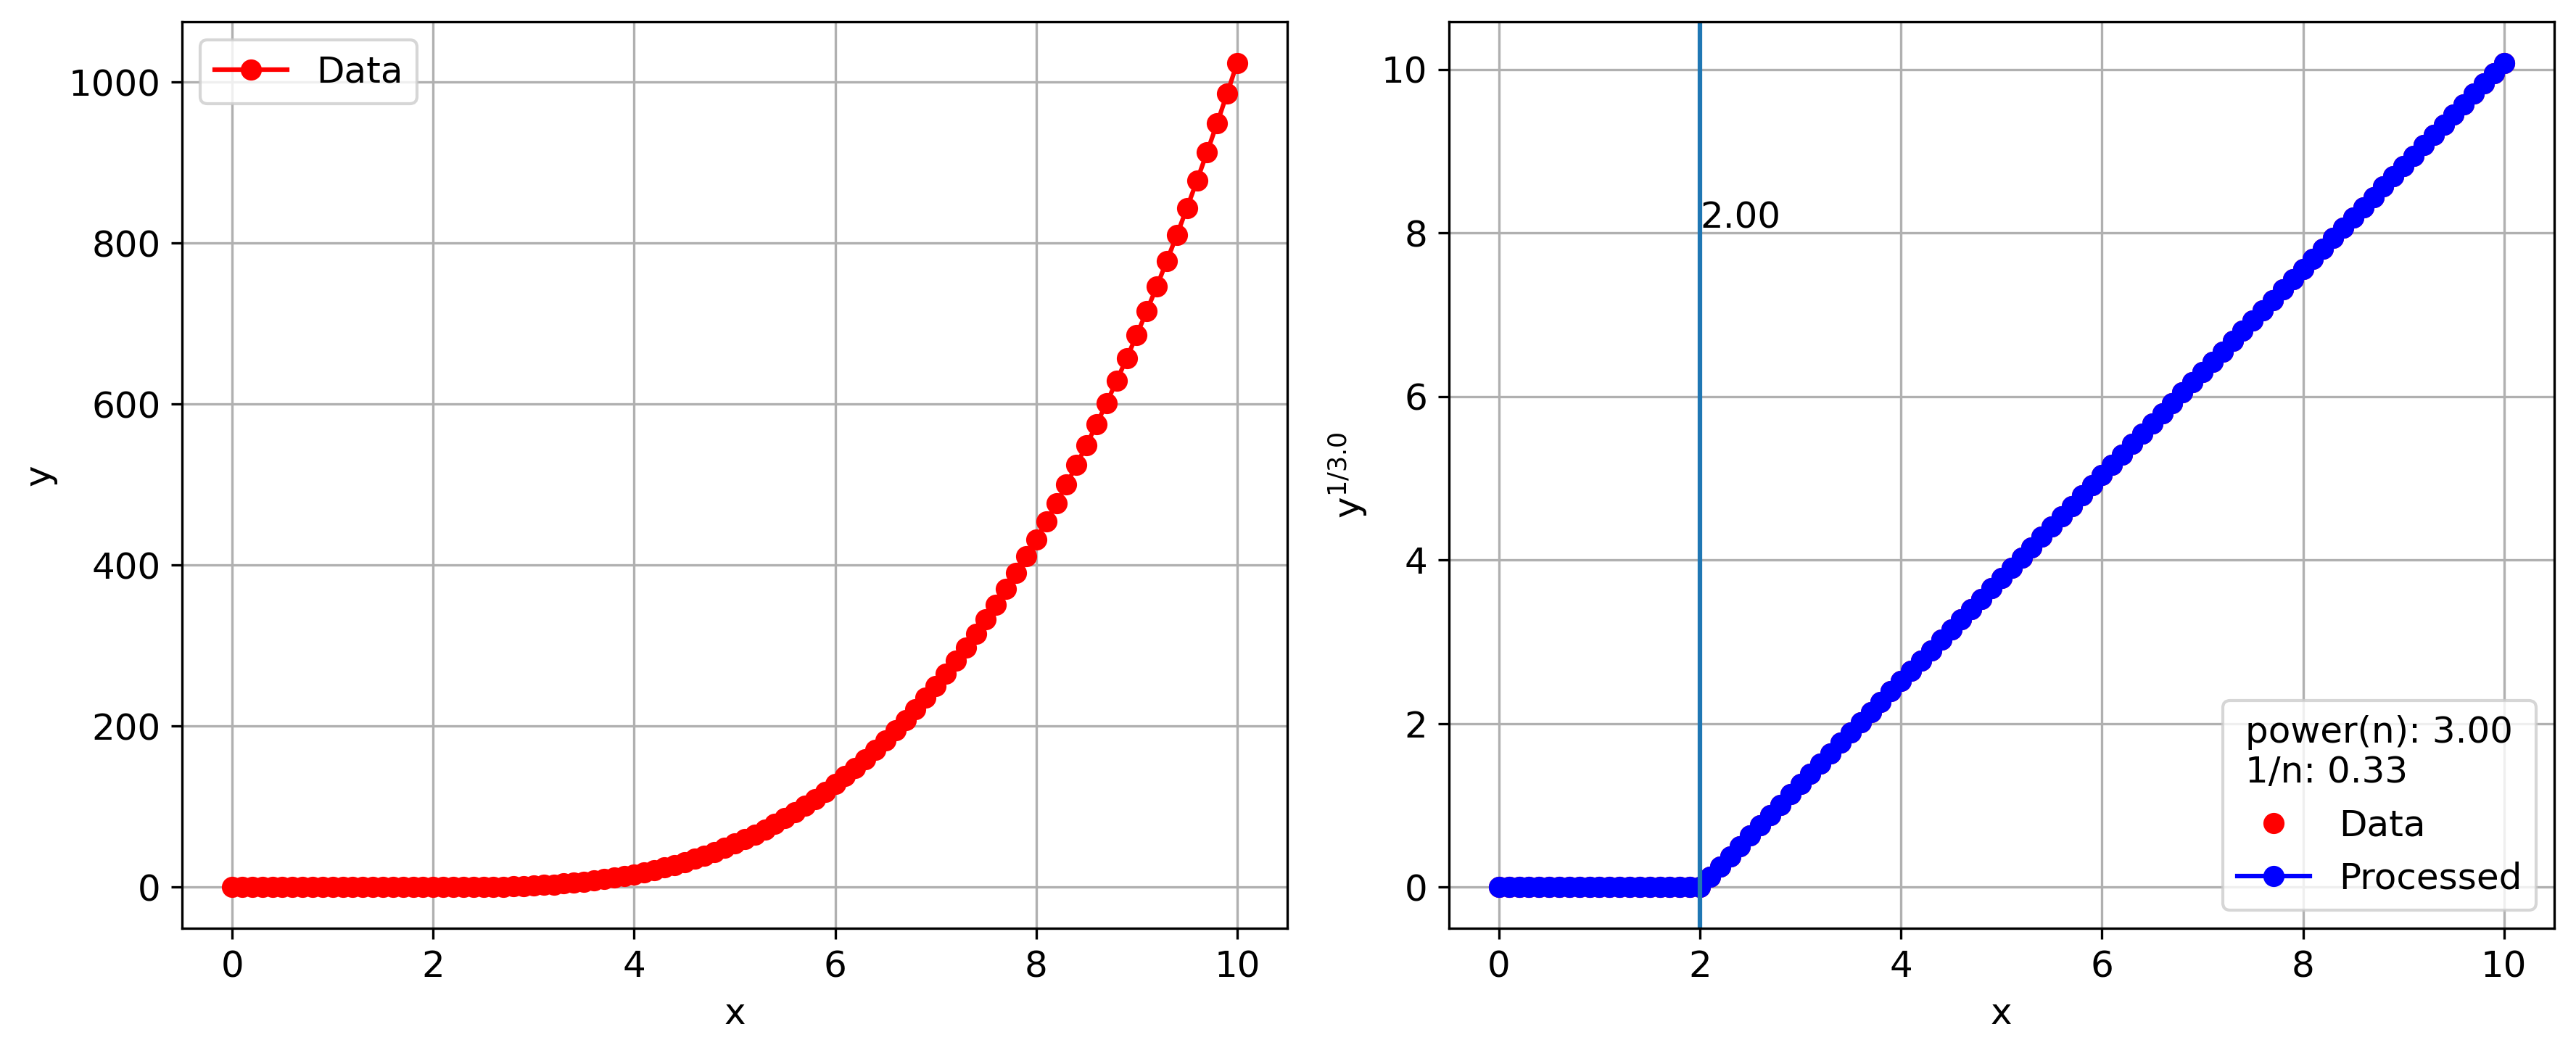

ratio:0.00, Max:1025.00, Min:1.00


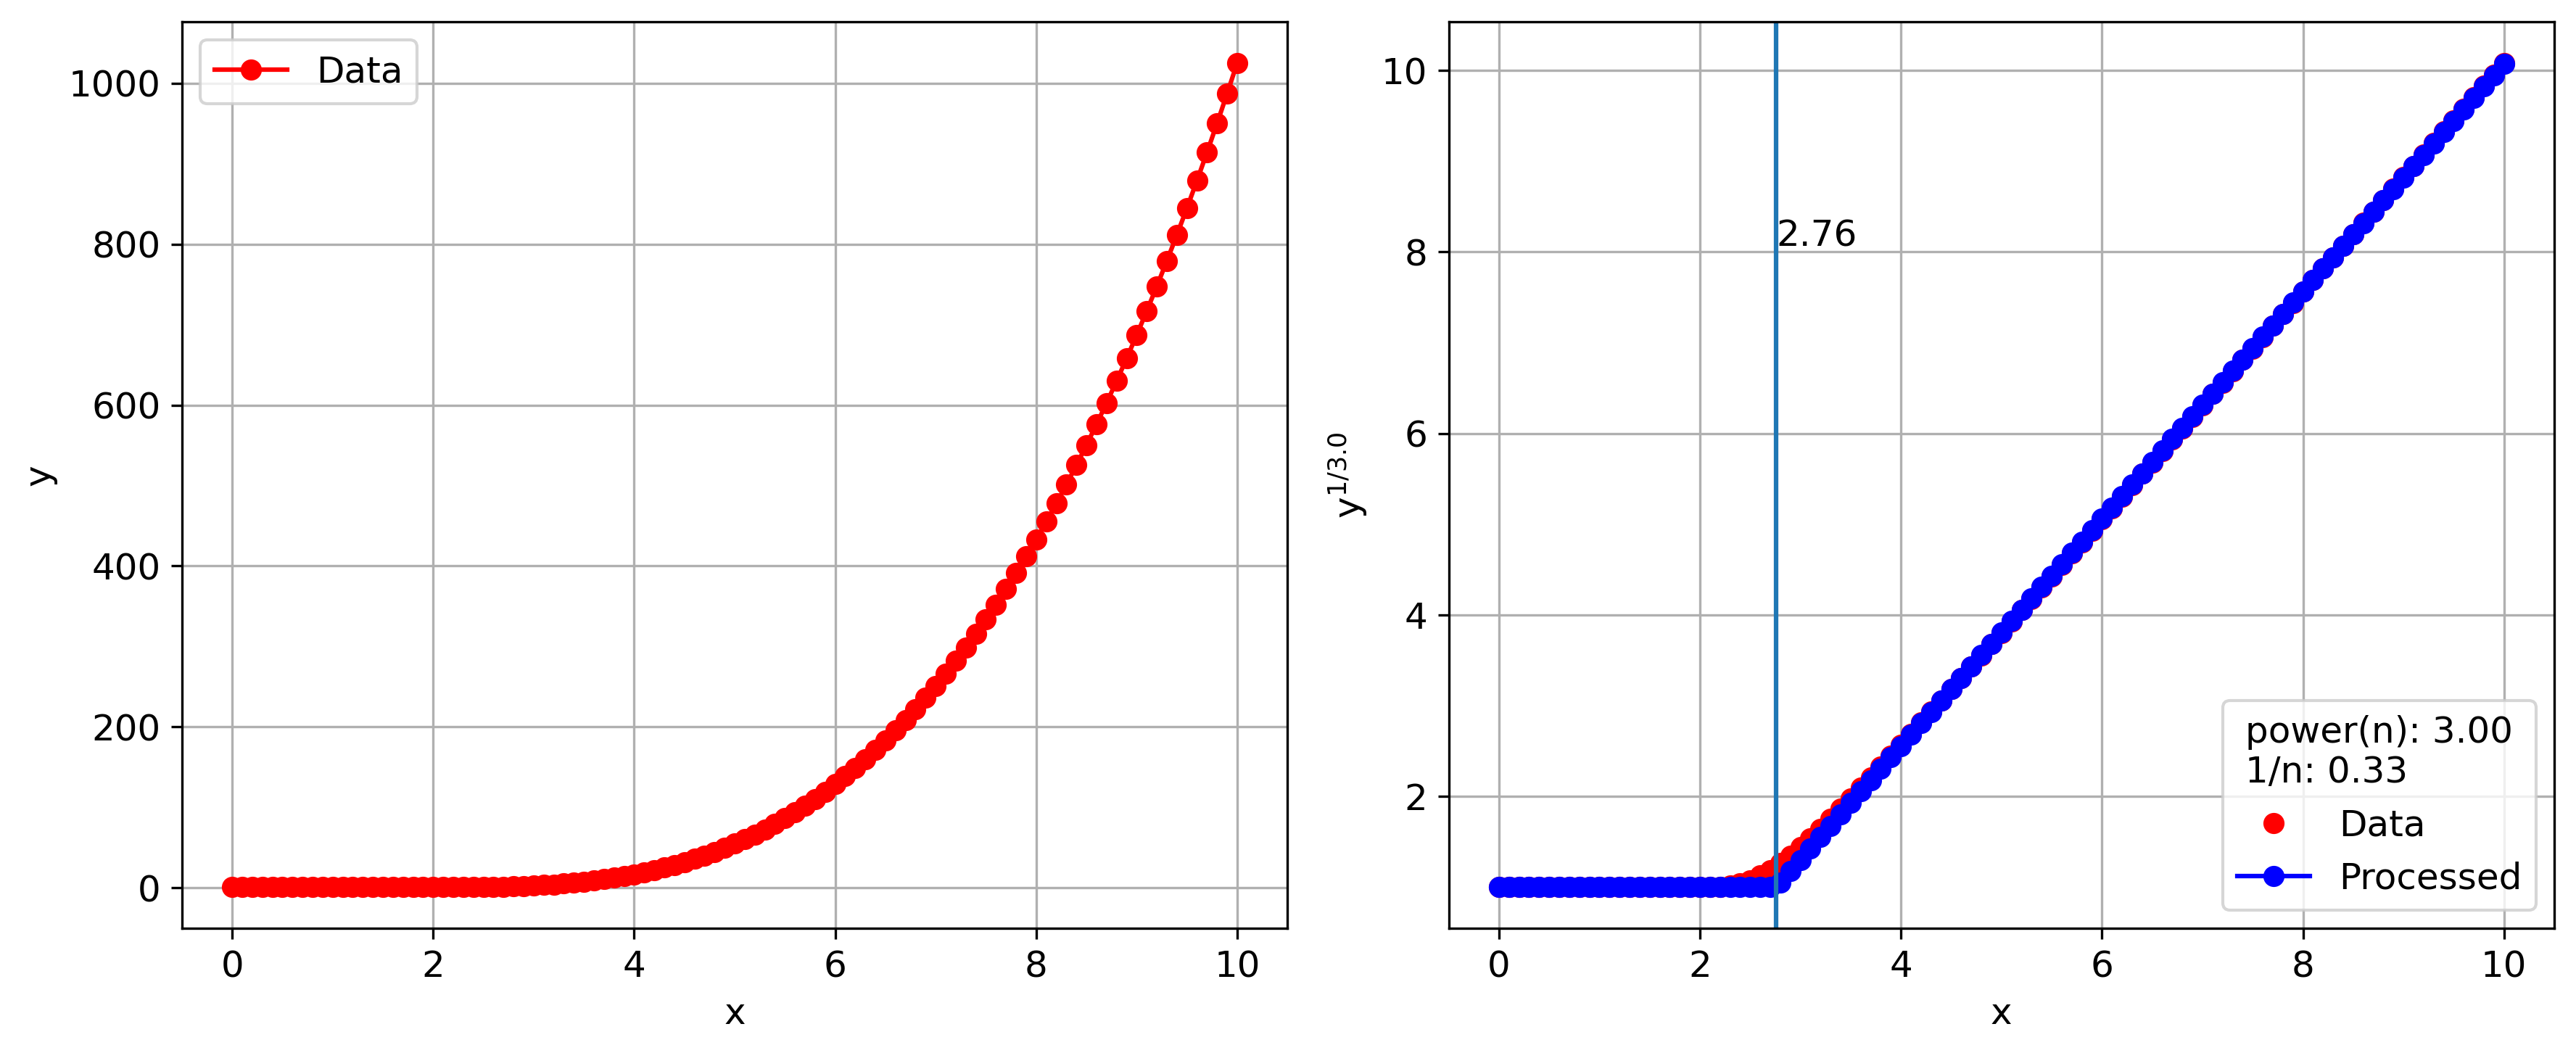

ratio:0.00, Max:1029.00, Min:5.00


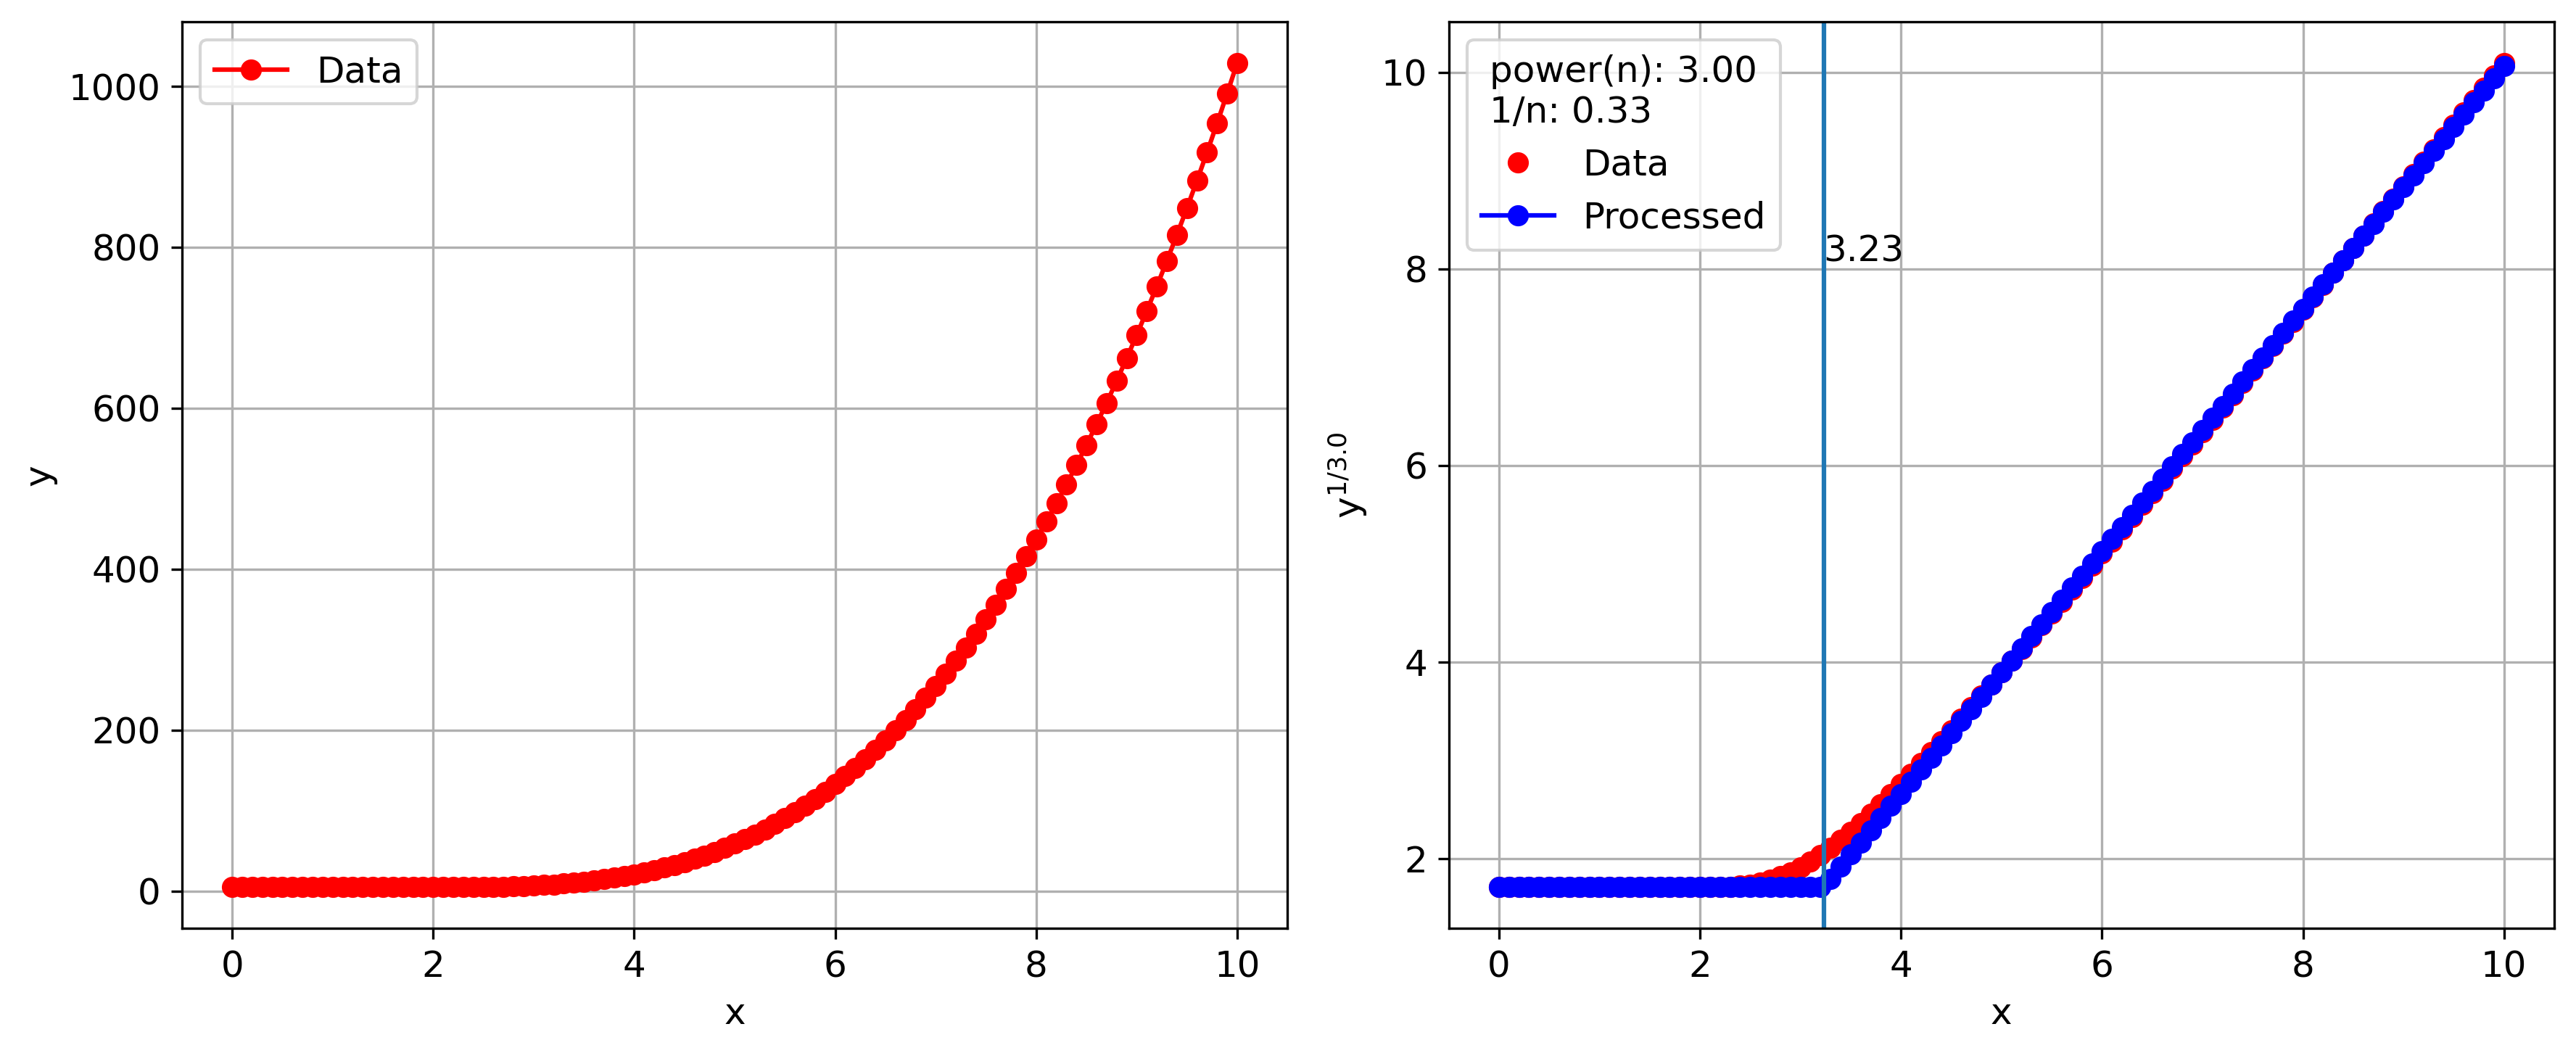

ratio:0.01, Max:1034.00, Min:10.00


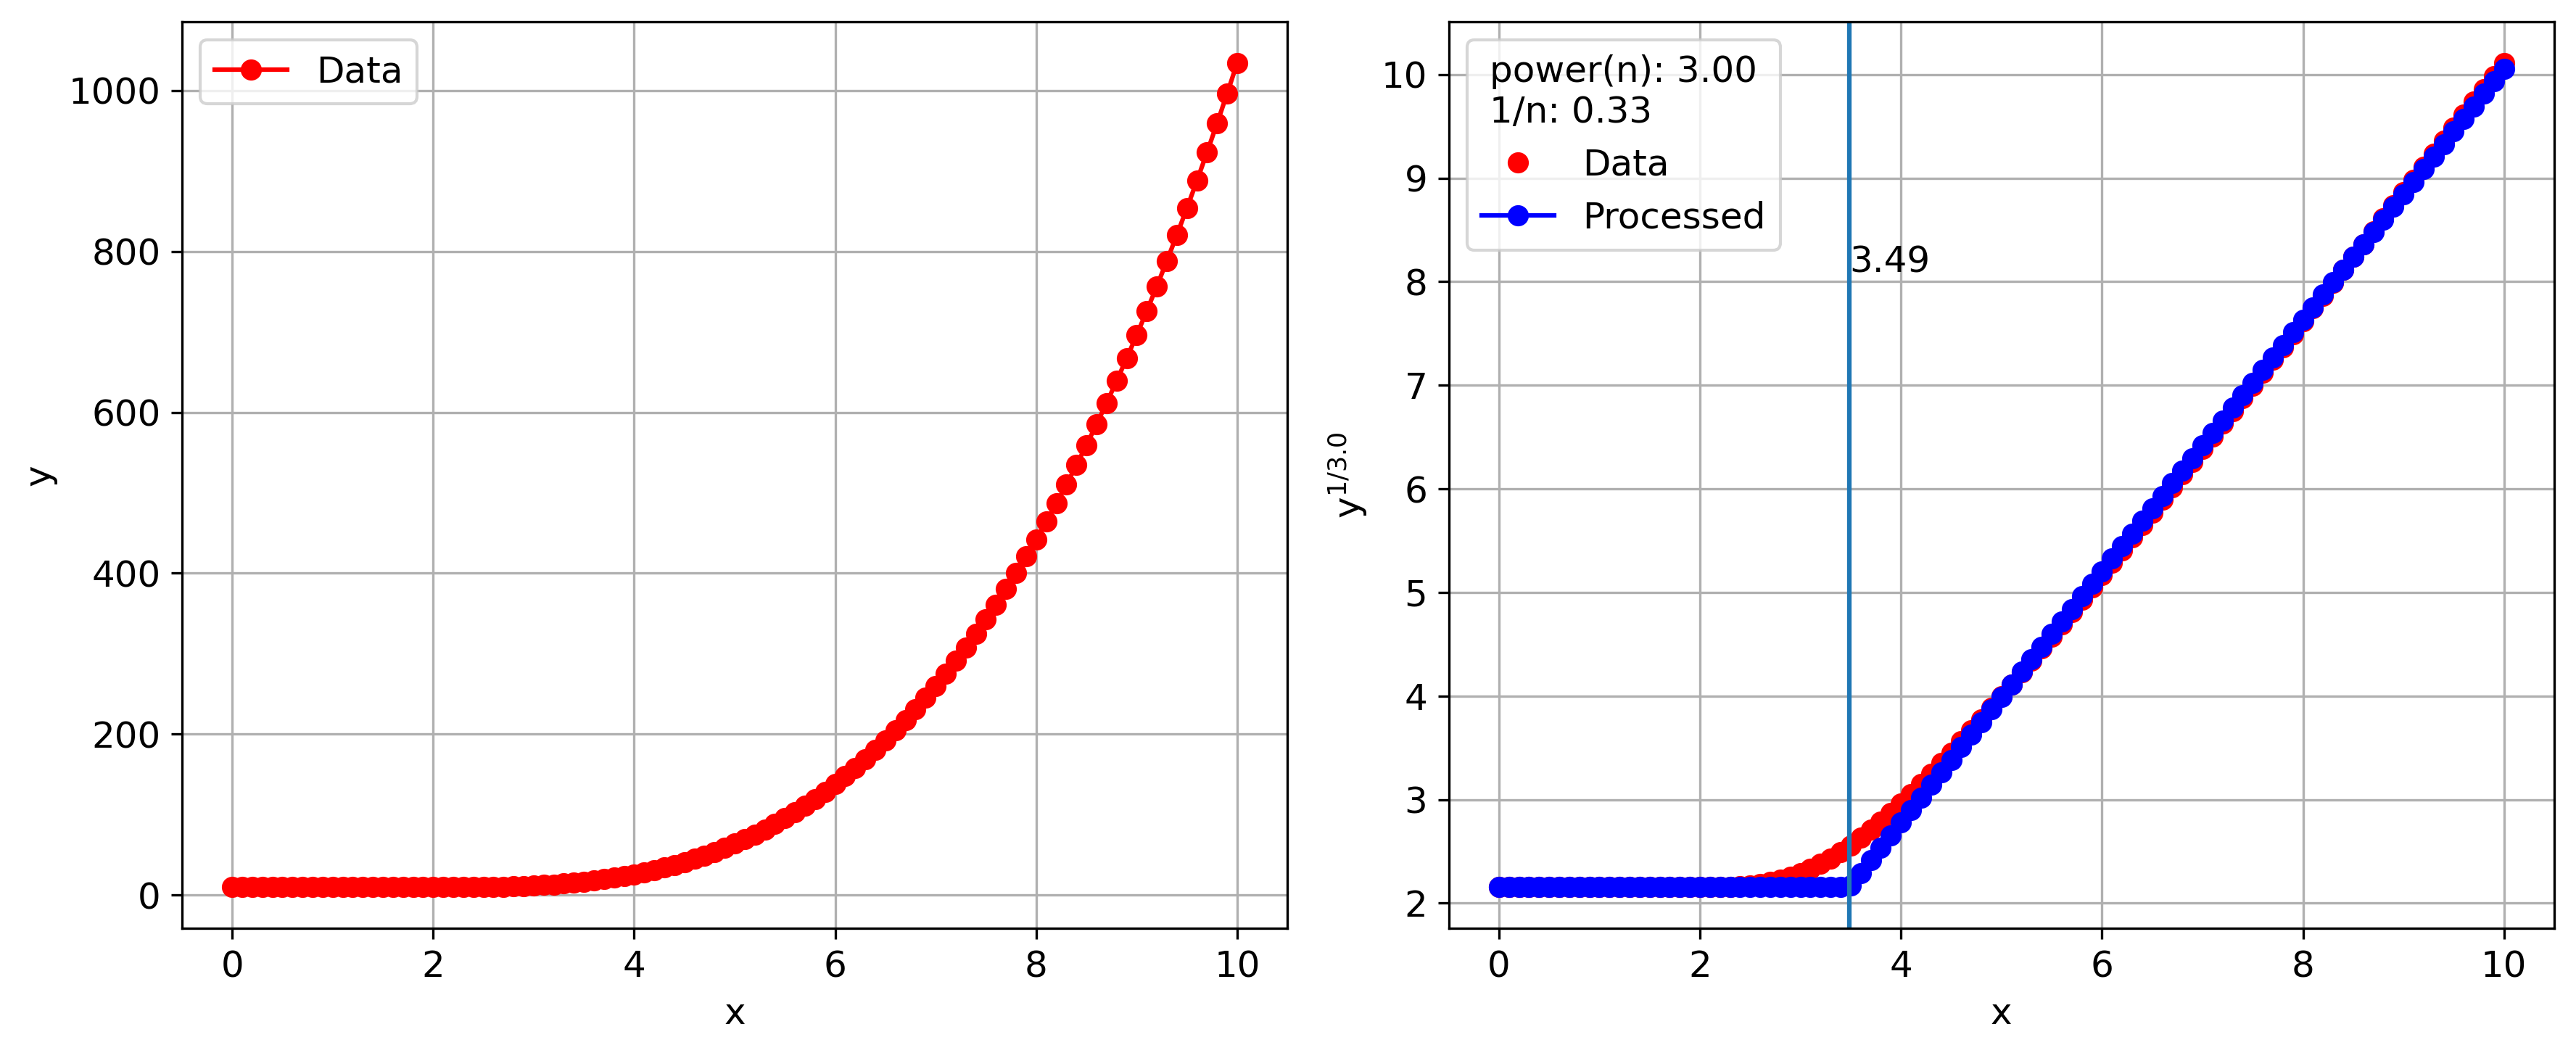

ratio:0.01, Max:1039.00, Min:15.00


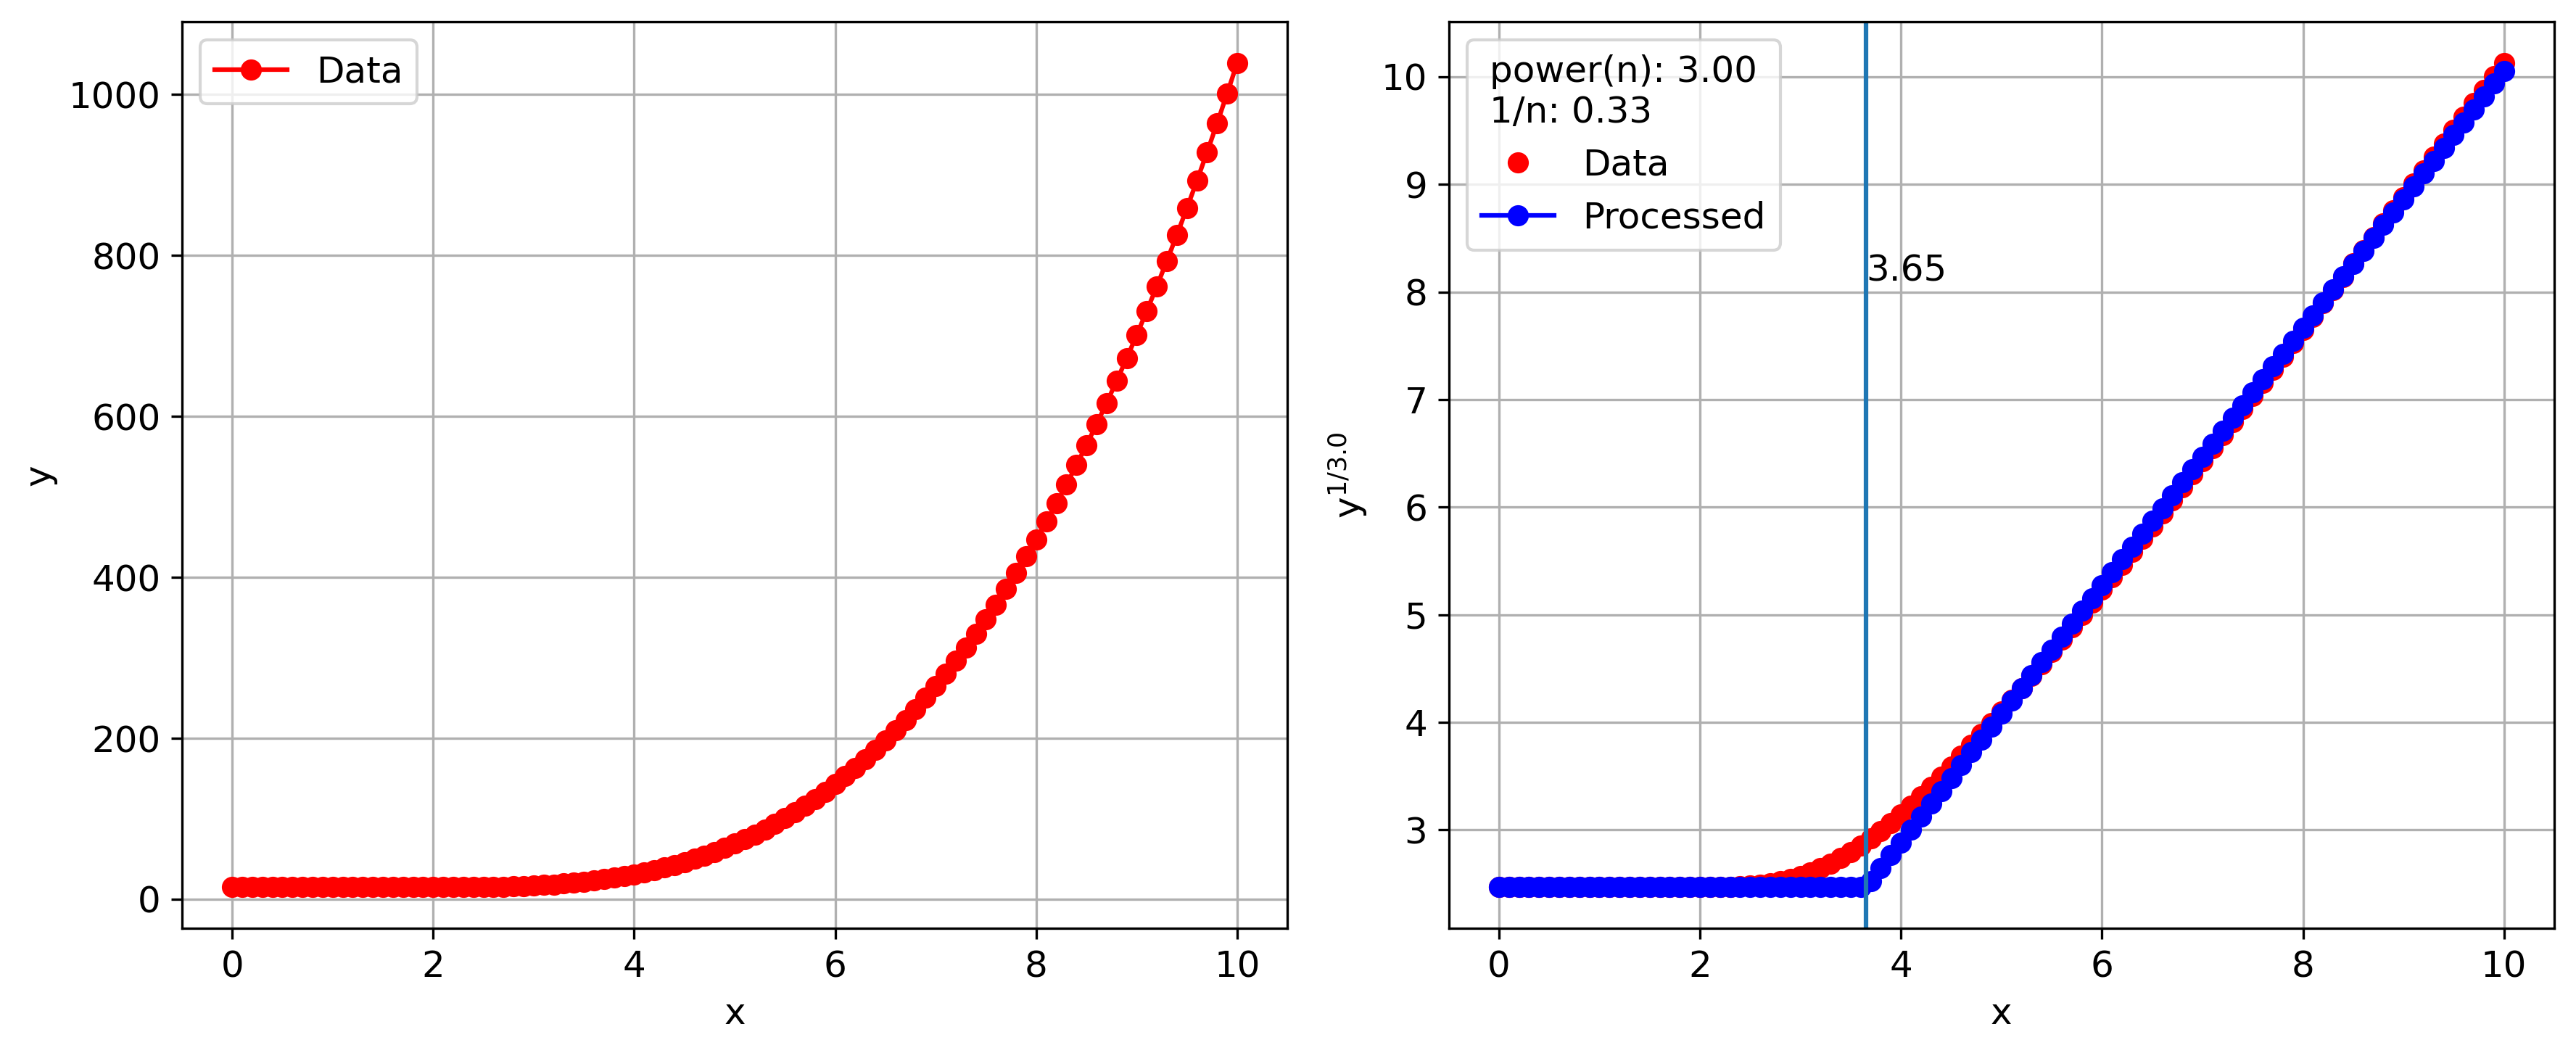

ratio:0.02, Max:1044.00, Min:20.00


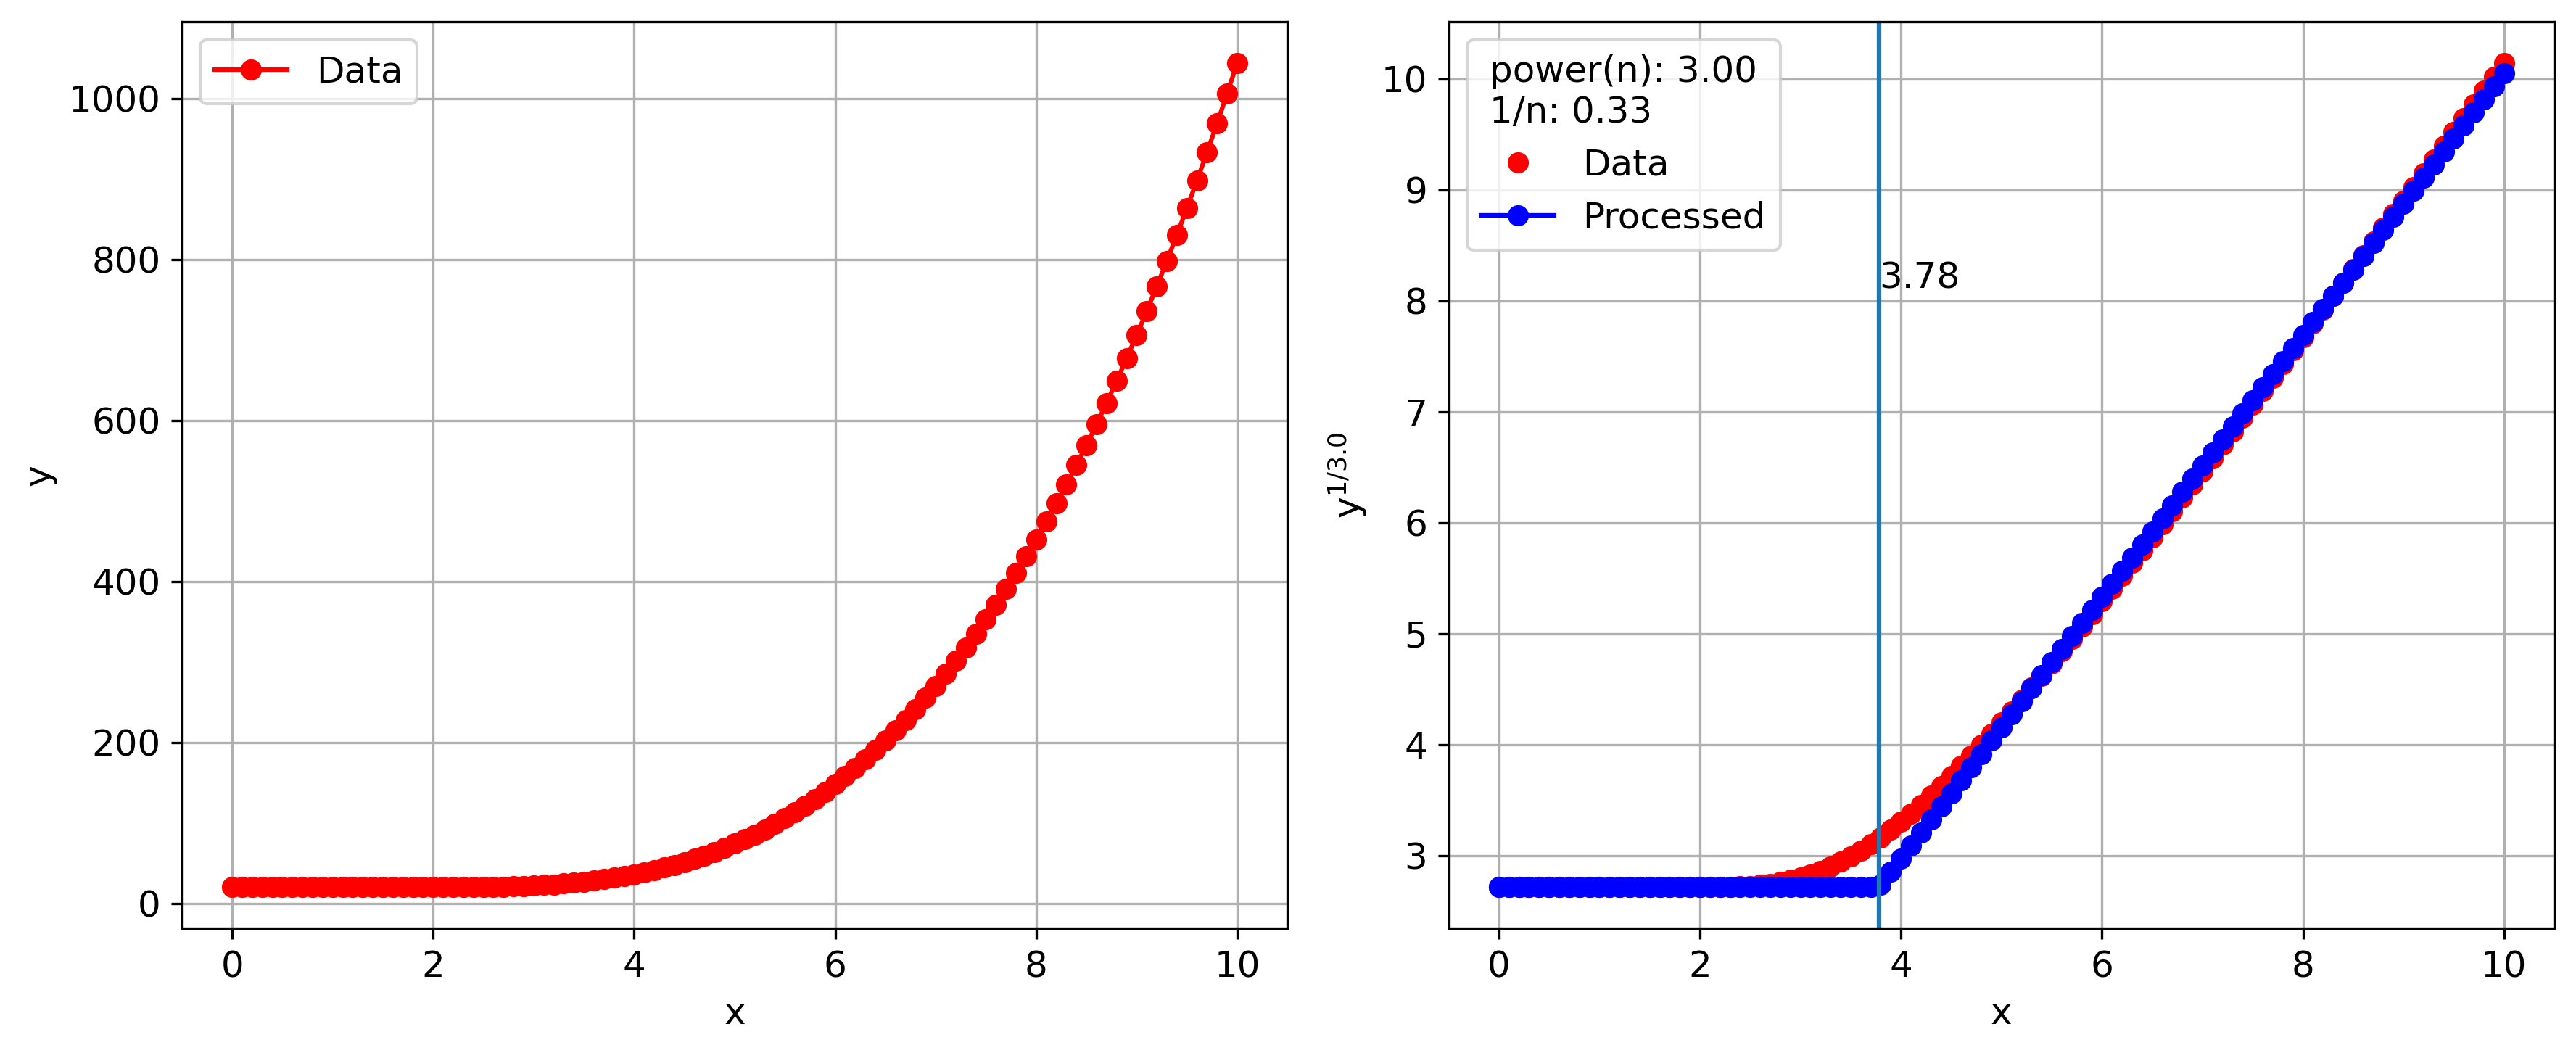

ratio:0.03, Max:1054.00, Min:30.00


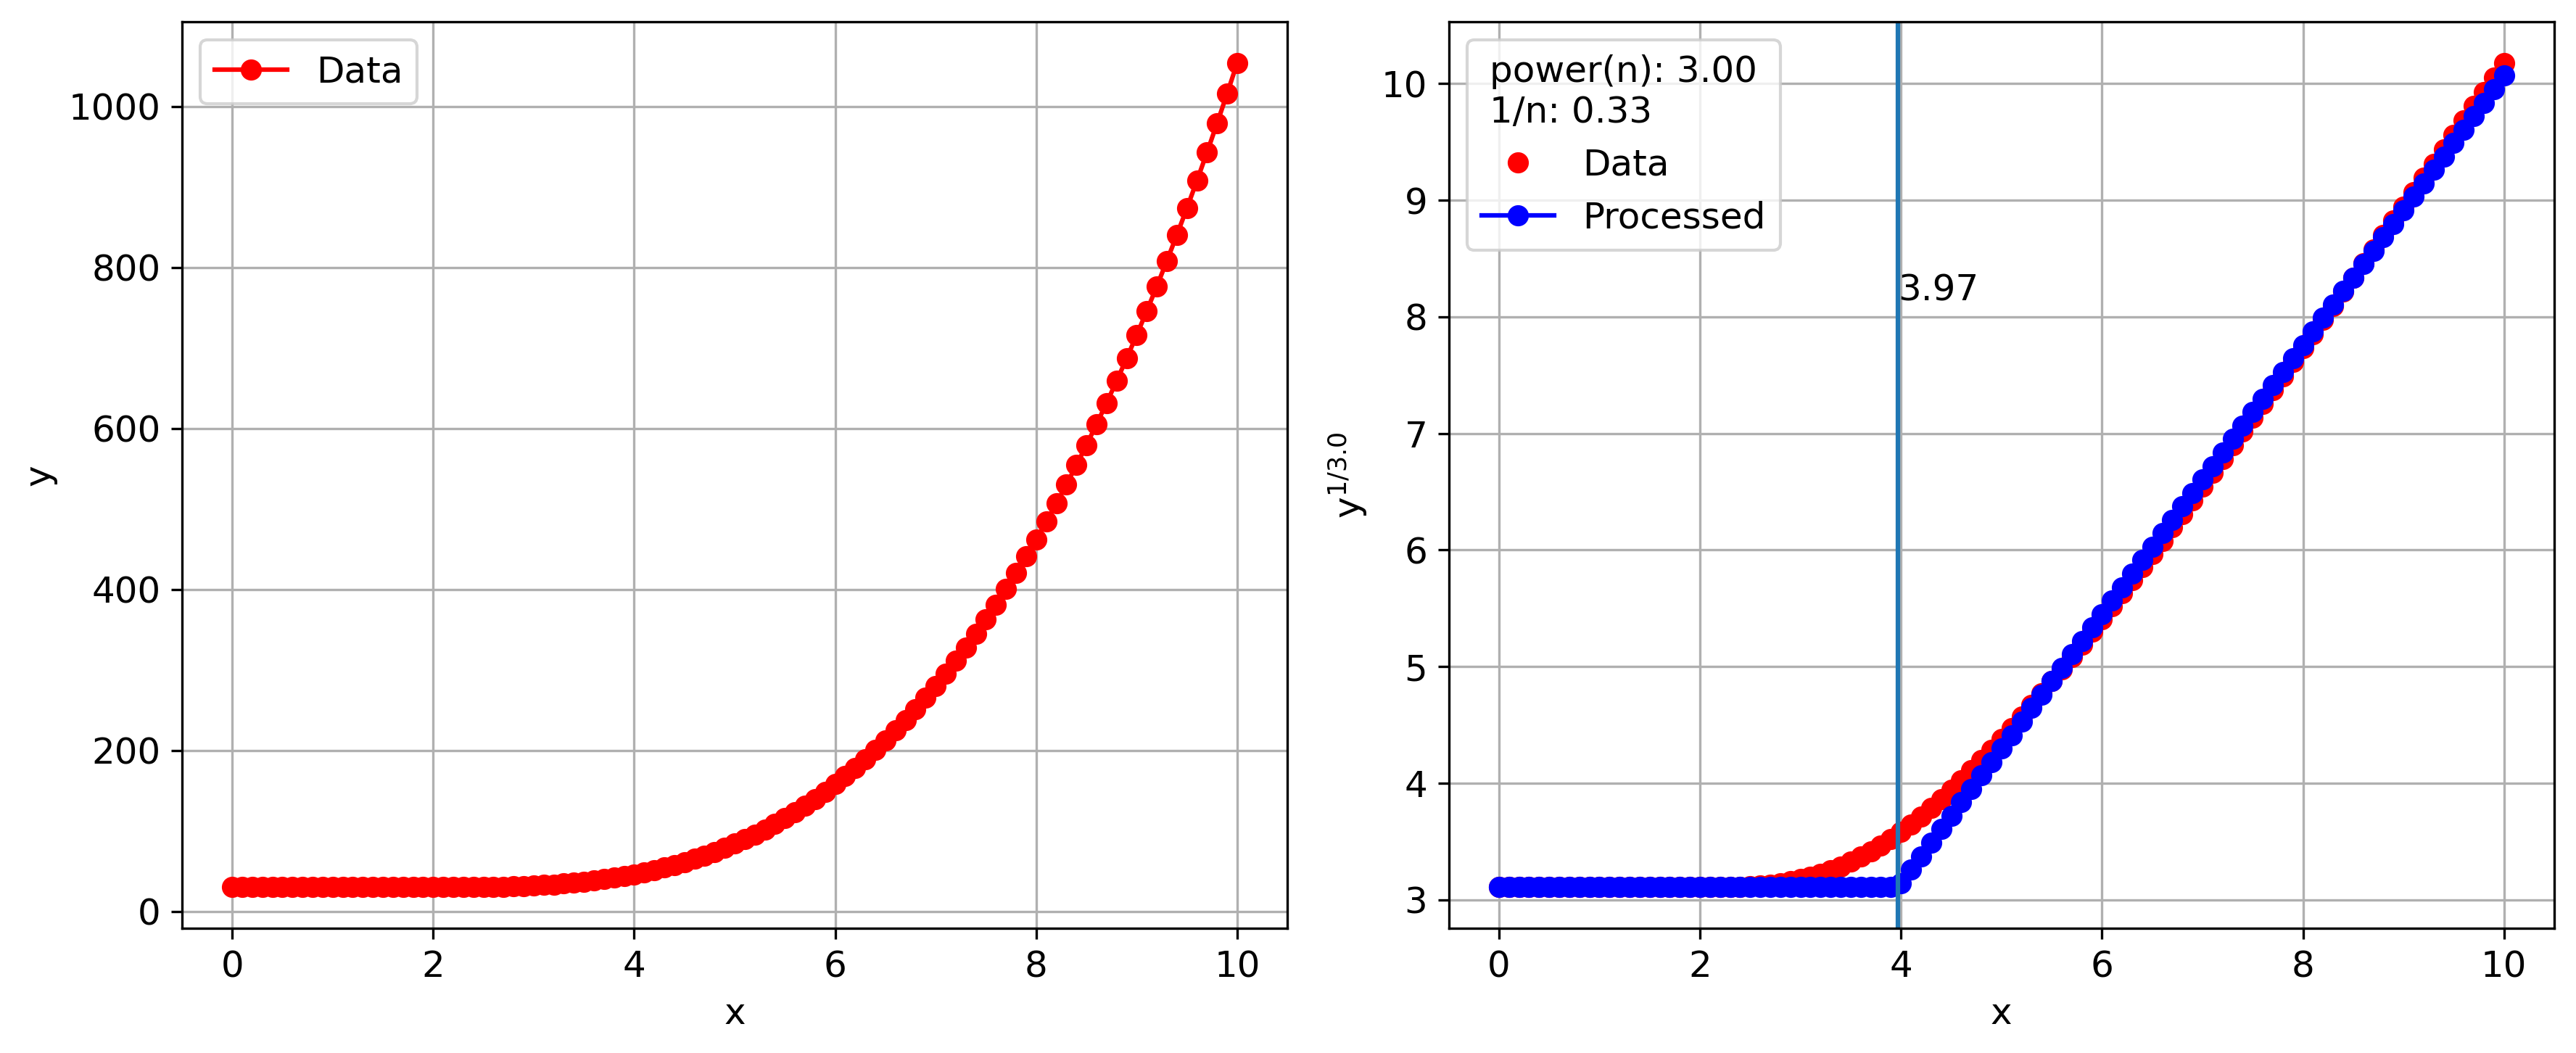

ratio:0.04, Max:1064.00, Min:40.00


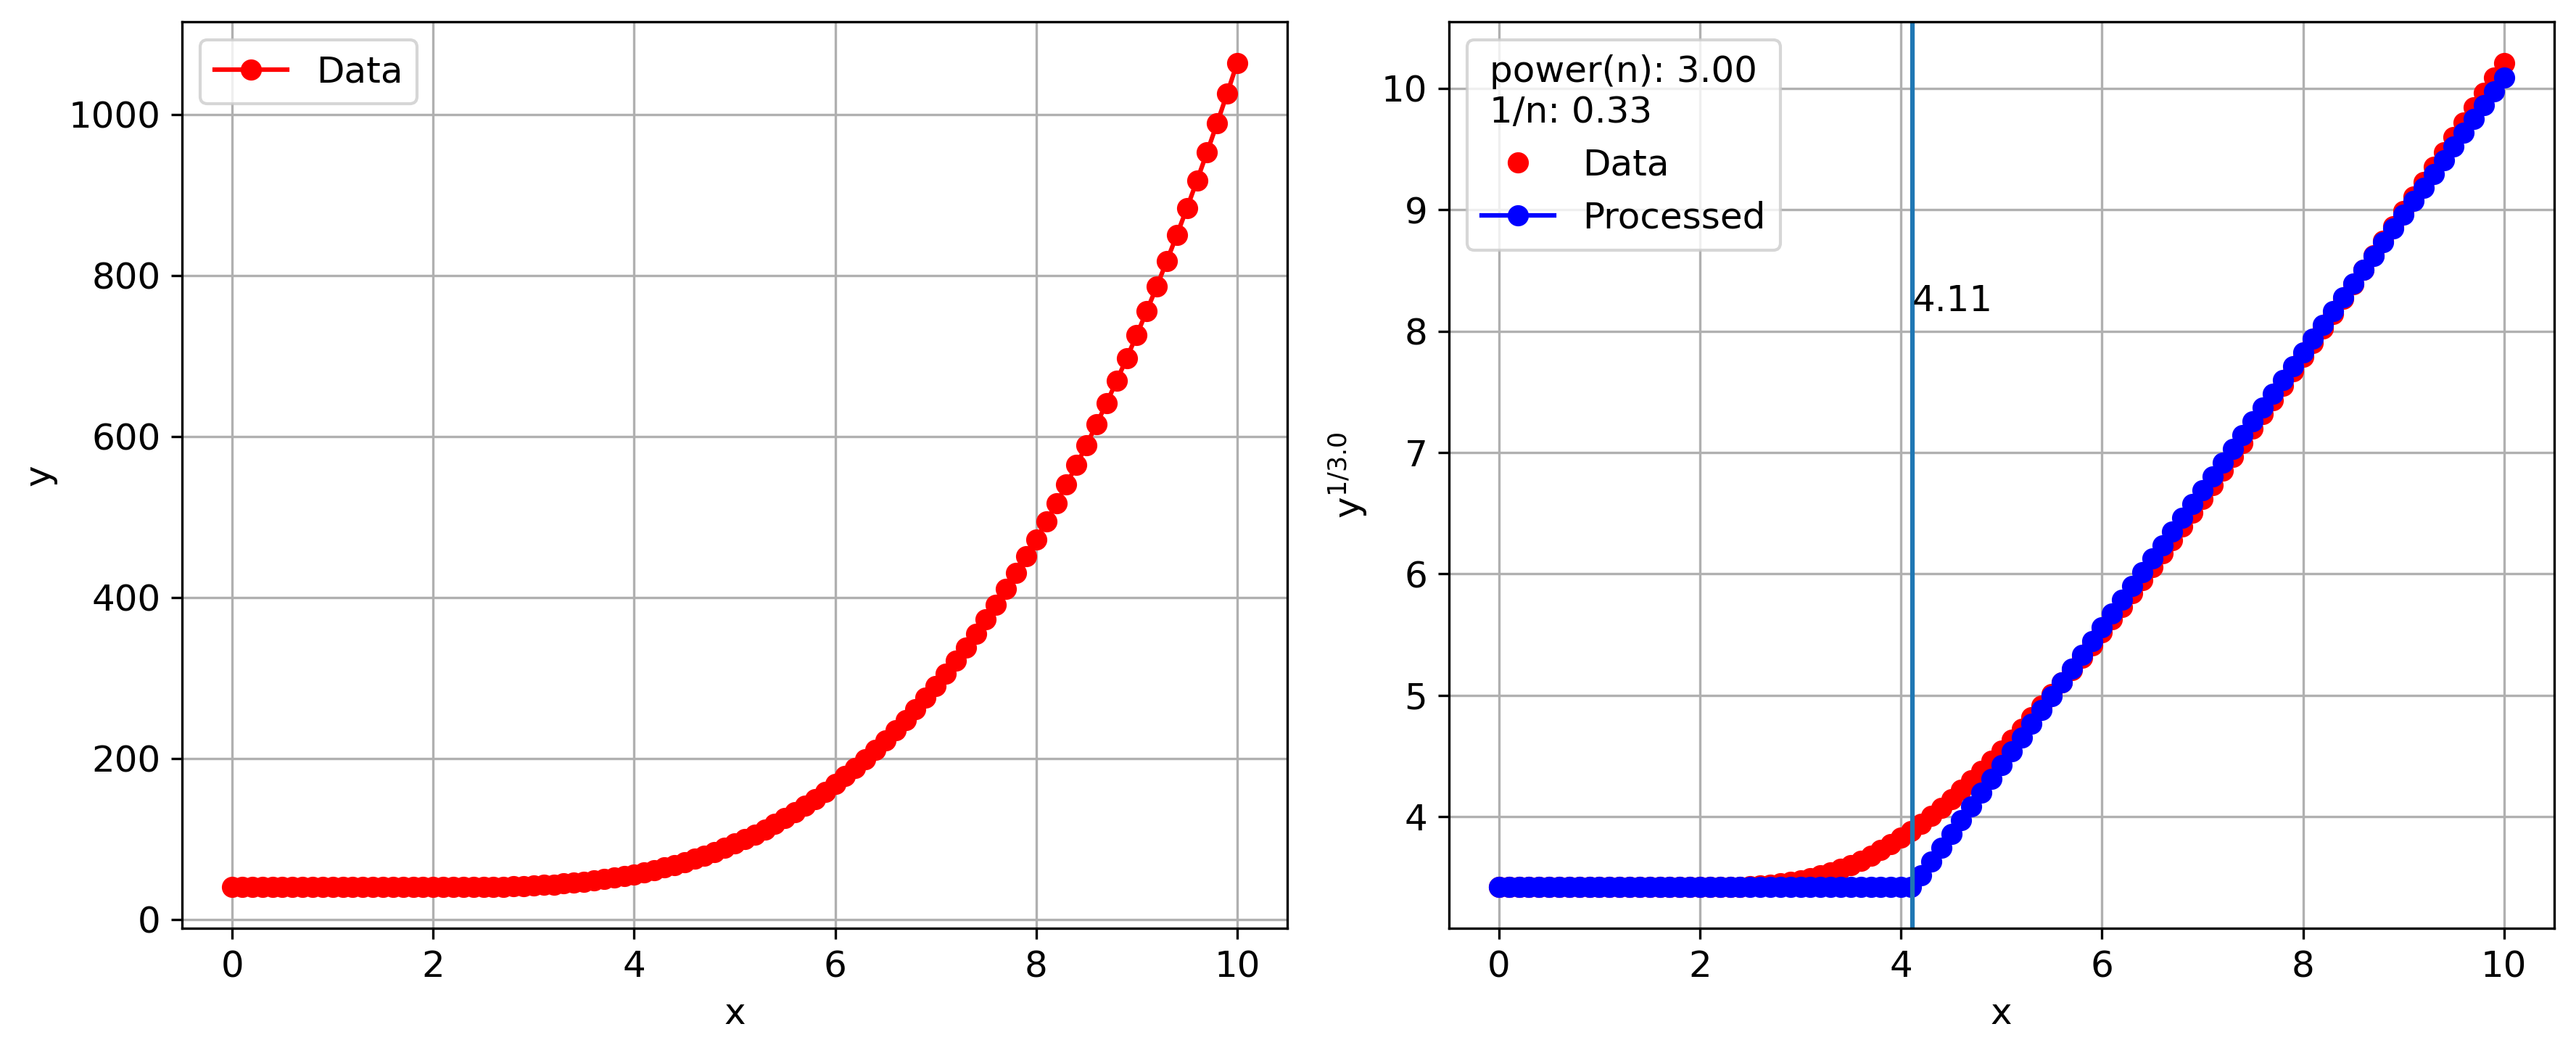

ratio:0.05, Max:1074.00, Min:50.00


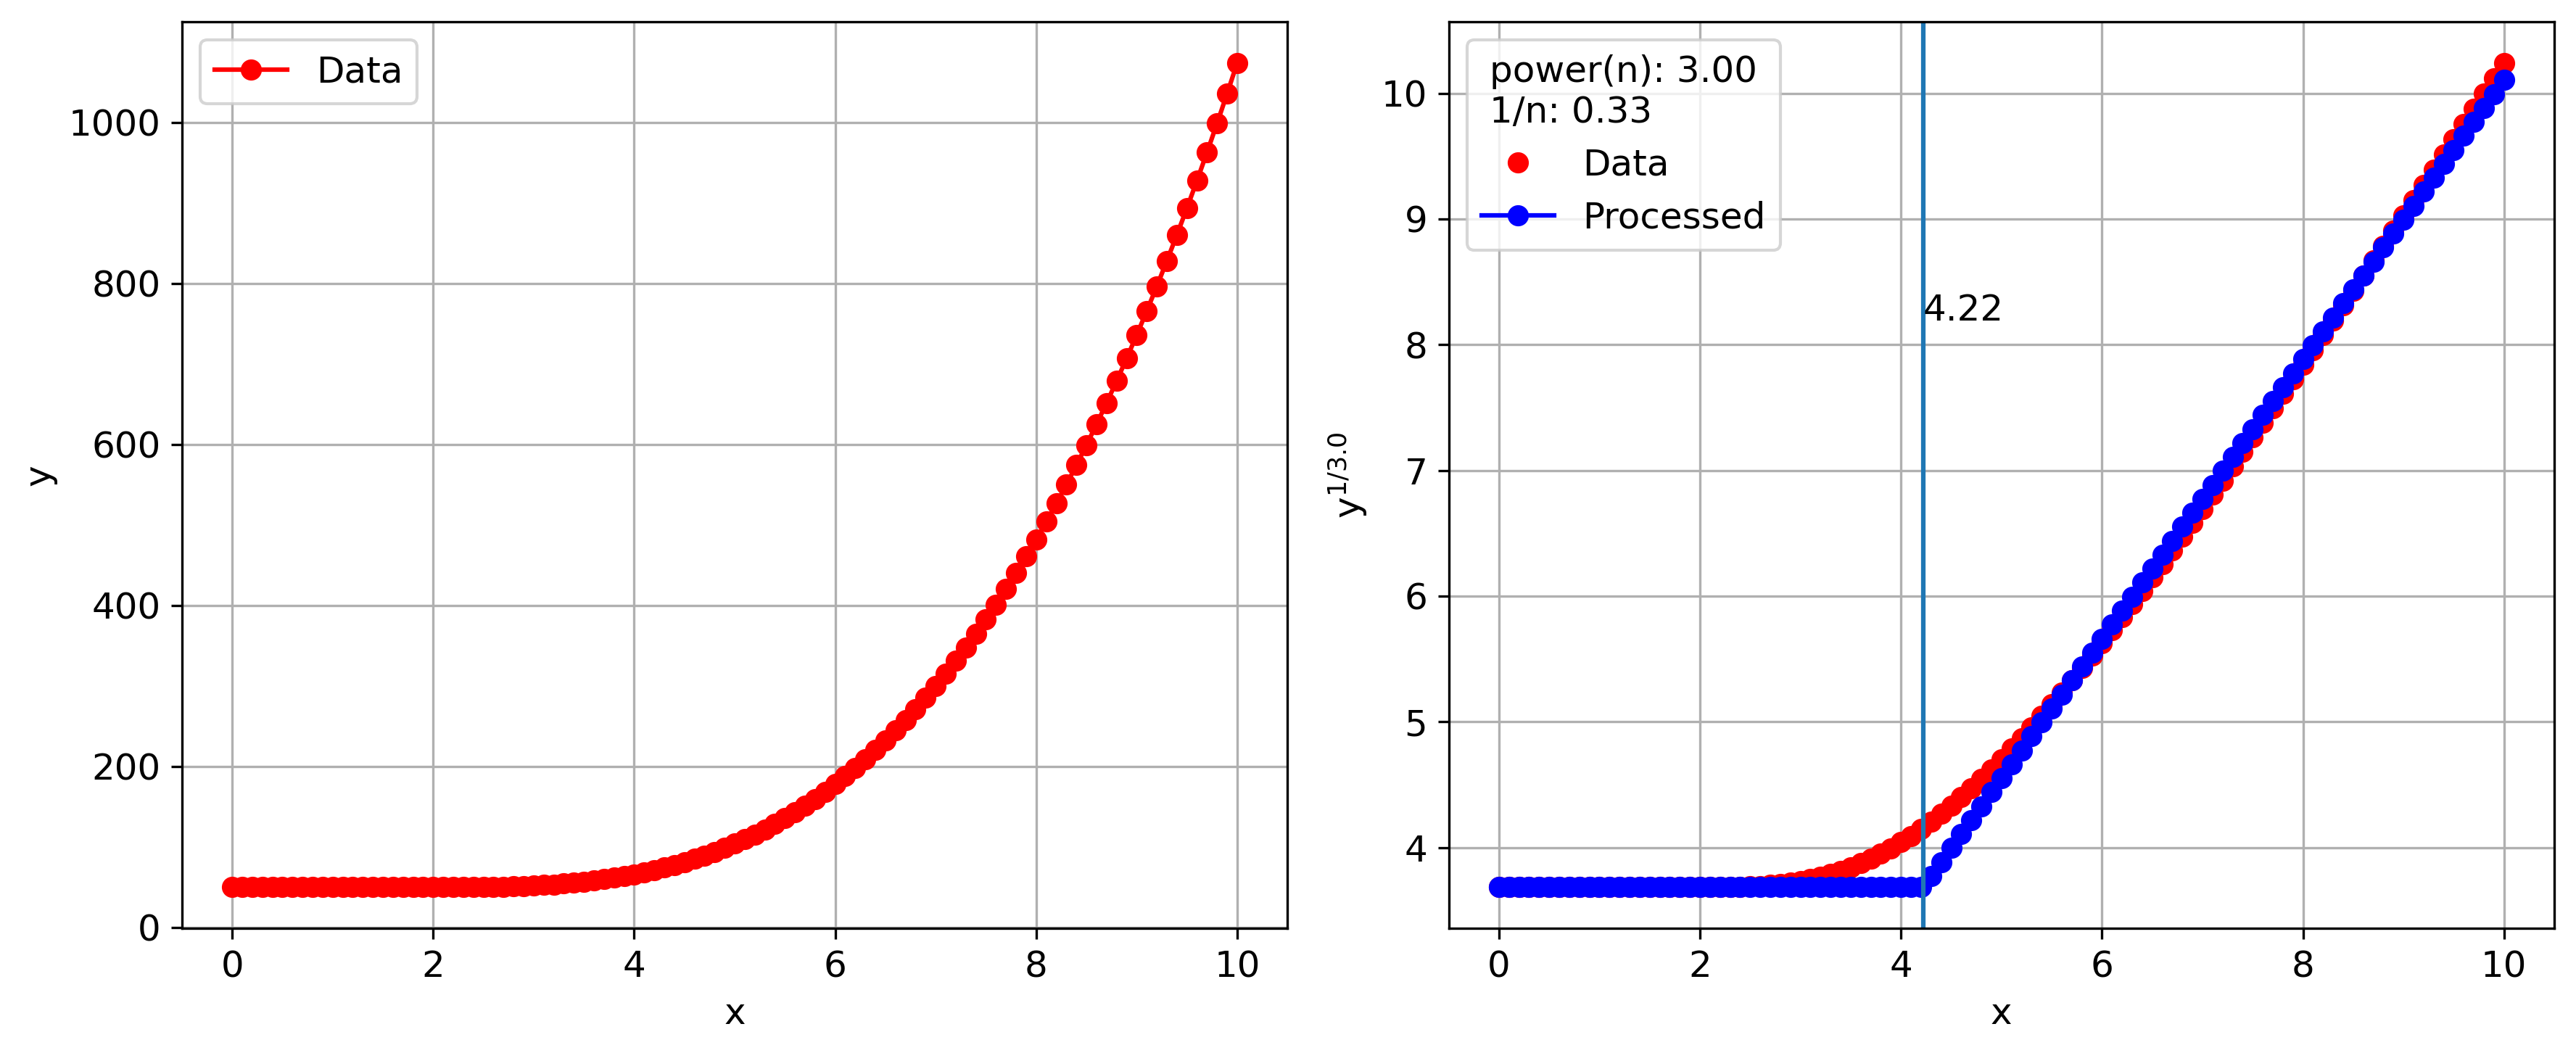

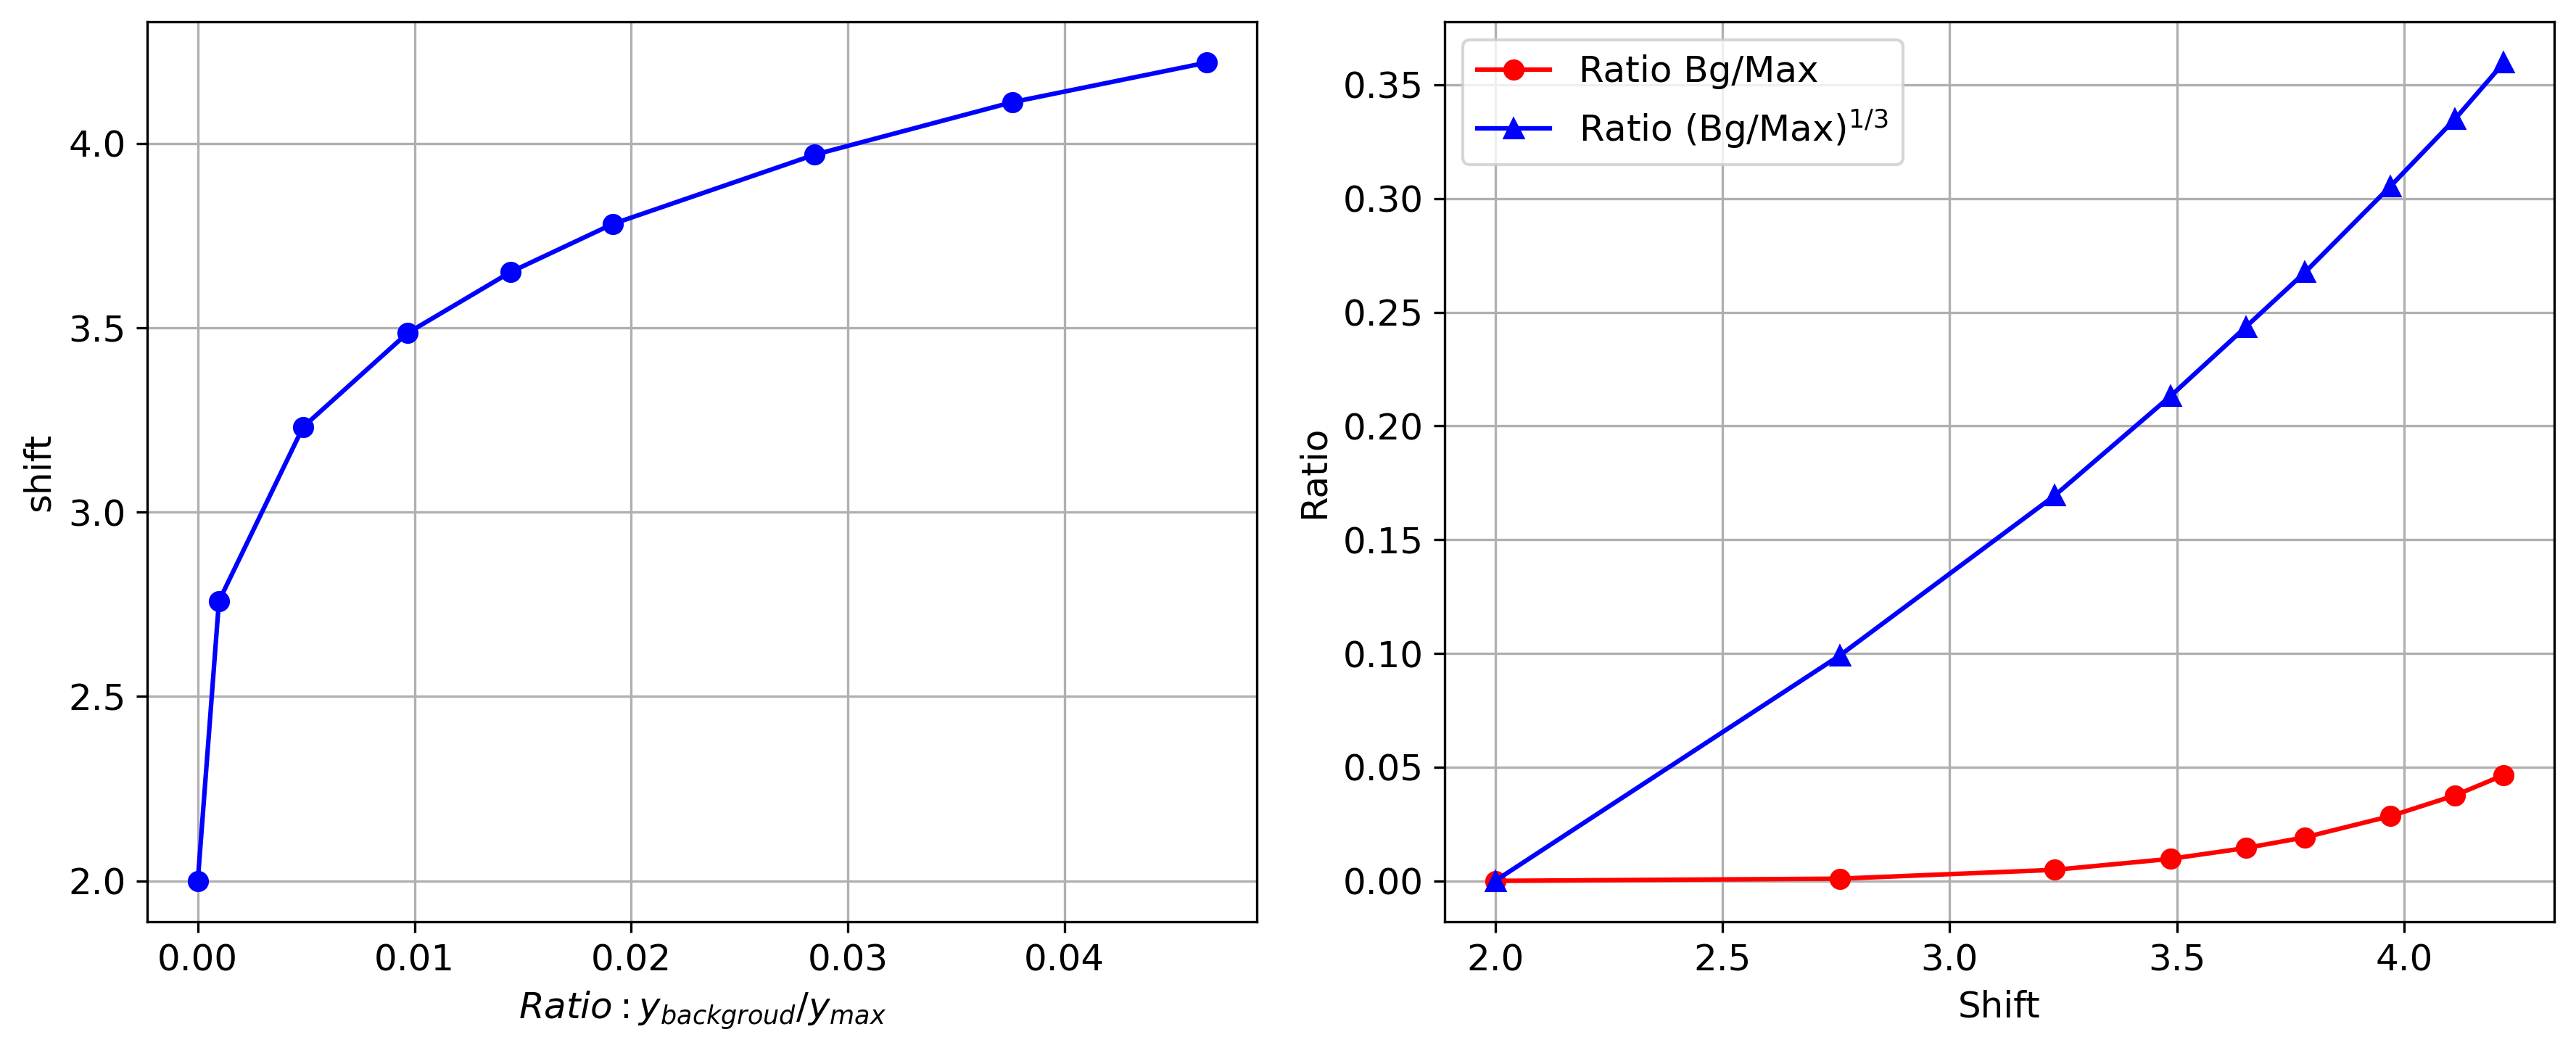

In [4]:
# バックグラウンドの値と閾値との関係

maxs=[]
mins=[]
ips=[]

bg_lists =  [0,1,5,10,15,20,30,40,50]

for i in bg_lists:
    pp =(2,2,3,i)
    ytemp= simf.power_plus(xx,*pp) 
    max_= np.max(ytemp)
    min_= np.min(ytemp)
    print(f'ratio:{min_/max_:.2f}, Max:{max_:.2f}, Min:{min_:.2f}')
    res1 = powfit.const_inv_power_fit(xdata=xx, ydata=ytemp, power_num=3, ini_params=None,
                            min_error='mae',
                            retry_r2=0.9, 
                            negative=False, zero_replace=False,
                            plot=True, info=False,)
    maxs.append(np.max(ytemp))
    mins.append(np.min(ytemp))
    ips.append(res1['popt'][1])

fig = plt.figure(figsize=(12,5), tight_layout=True)
ax1 = fig.add_subplot(1,2,1)
ax1.plot(np.array(mins)/np.array(maxs),ips, 'bo-')
ax1.grid()
ax1.set_ylabel('shift')
ax1.set_xlabel('$Ratio:y_{backgroud} / y_{max}$')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(ips, np.array(mins)/np.array(maxs), 'ro-', label='Ratio Bg/Max')
ax2.plot(ips, (np.power(np.array(mins),1/3))/(np.power(np.array(maxs),1/3)), 'b^-', label='Ratio (Bg/Max)$^{1/3}$')
ax2.grid()
ax2.set_xlabel('Shift')
ax2.set_ylabel('Ratio')
ax2.legend()


#### Log-Log Plots Simulation

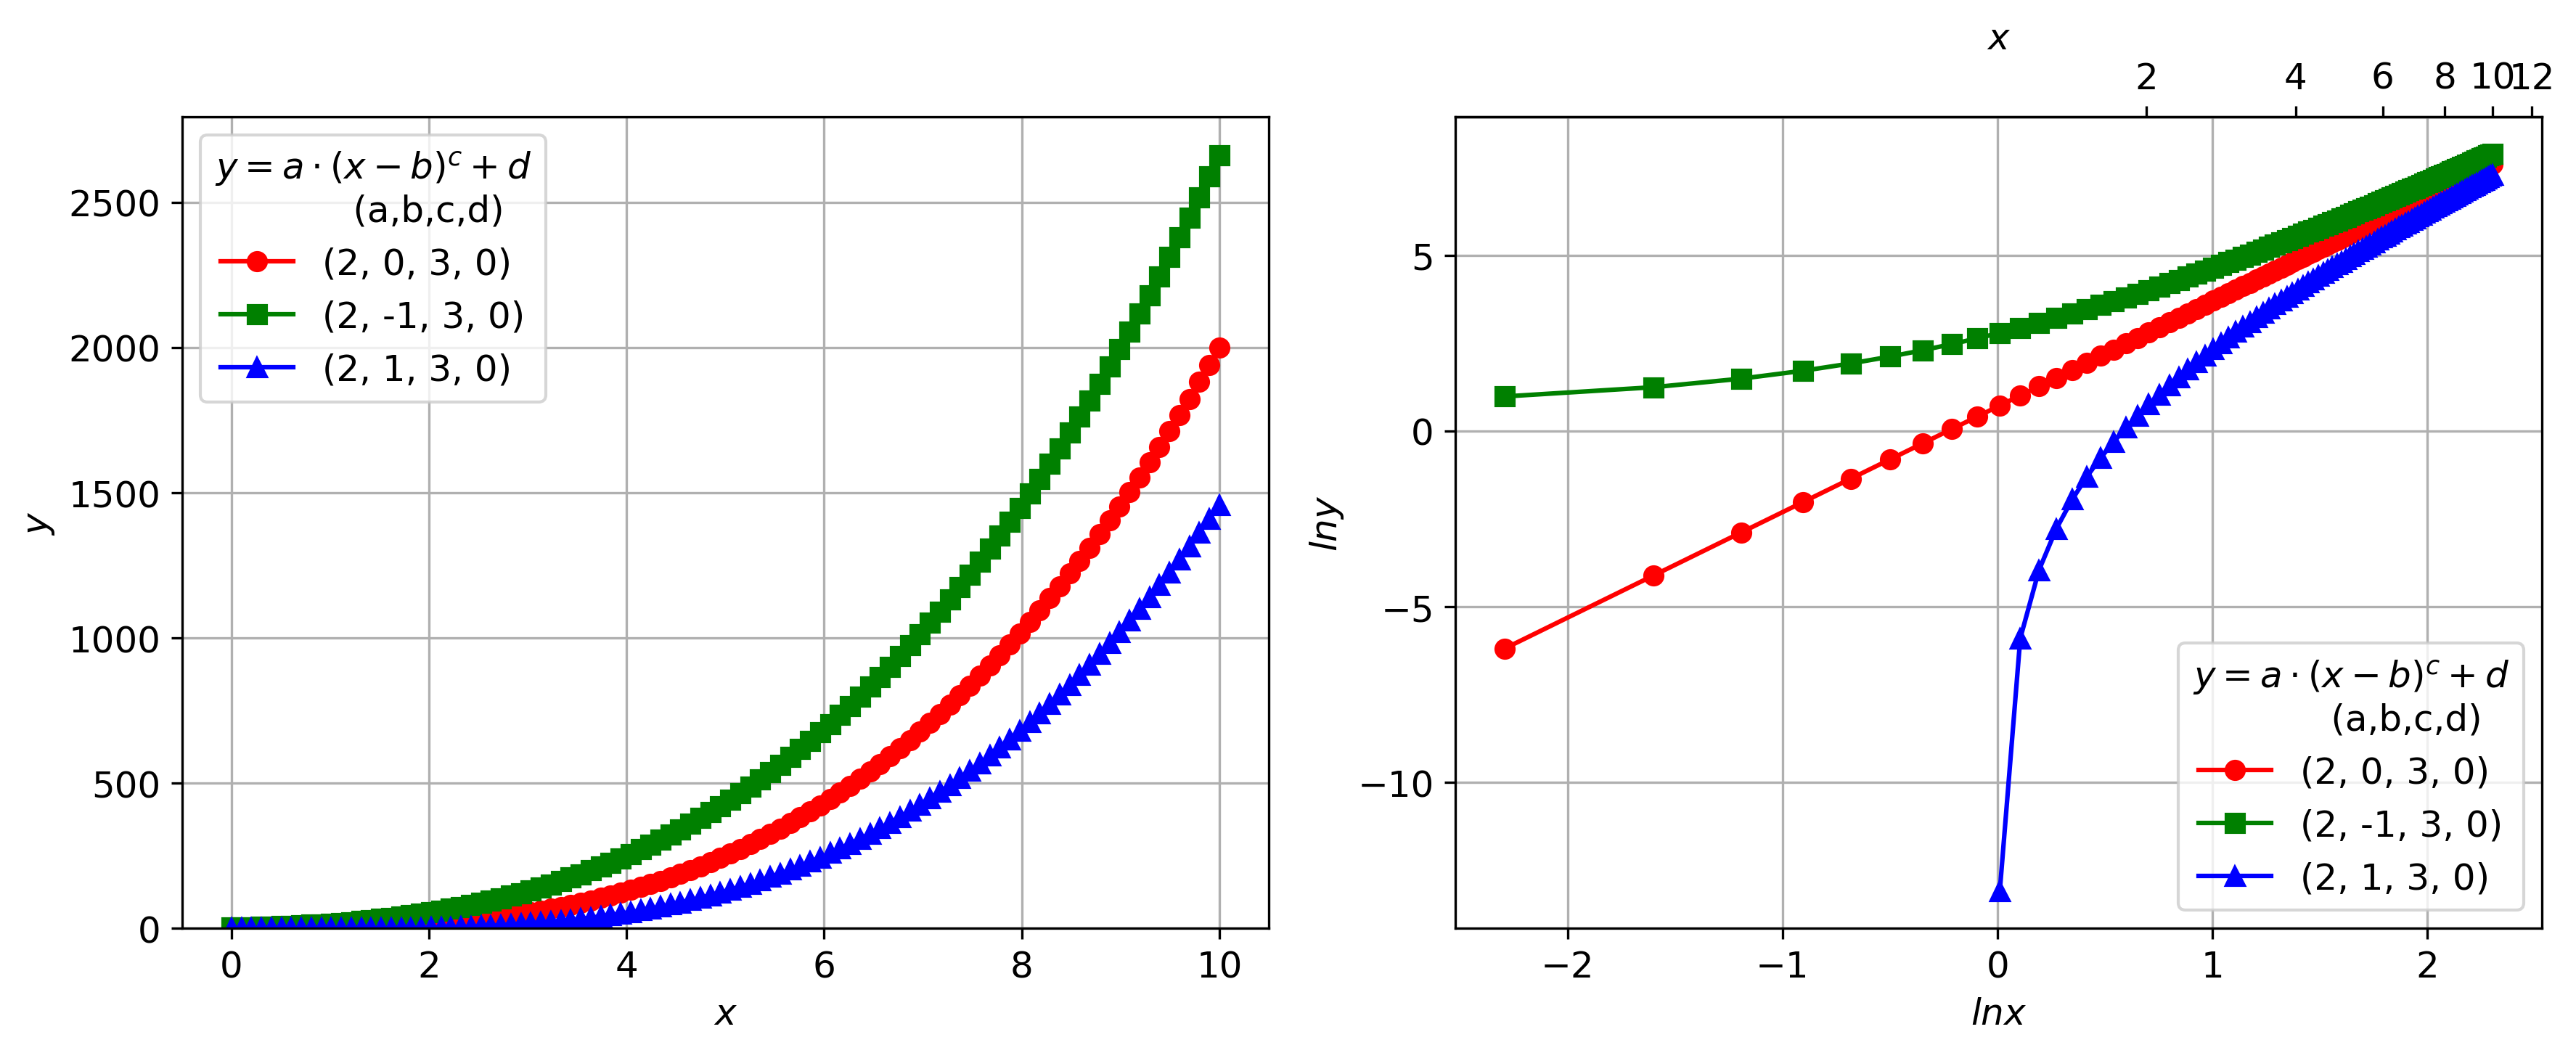

In [5]:
# Shift variation
xx2 = np.linspace(0,10,100)
para1b=(2,0,3,0)
para2b=(2,-1,3,0)
para3b=(2,1,3,0)
simf.pw_ln_plot(xx2,para1b,para2b,para3b,
                exlim=None,
                leg_title='$y=a \cdot (x-b)^c + d$',
                axi=None,figsize=(12,5))

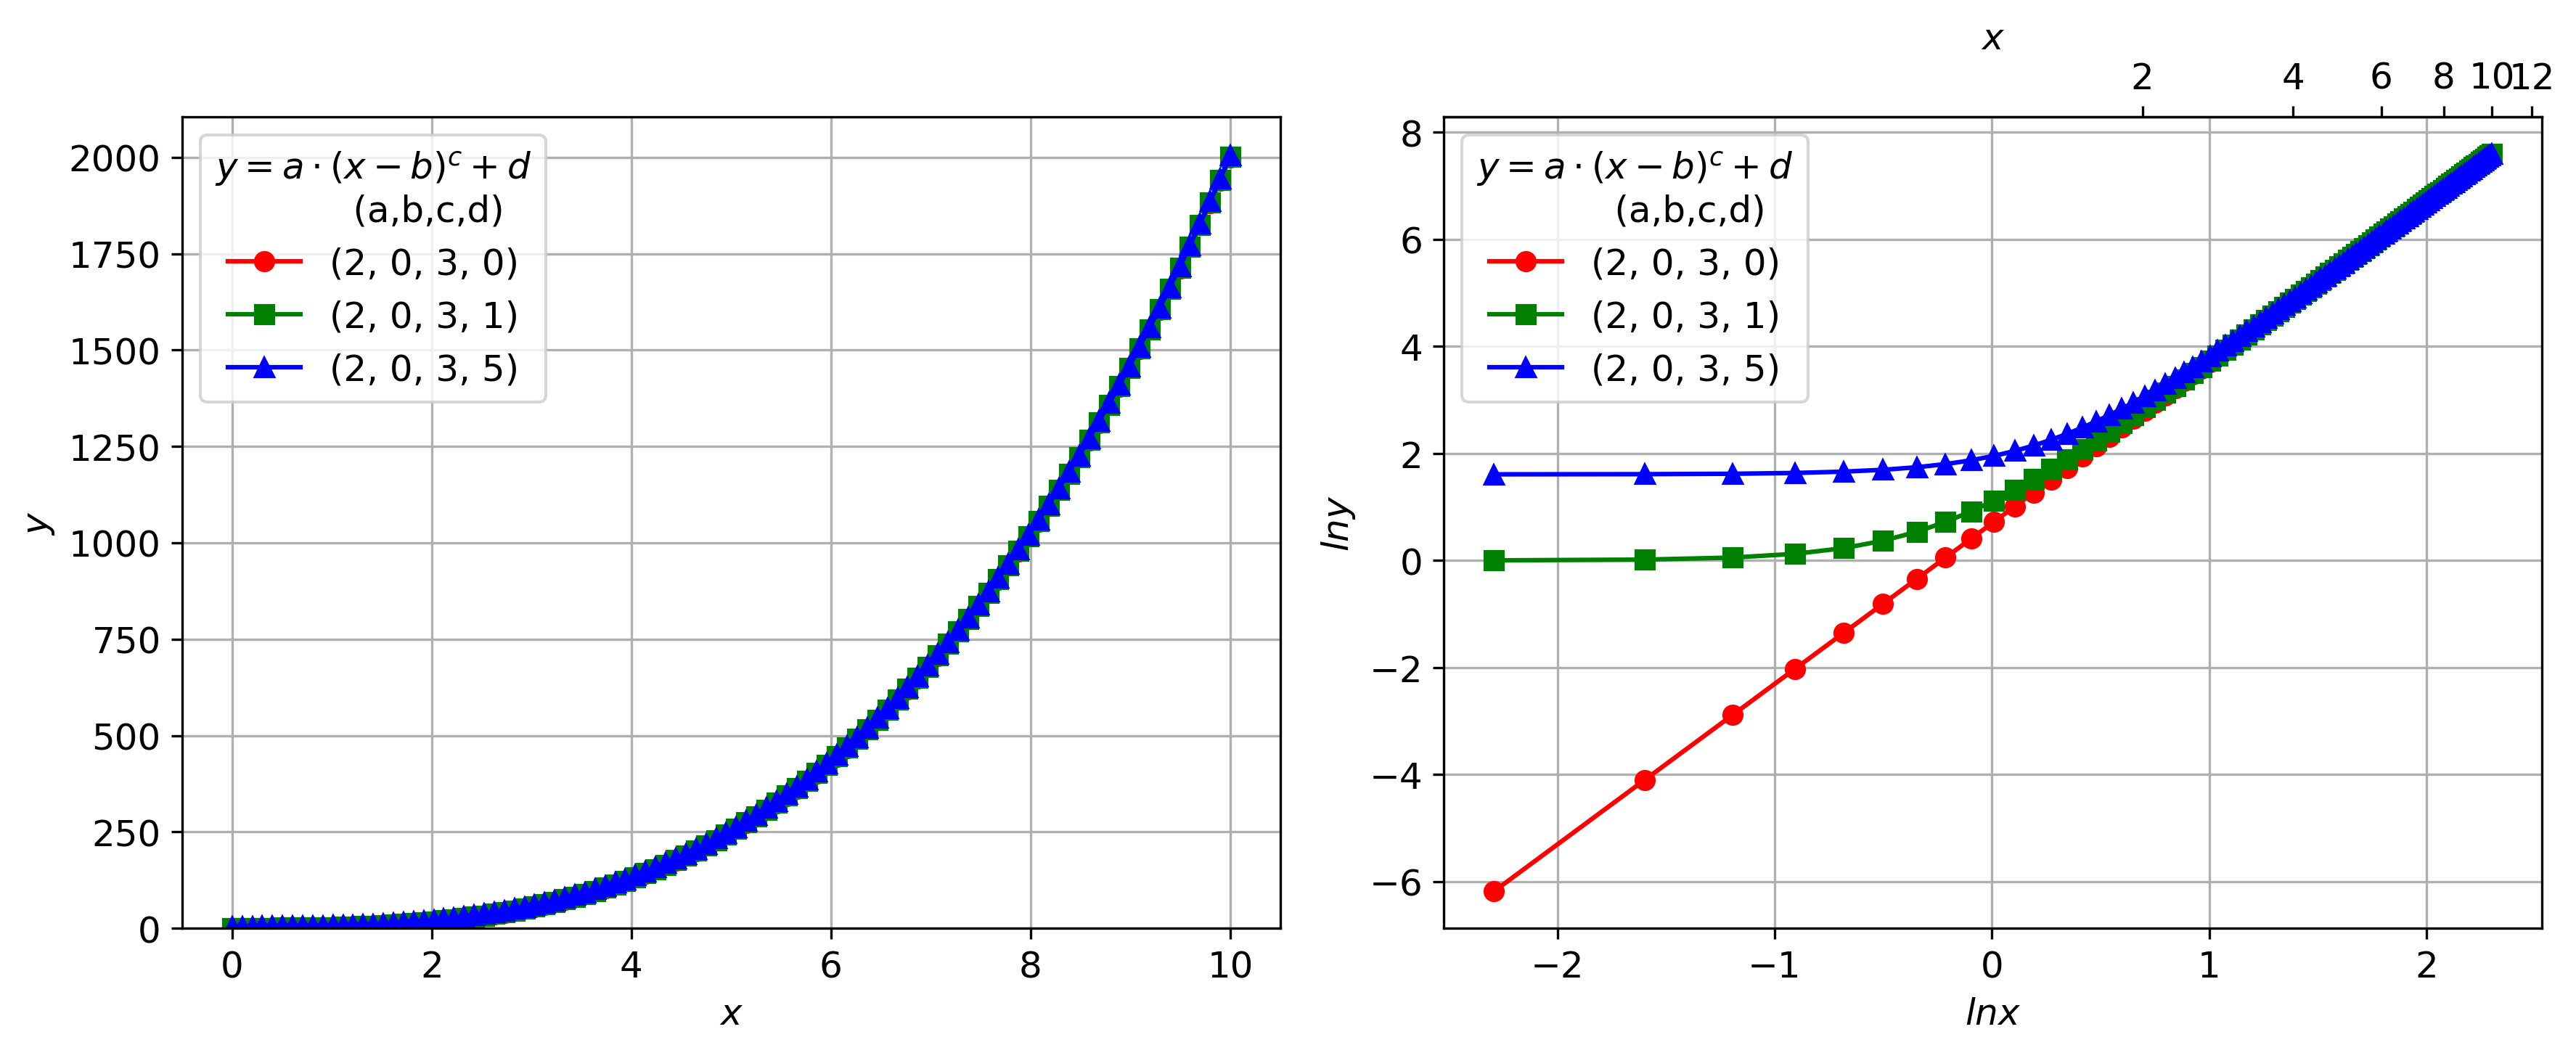

In [6]:
# background variation
para1bc=(2,0,3,0)
para2bc=(2,0,3,1)
para3bc=(2,0,3,5)
simf.pw_ln_plot(xx2,para1bc,para2bc,para3bc,
                exlim=None,
                leg_title='$y=a \cdot (x-b)^c + d$',
                axi=None,figsize=(12,5))

Shitf-Log-Log-Plot

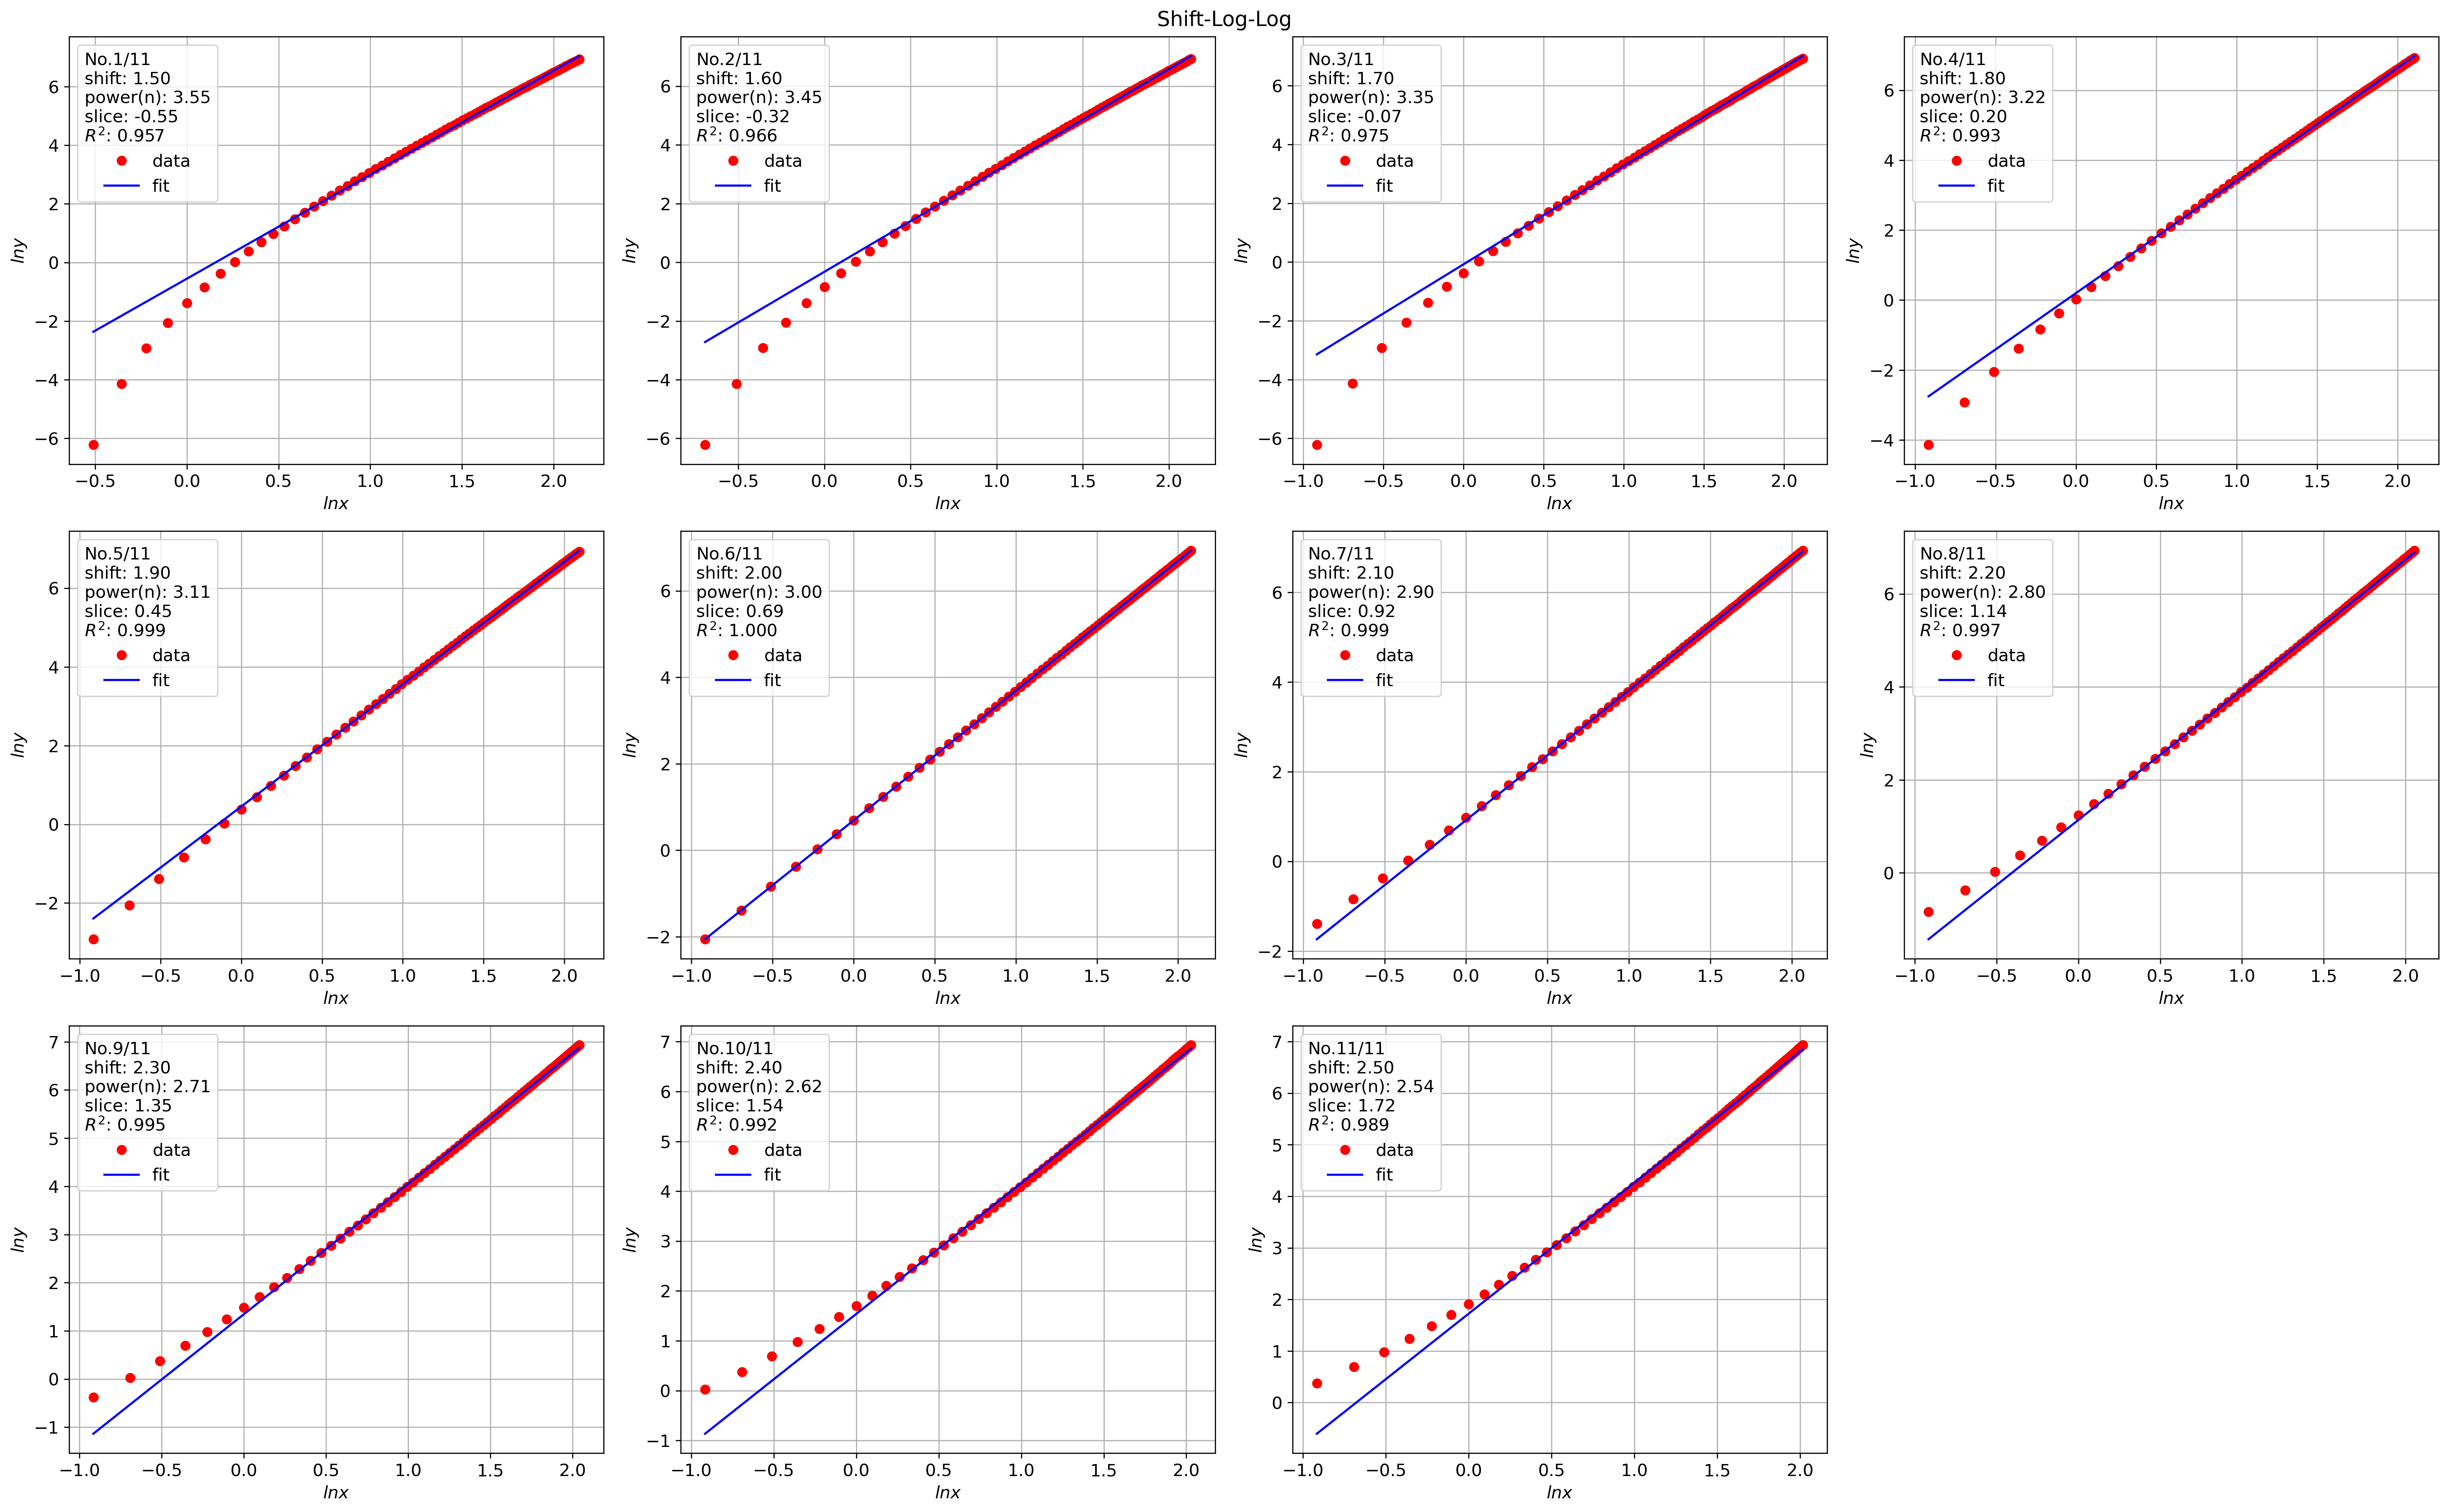

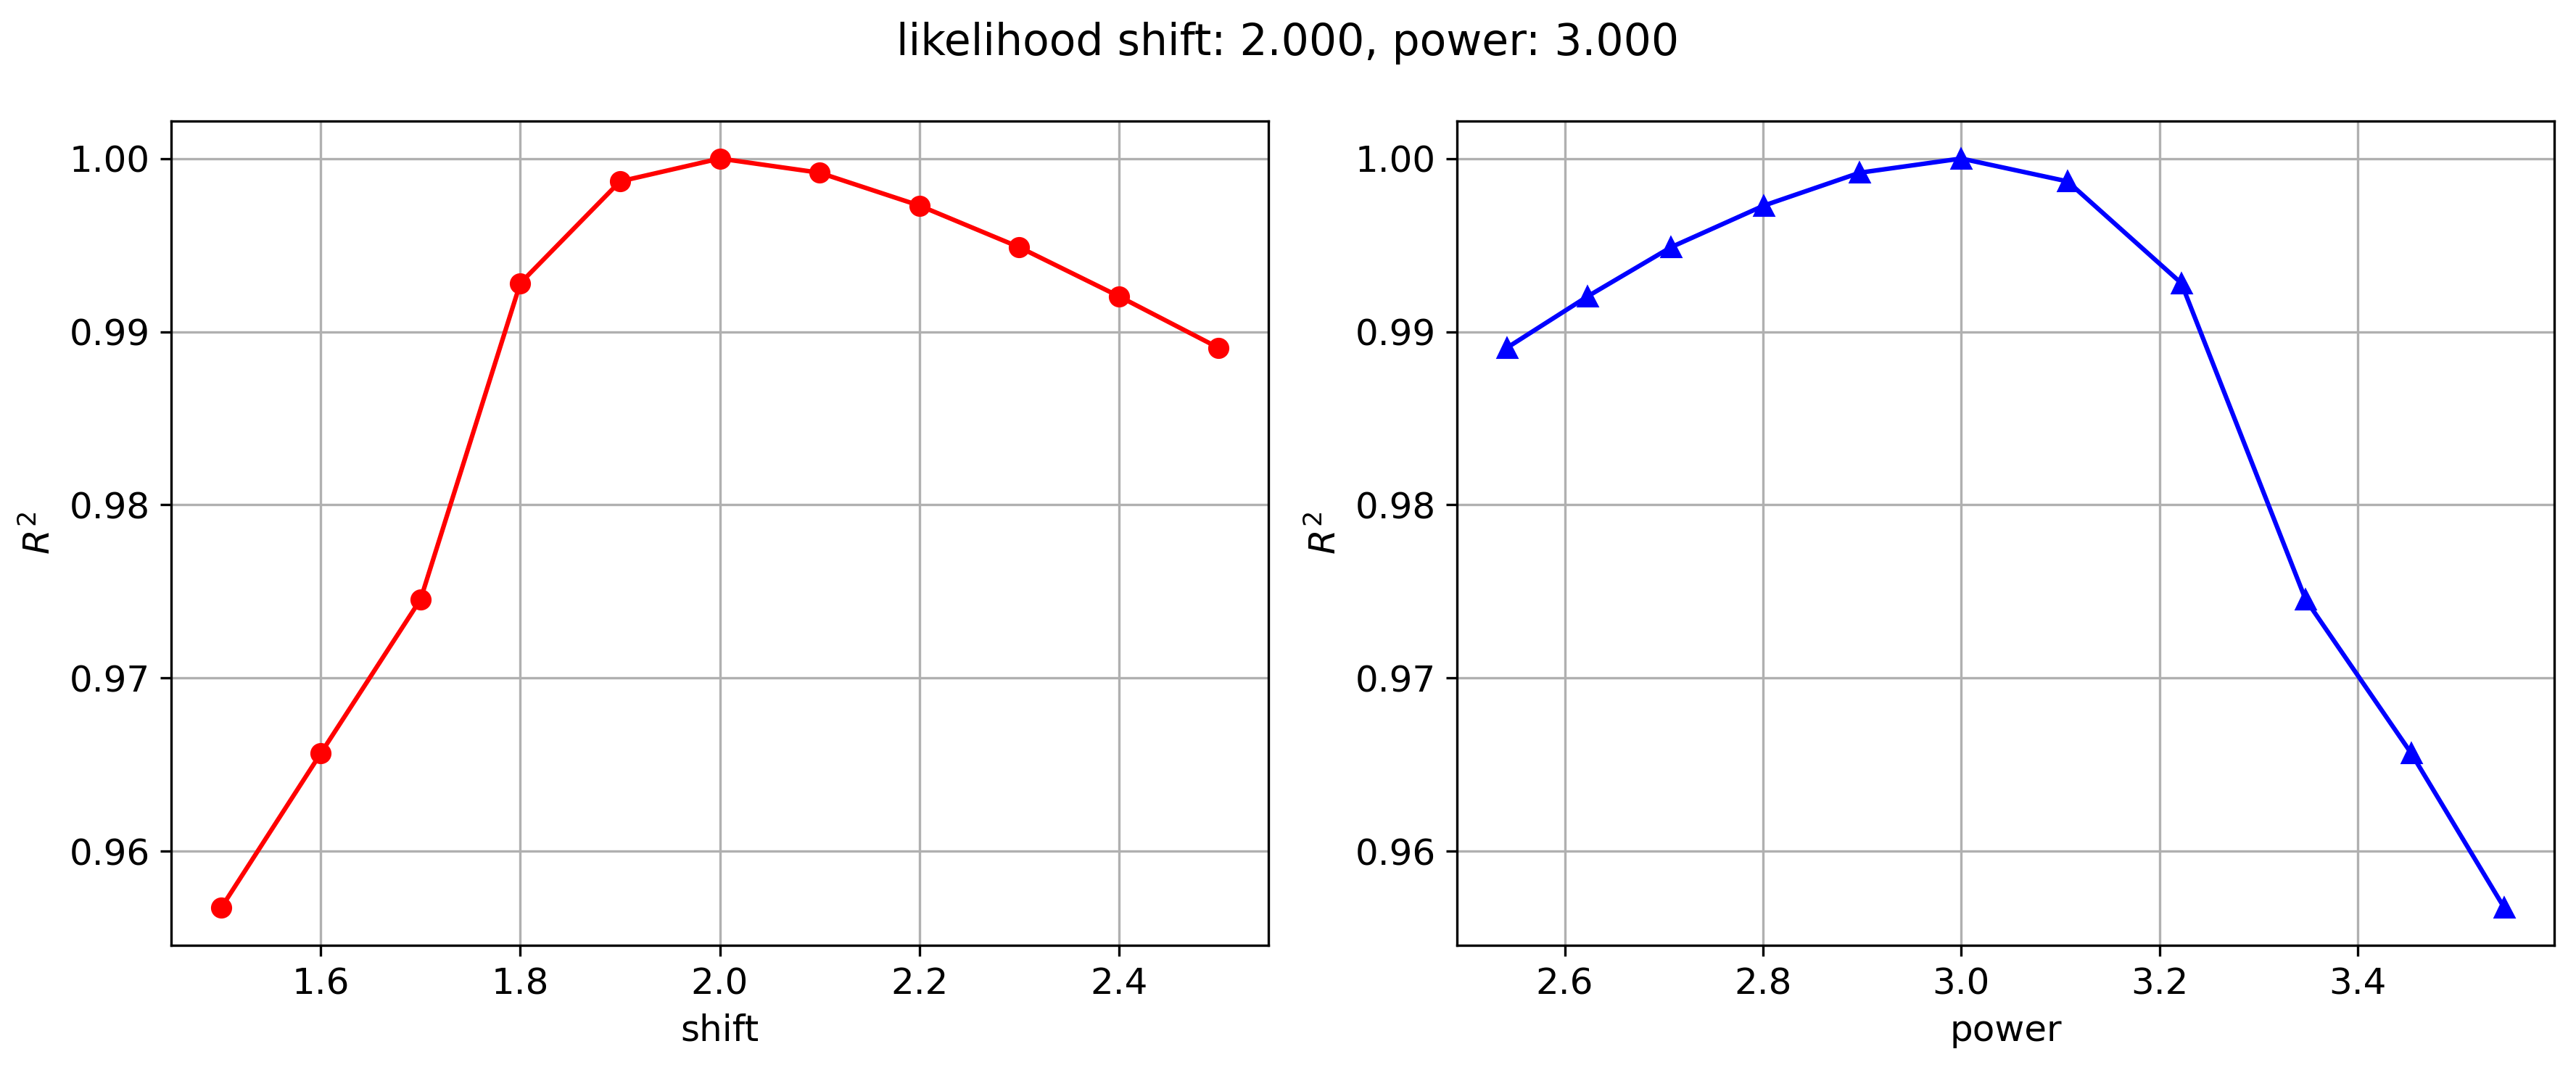

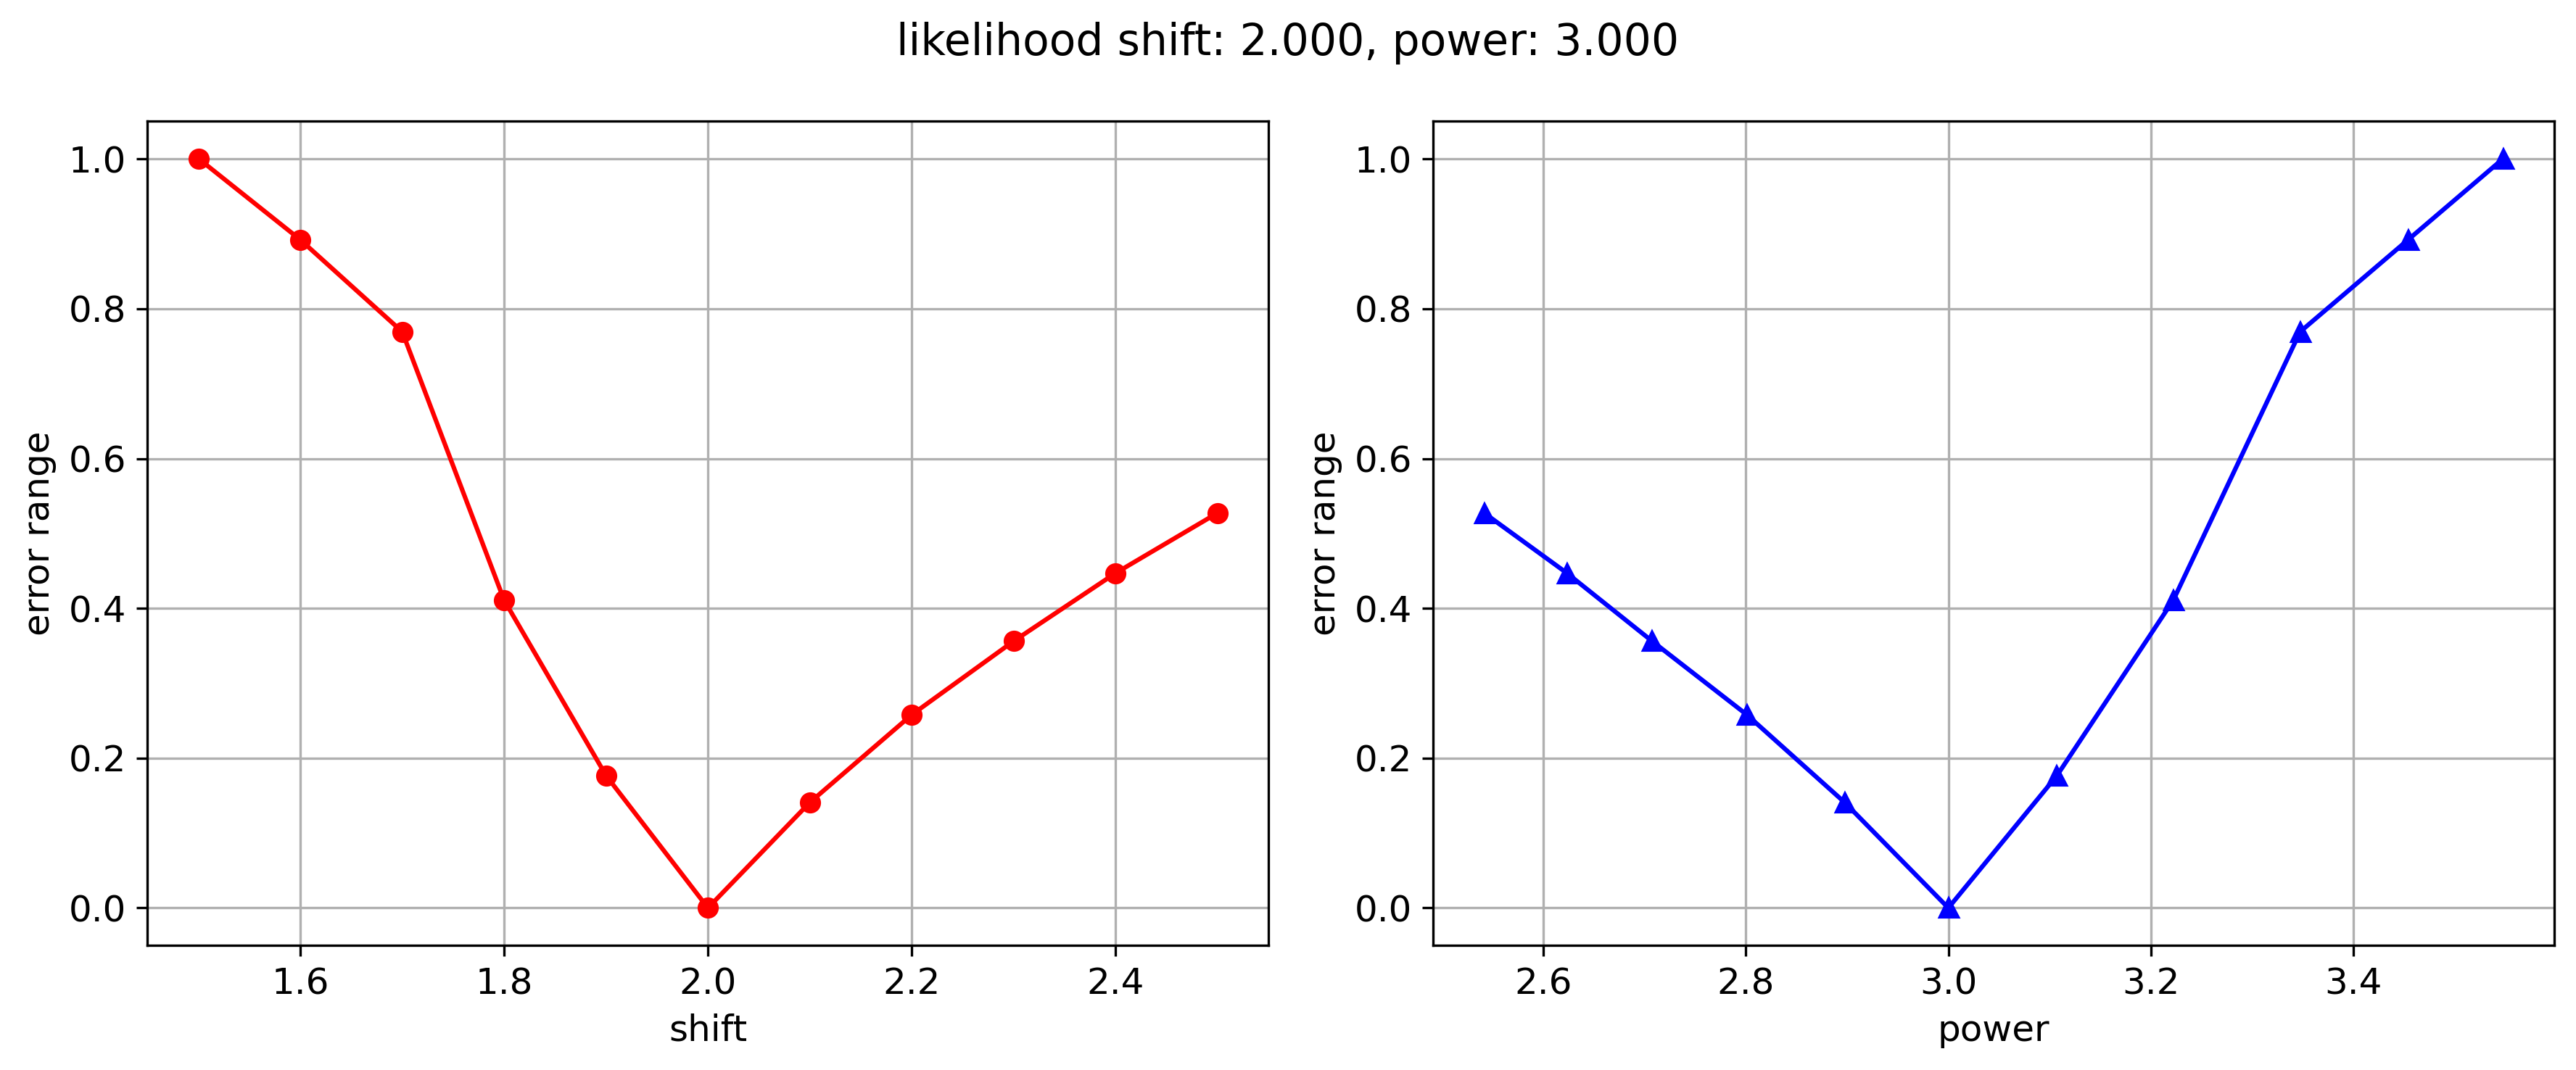

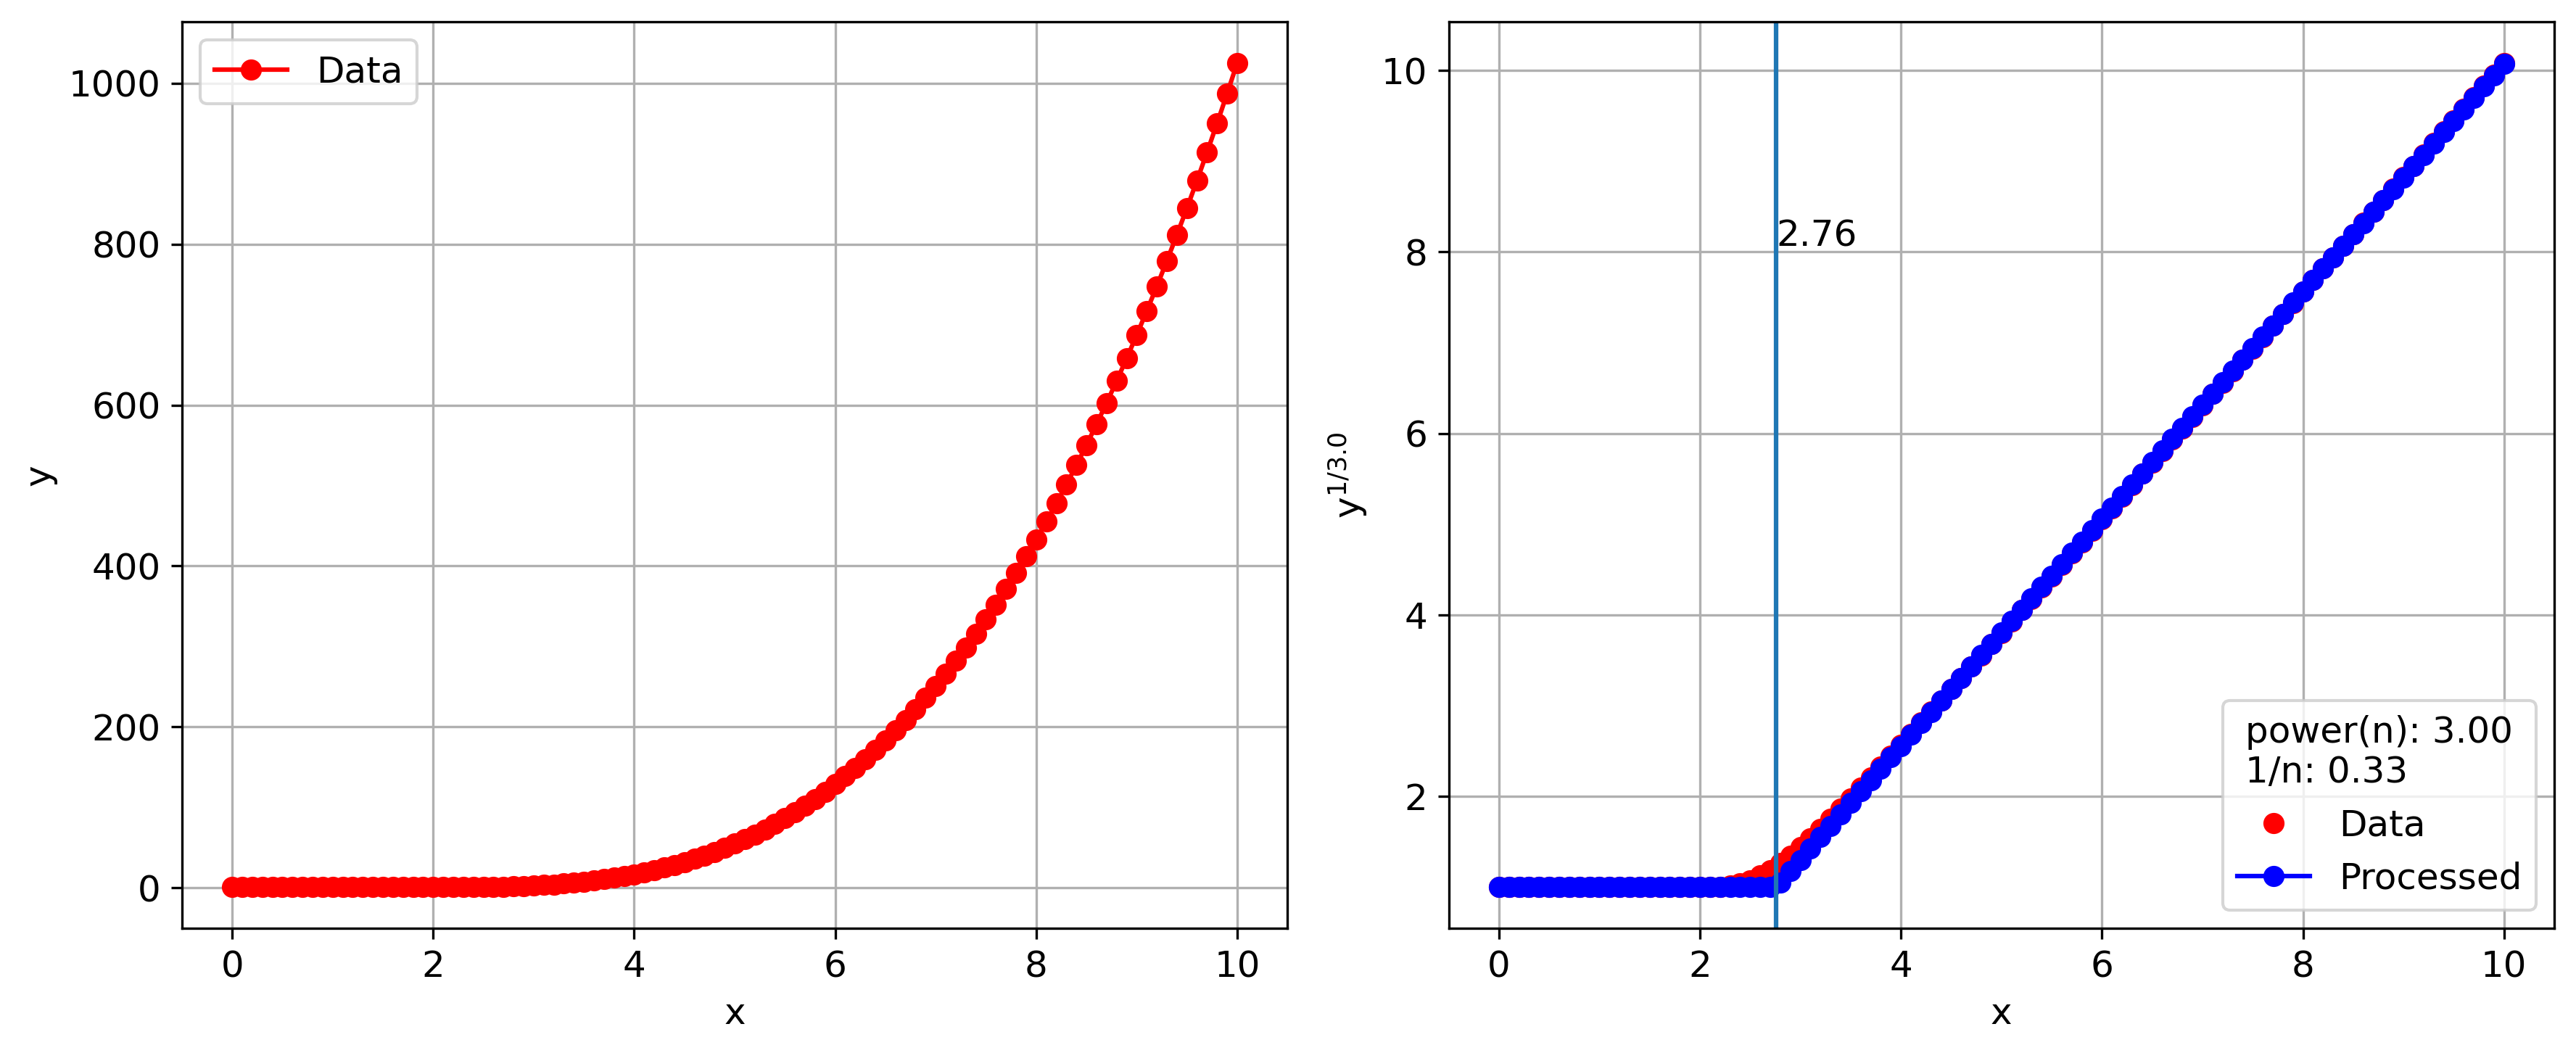

Margin: 0.3, shift: 2.00, power: 3.00
R2: 1.00, ER: 0.00


In [7]:
# ノイズなし
xx = np.arange(0,10.1,0.1)
p =  (2,2,3,1)
yy = simf.power_plus(xx,*p) 

# Shift 探索範囲
search_range = powfit.create_serach_range(2, 0.5, 0.1)

# for im in [0,0.1,0.3,0.5,1.0,1.5]: # margin (limt_val) 0.3-> ln(0.3)=-1.2
for im in [0.3,]:
    temp = powfit.PfAnalysis(xx,yy)
    # print('Constant Power')
    # temp.shift_estimate_by_power_scan(search_range=None,
    #                                 info=False, 
    #                                 plot=True)
    # print('Constant Shift')
    temp.power_estimate_by_shift_scan(search_range=search_range, 
                                        fit_type='mae', 
                                        # fit_type='weight',
                                        bg_num=6,
                                        lim_val=im,
                                        min_error='mae',
                                        info=False,
                                        plot=True)
        
    print(f'Margin: {im}, shift: {temp.pwebysh["shift"]:.2f}, power: {temp.pwebysh["power"]:.2f}')
    print(f'R2: {temp.pwebysh["r2"]:.2f}, ER: {temp.pwebysh["er"]:.2f}')

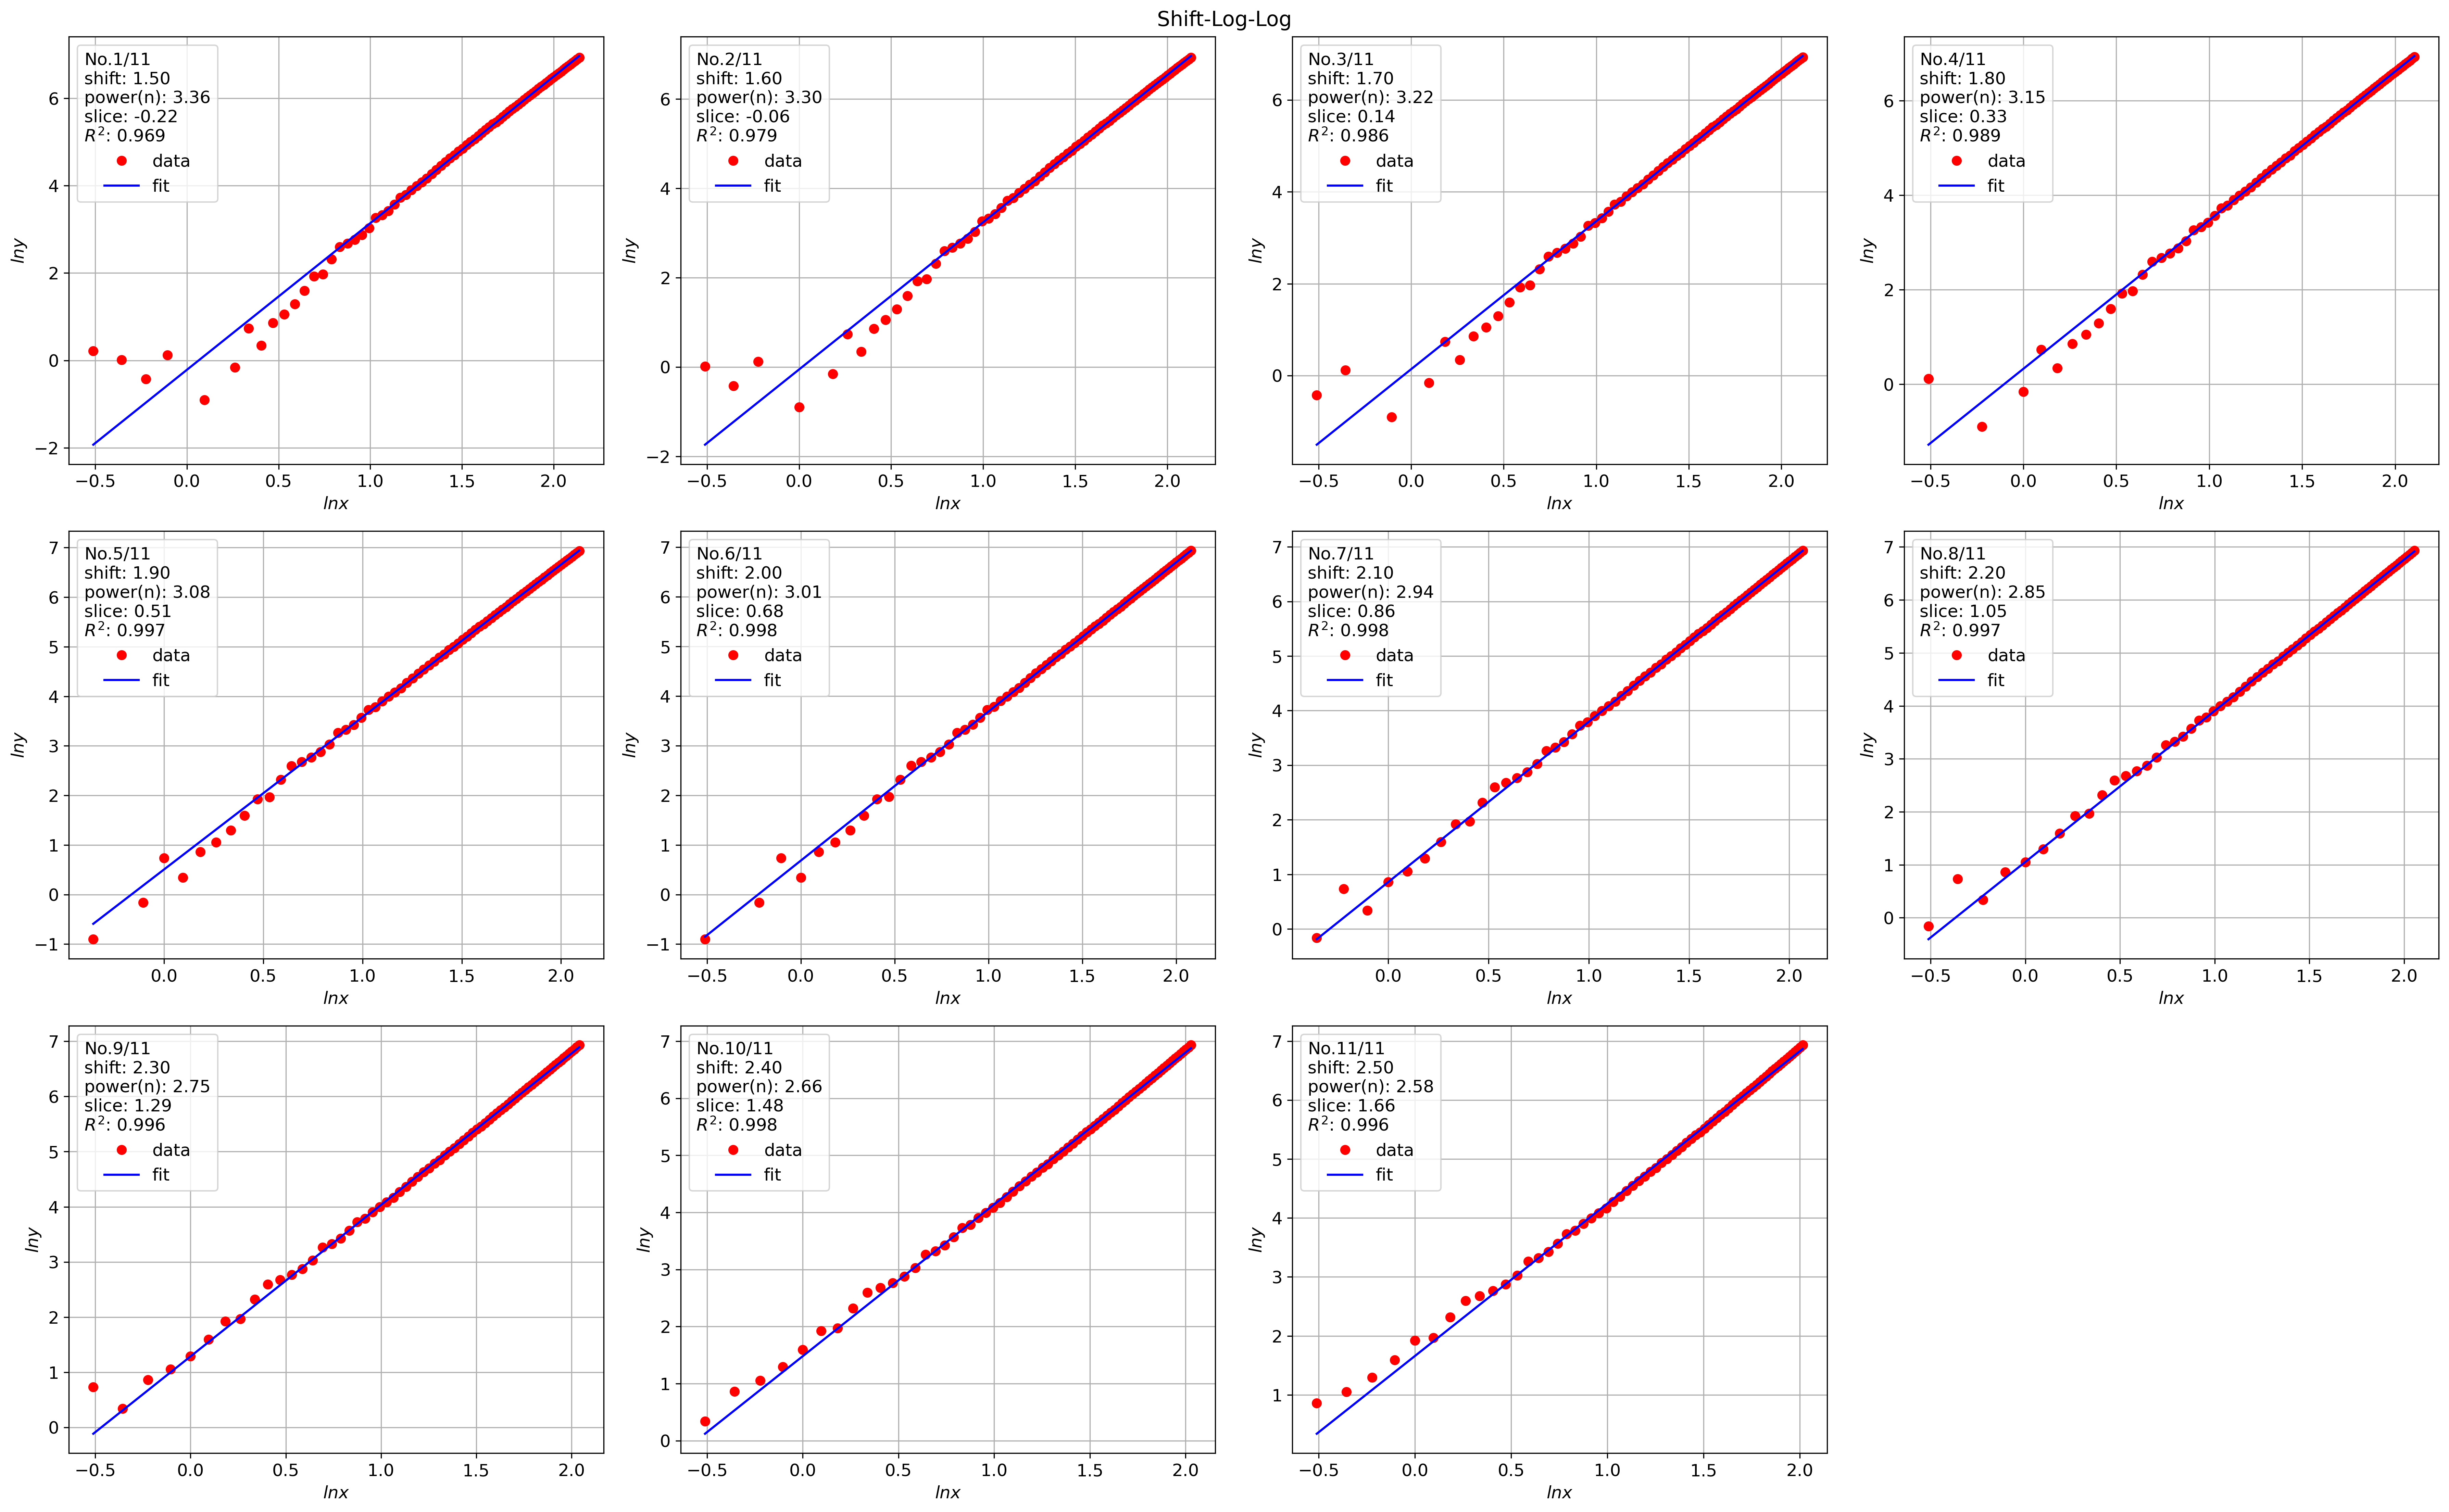

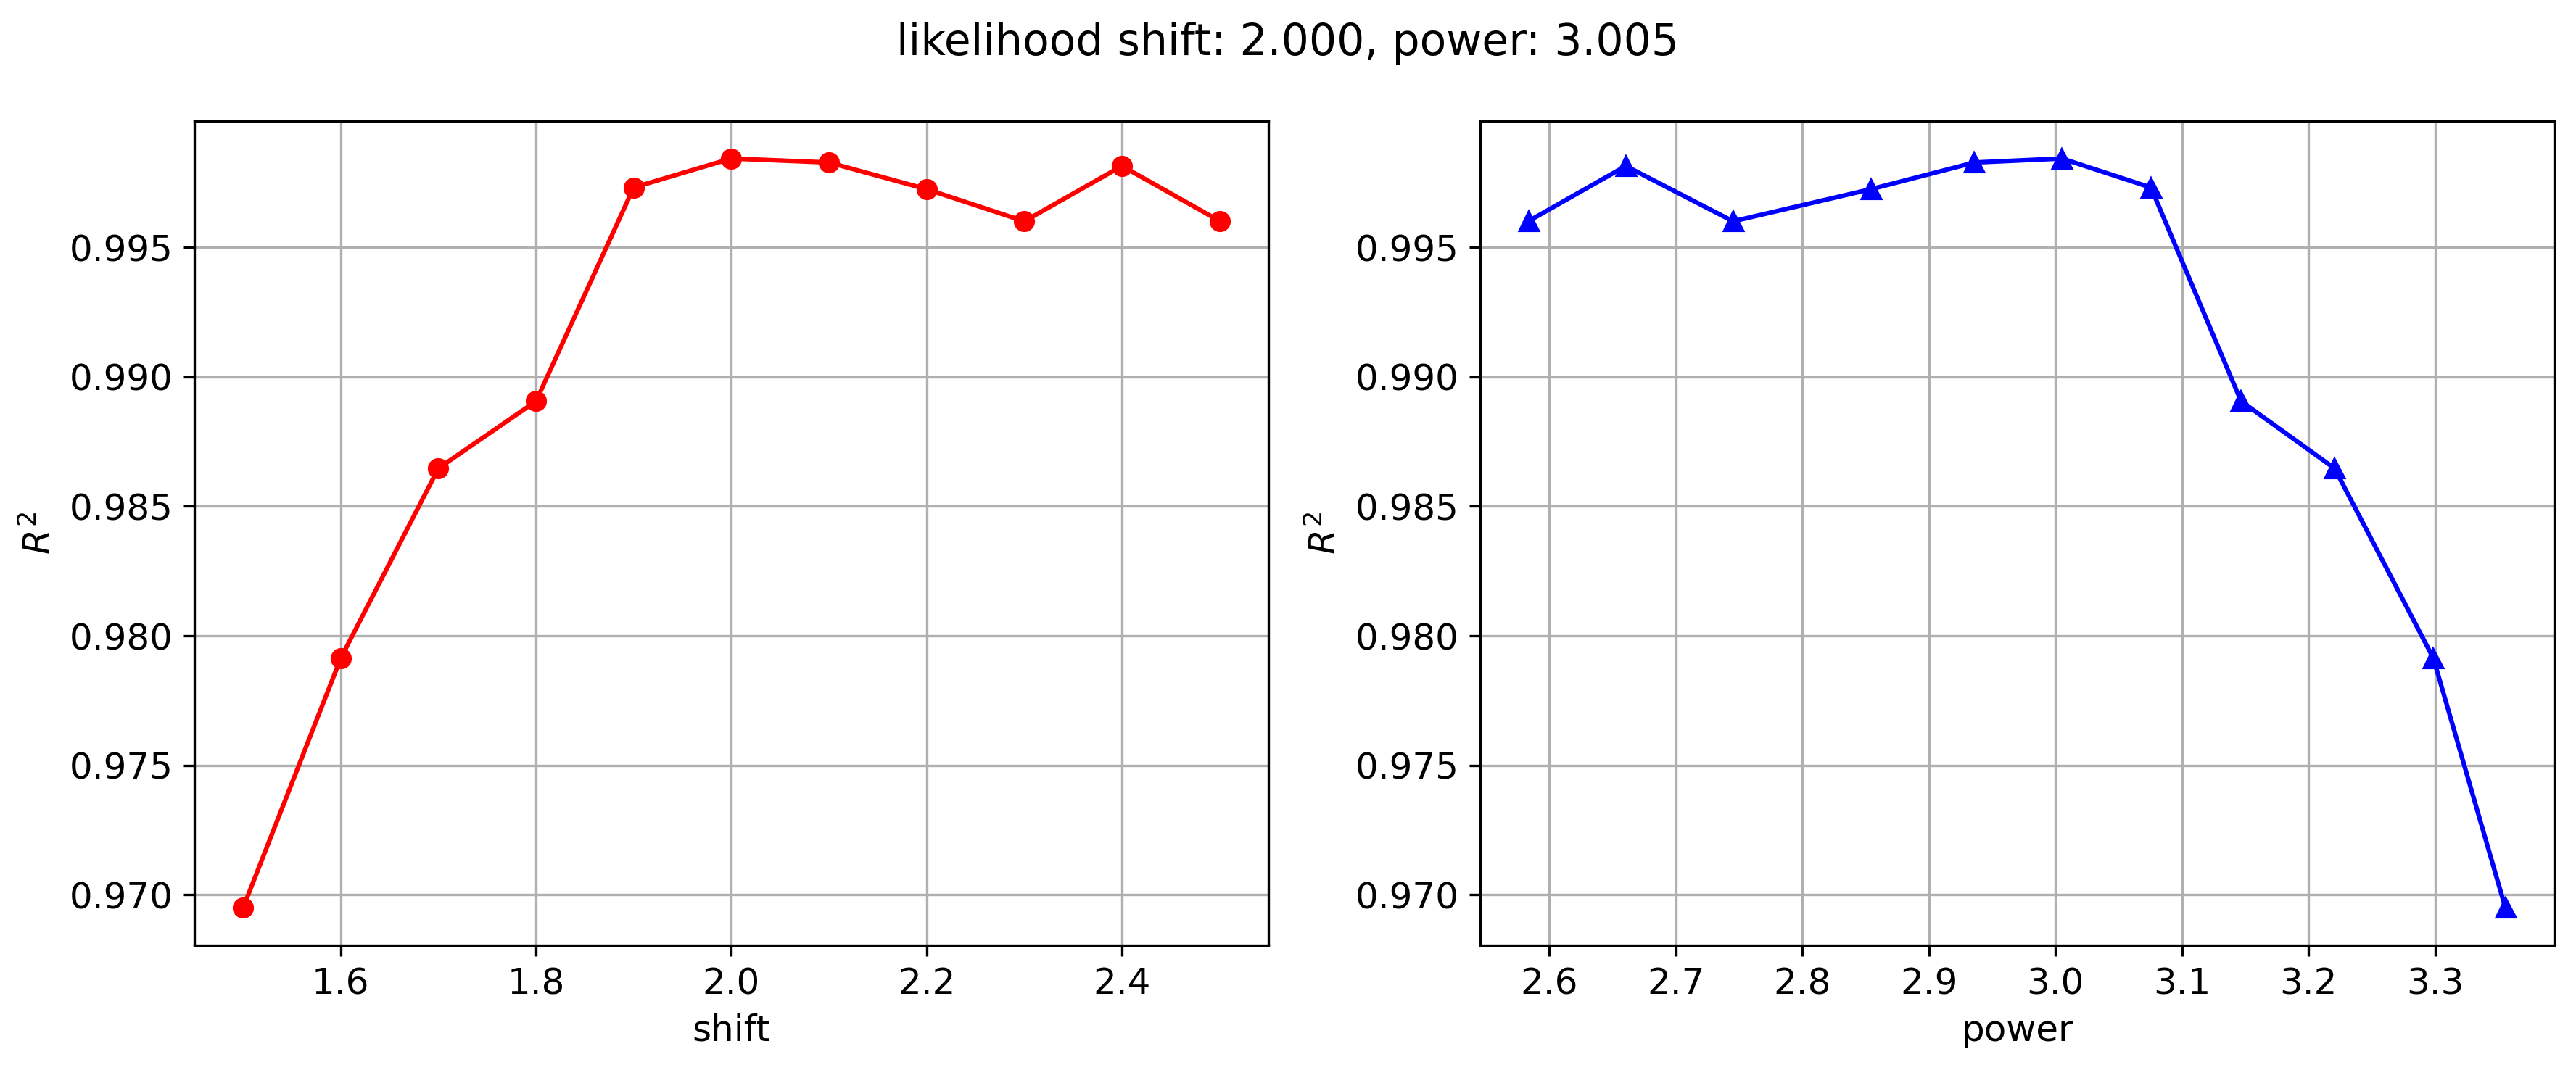

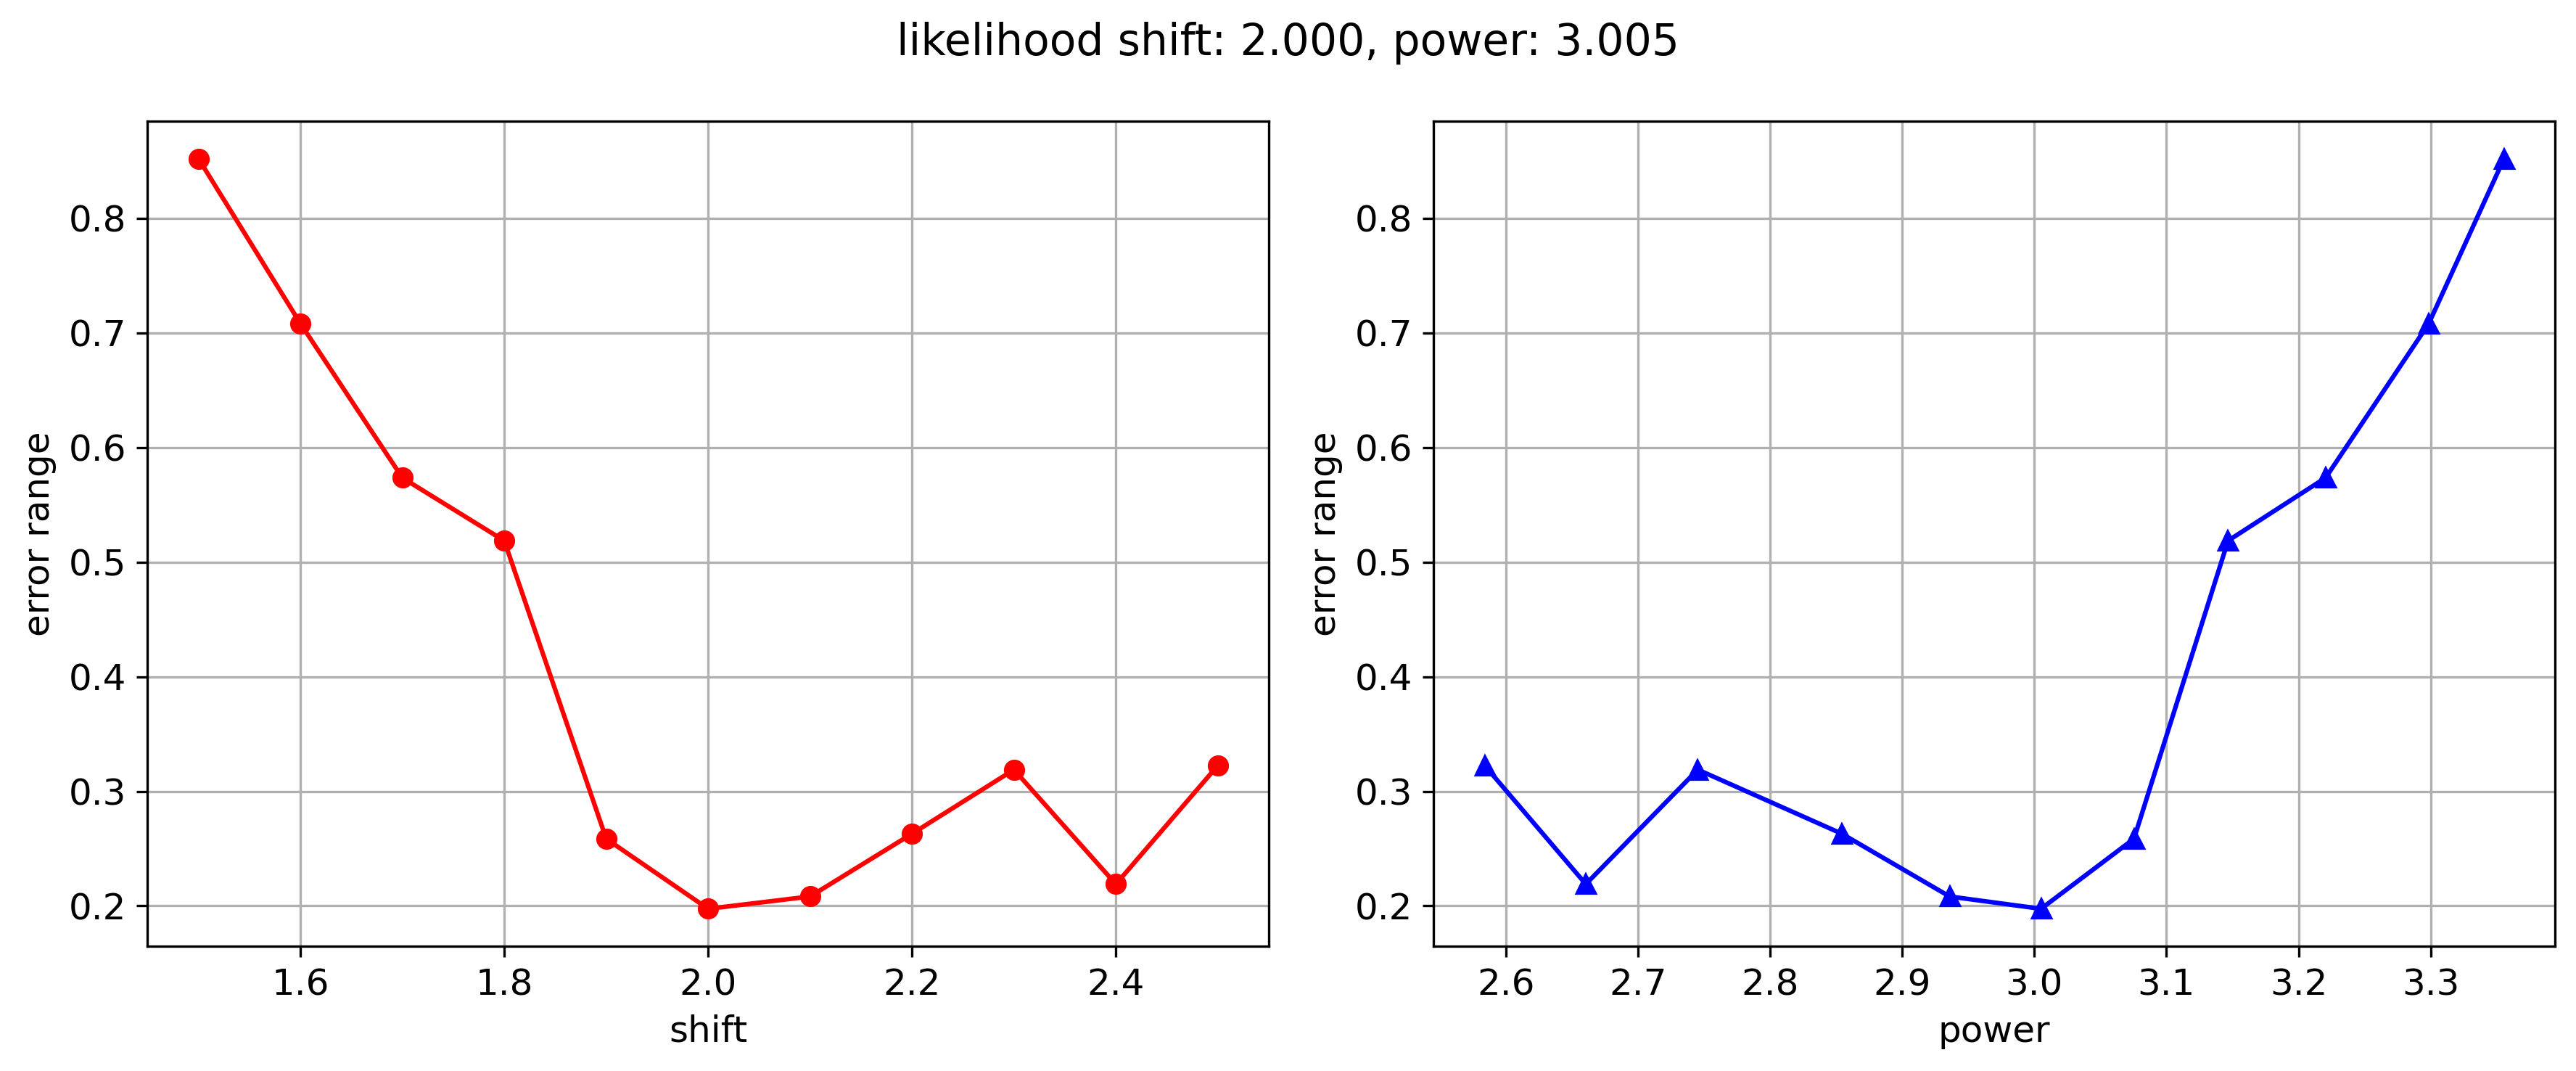

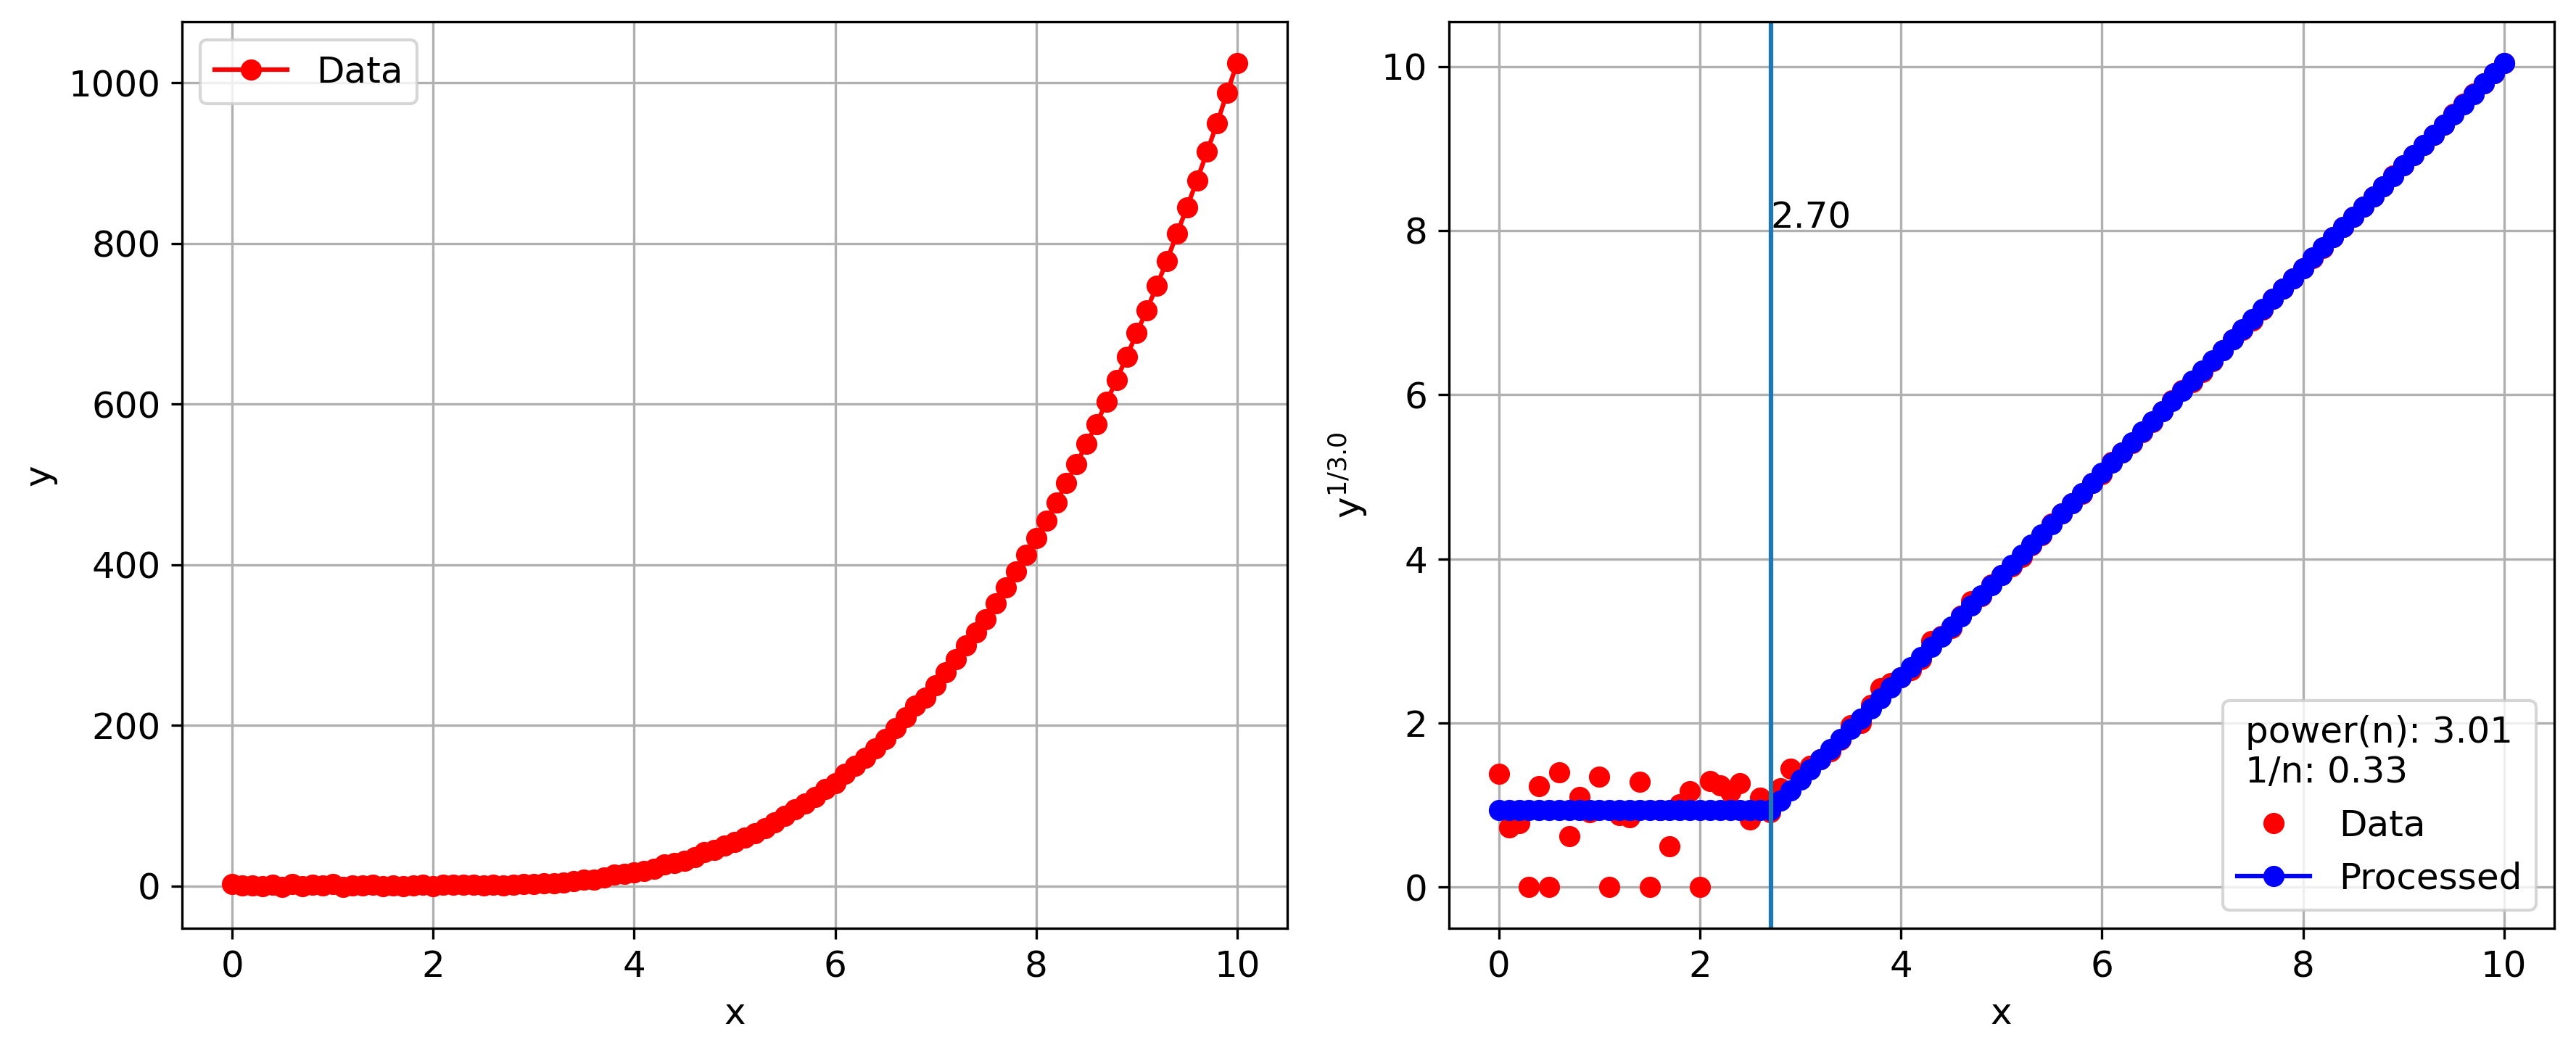

Margin: 0.5, shift: 2.00, power: 3.01
R2: 1.00, ER: 0.20


In [8]:
# ノイズあり
xx = np.arange(0,10.1,0.1)
np.random.seed(seed=1)
p =  (2,2,3,1)
yy = simf.power_plus(xx,*p) + np.random.normal(loc=0.0, scale=1, size=len(xx))

search_range = powfit.create_serach_range(2, 0.5, 0.1)

# for im in [0,0.1,0.3,0.5,1.0,1.5]: # margin (limt_val) 0.3-> ln(0.3)=-1.2,  ln(0.5) = -0.69

for im in [0.5,]:
    temp = powfit.PfAnalysis(xx,yy)
    # print('Constant Power')
    # temp.shift_estimate_by_power_scan(search_range=None,
    #                                 info=False, 
    #                                 plot=True)
    # print('Constant Shift')
    temp.power_estimate_by_shift_scan(search_range=search_range, 
                                        fit_type='mae', 
                                        # fit_type='weight',
                                        bg_num=10,
                                        lim_val=im,
                                        min_error='mae',
                                        info=False,
                                        plot=True)
        
    print(f'Margin: {im}, shift: {temp.pwebysh["shift"]:.2f}, power: {temp.pwebysh["power"]:.2f}')
    print(f'R2: {temp.pwebysh["r2"]:.2f}, ER: {temp.pwebysh["er"]:.2f}')